In [1]:
import io
import os
import posixpath
from contextlib import redirect_stdout

import pandas as pd
from pprint import pprint
from postreise.plot.multi.plot_bar import plot_bar, plot_hbar
from postreise.plot.multi.plot_helpers import make_gen_cap_custom_data
from postreise.plot.multi.plot_pie import plot_pie
from postreise.plot.multi.plot_shortfall import plot_shortfall

# Summary

For now, there is `plot_bar`, `plot_hbar`, `plot_pie`, and `plot_shortfall`

All of them can be run with `plot_foo(interconnect, time, list(scenario_ids))`

You can also optionally add scenario names and include your own custom data

e.g. `plot_func(interconnect, time, list(scenario_ids), list(scenario_names)`

In [2]:
# Let's set a time
time = ('2016-01-01-00', '2016-12-31-23', 'utc', 'H')

# Bar Plot

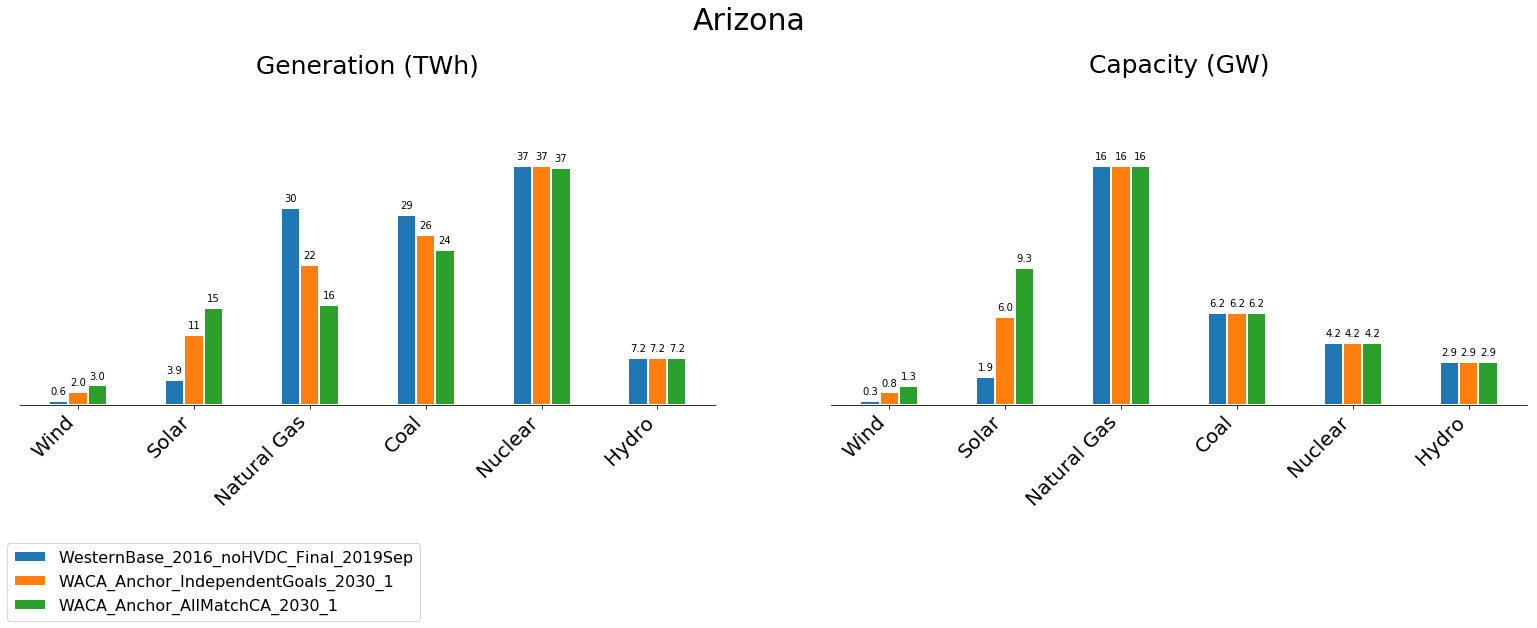

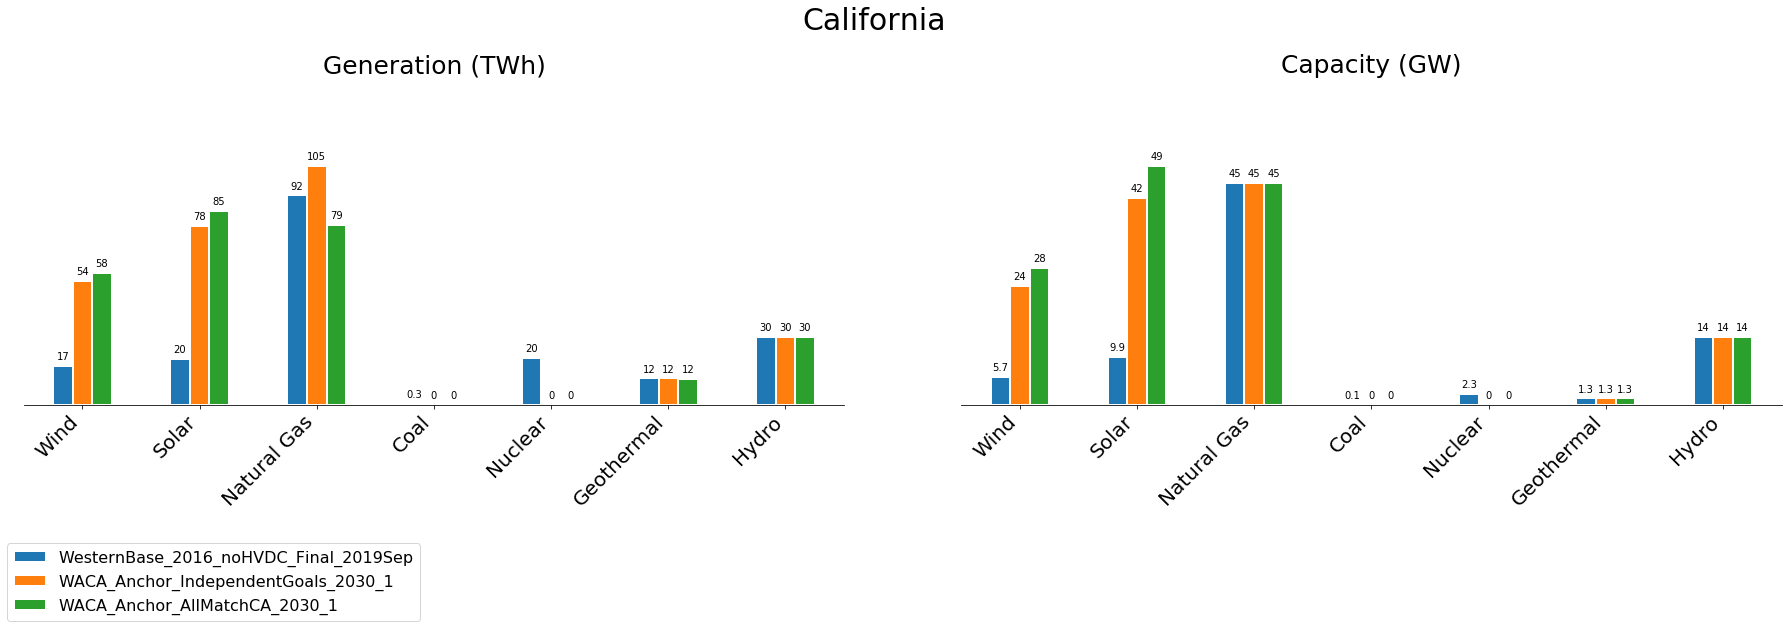

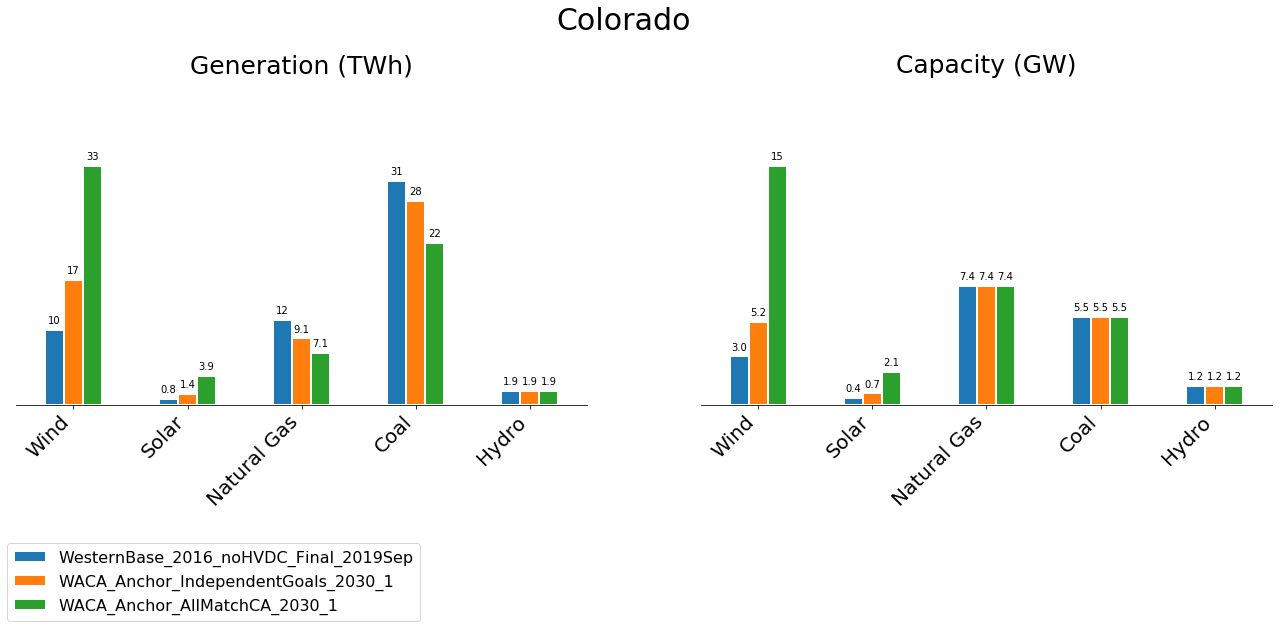

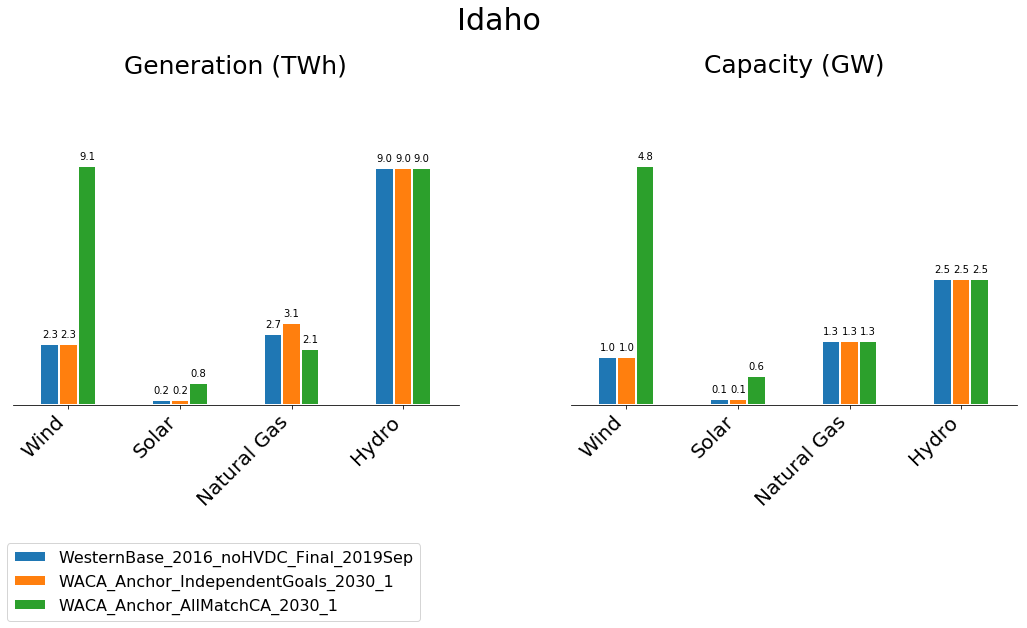

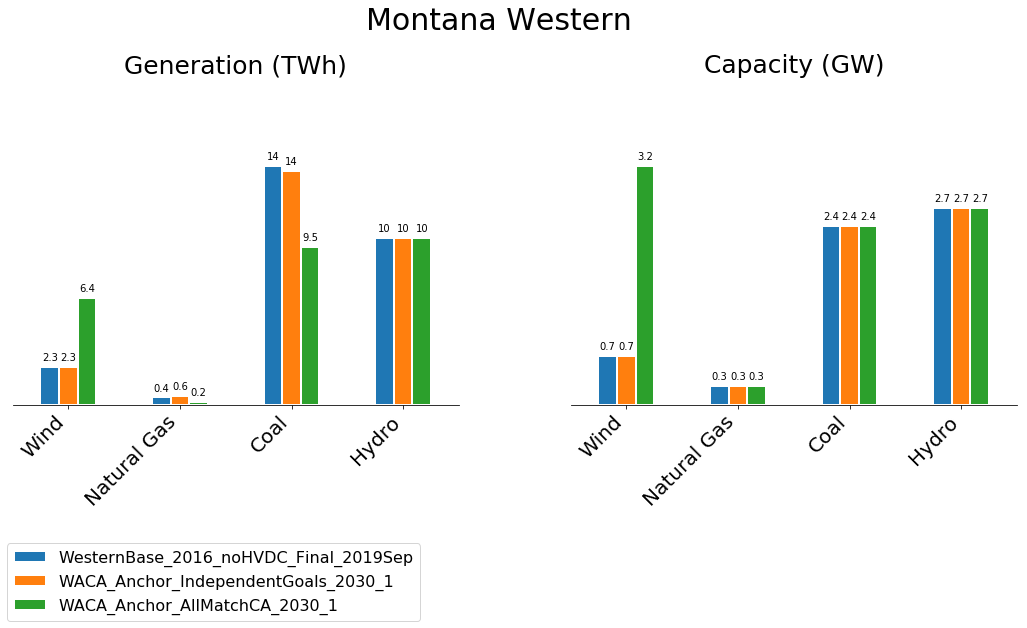

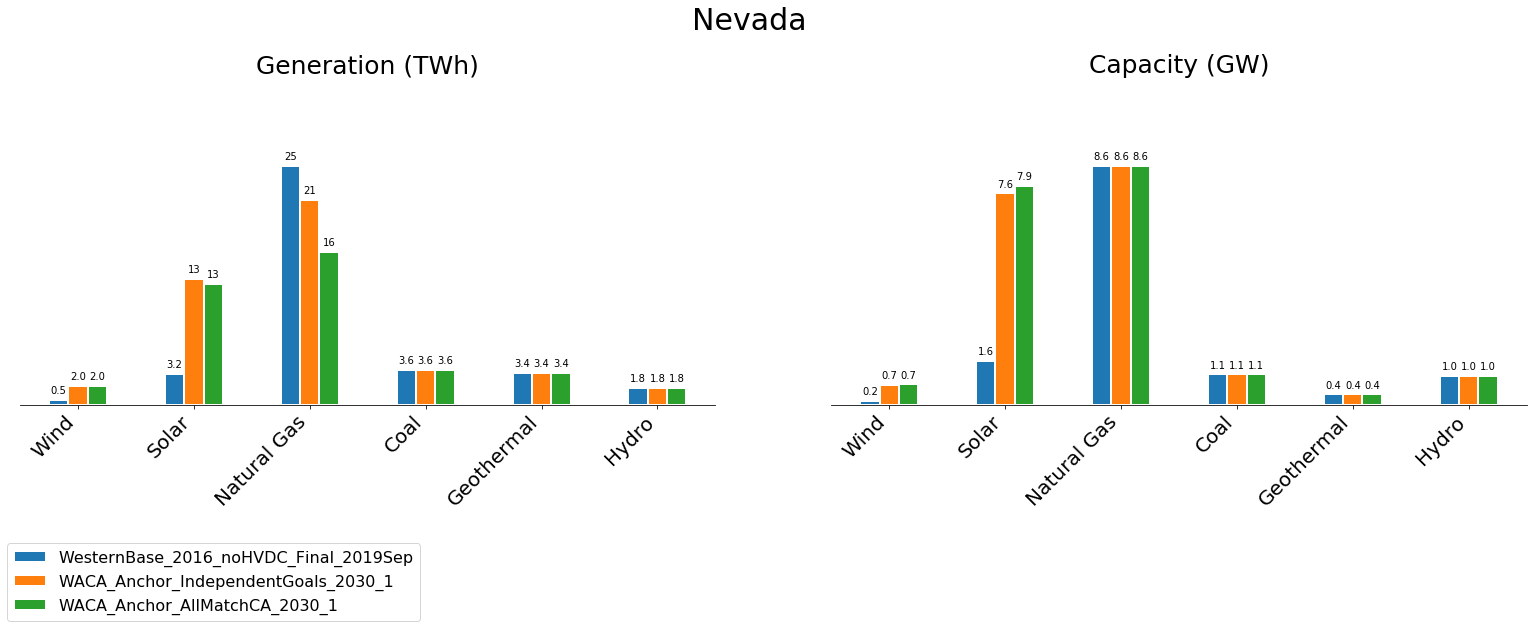

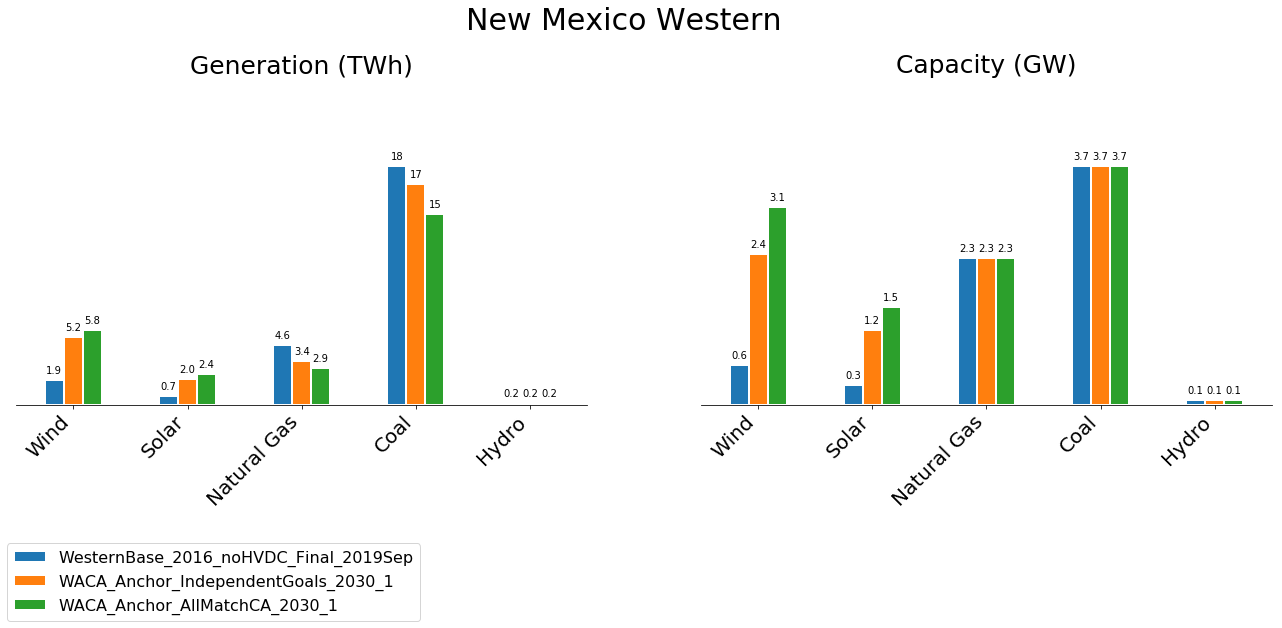

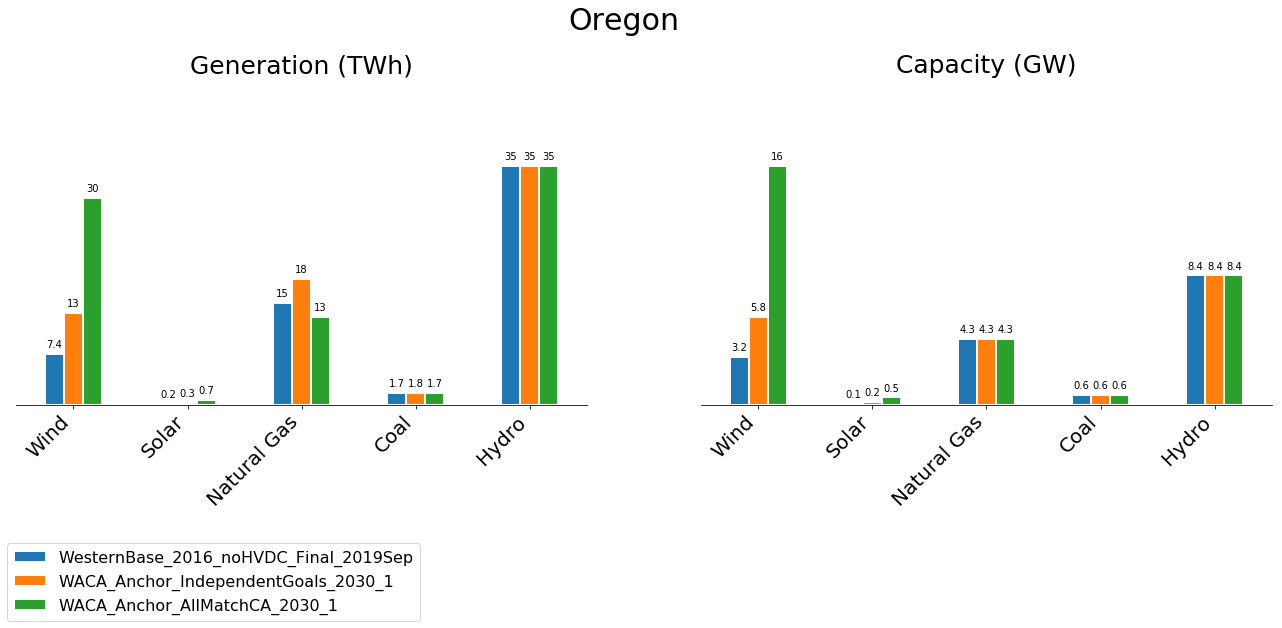

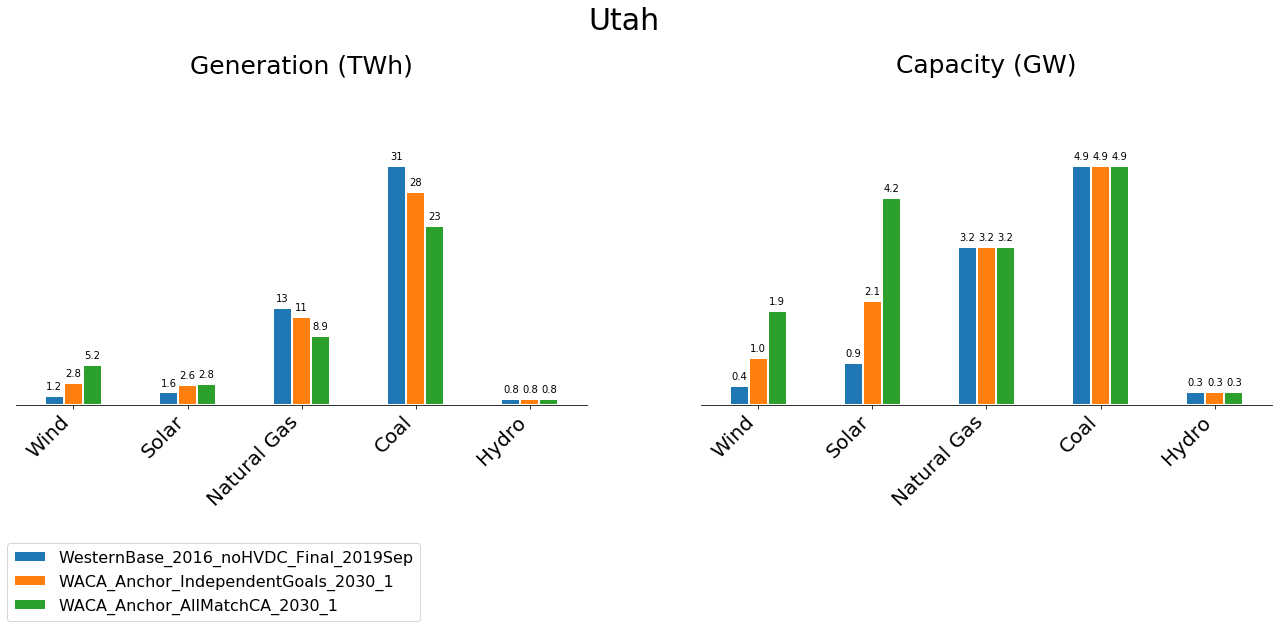

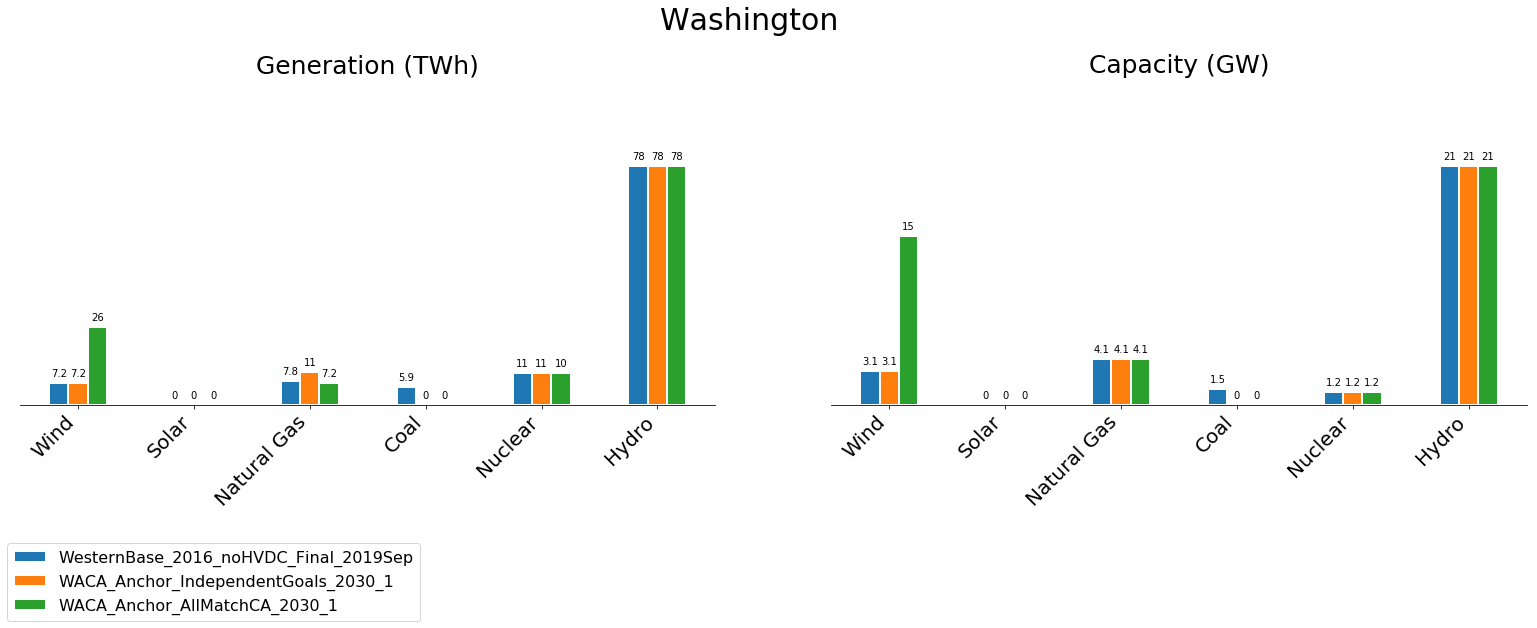

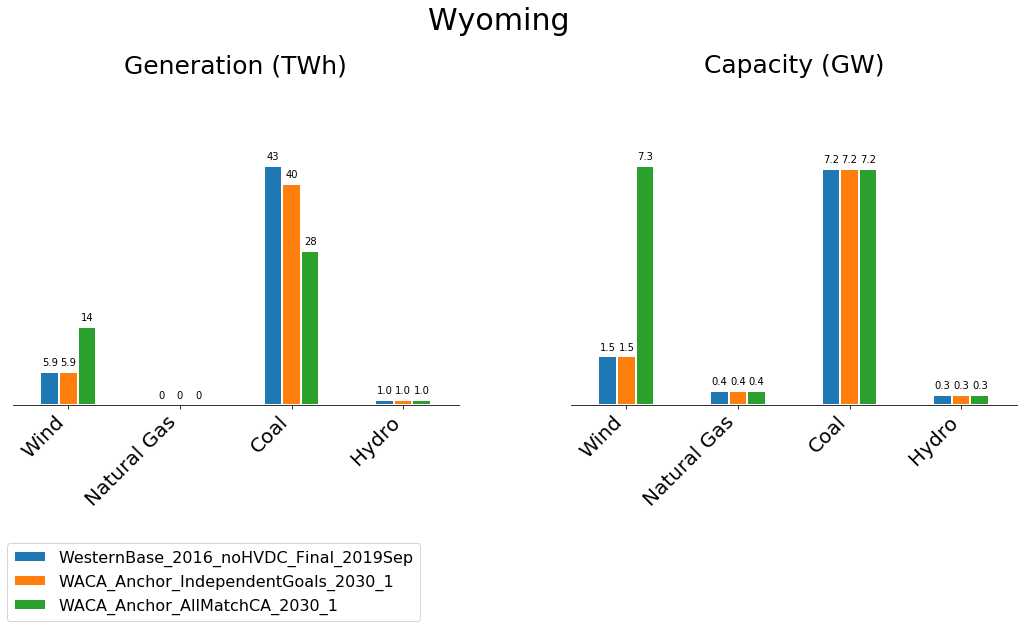

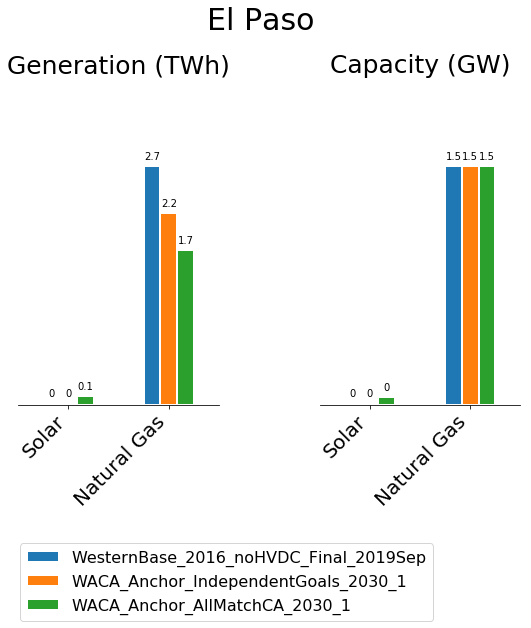

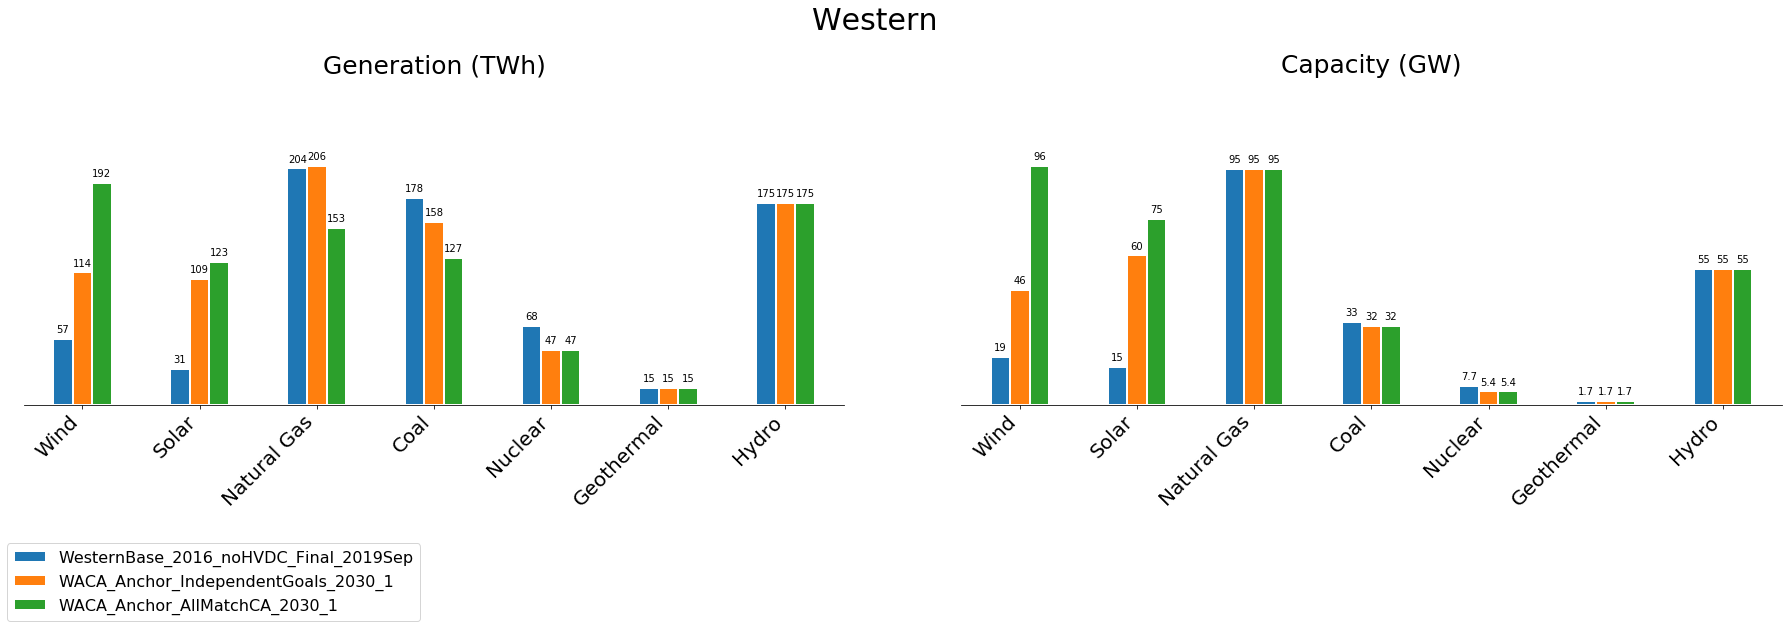

In [3]:
# Most basic bar plot
f = io.StringIO()
with redirect_stdout(f):
    plot_bar('Western', time, ['87', '91', '89'])

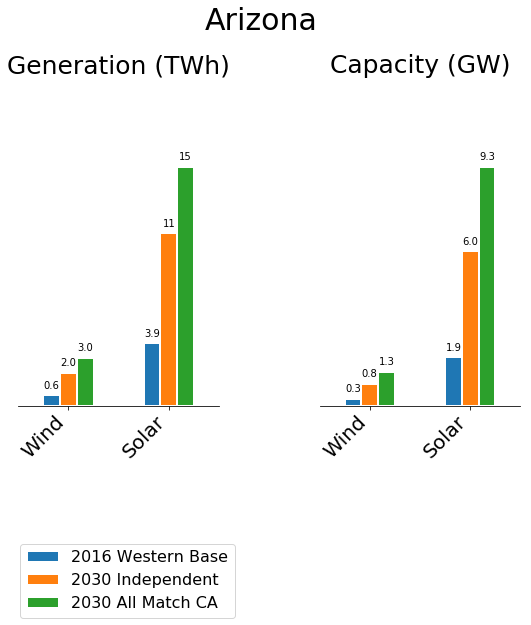

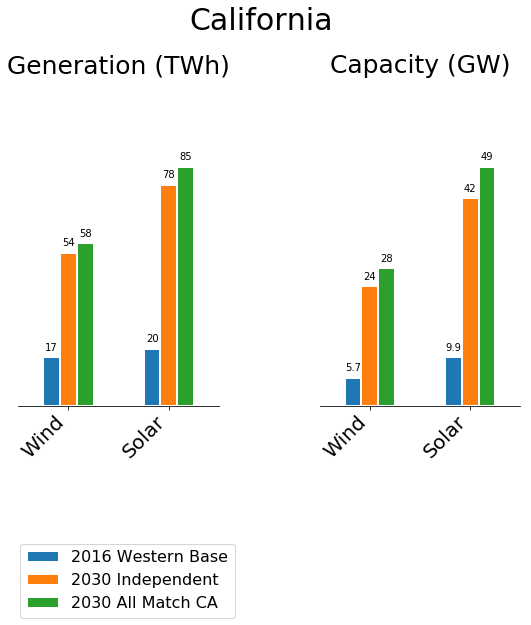

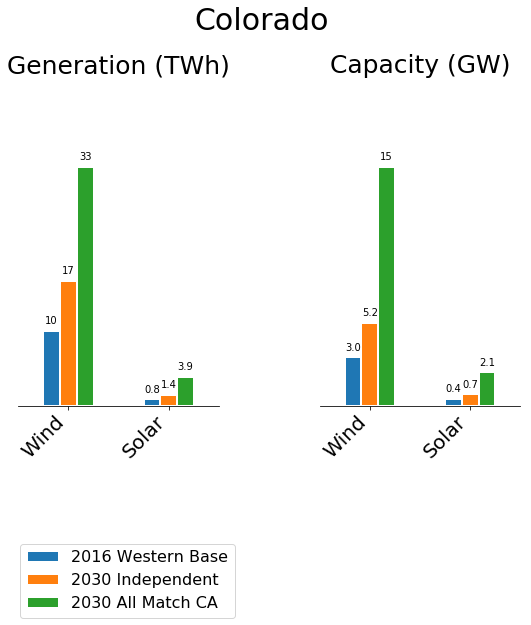

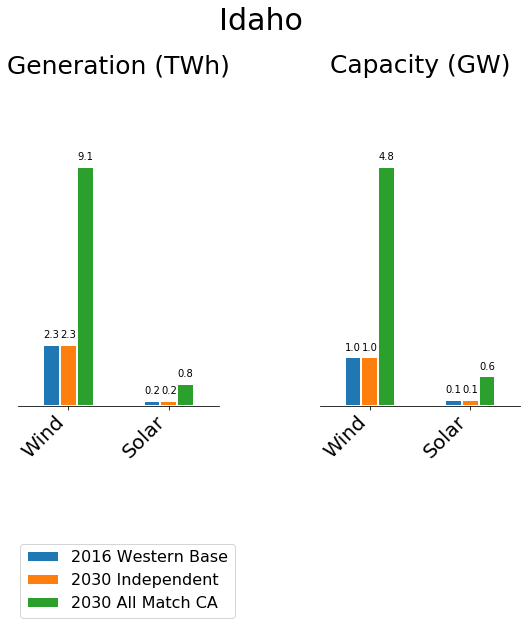

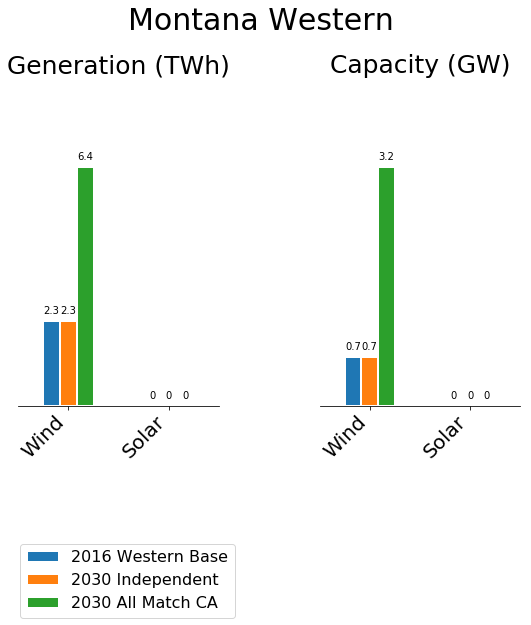

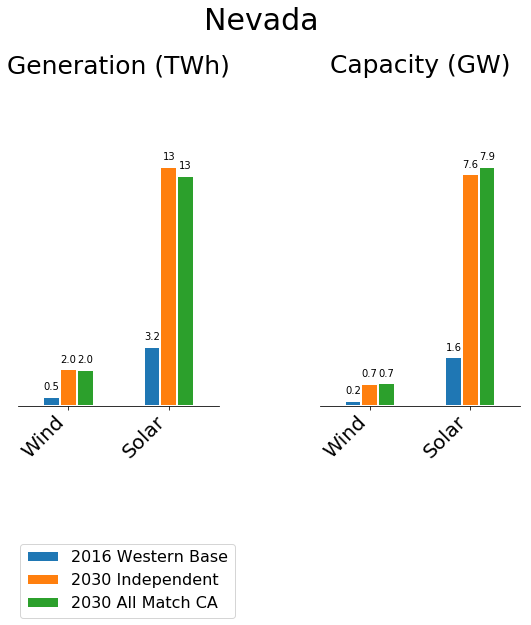

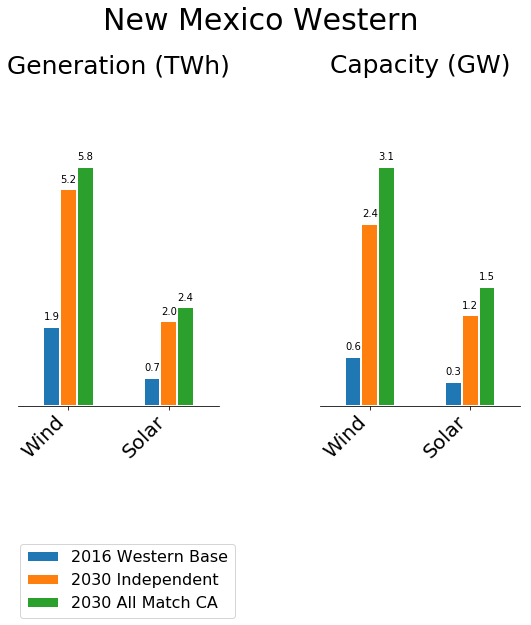

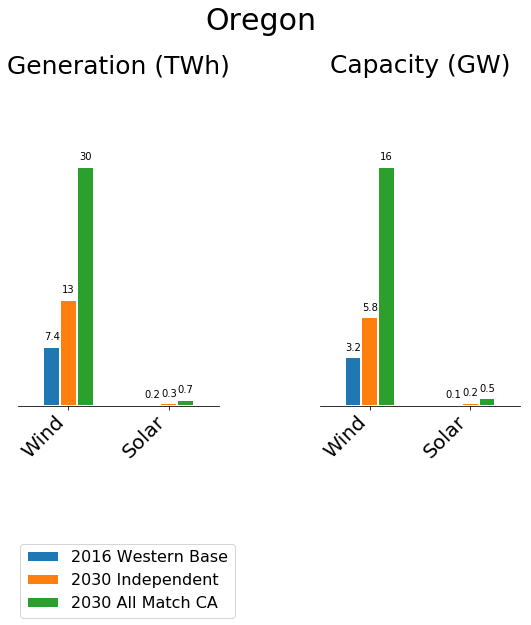

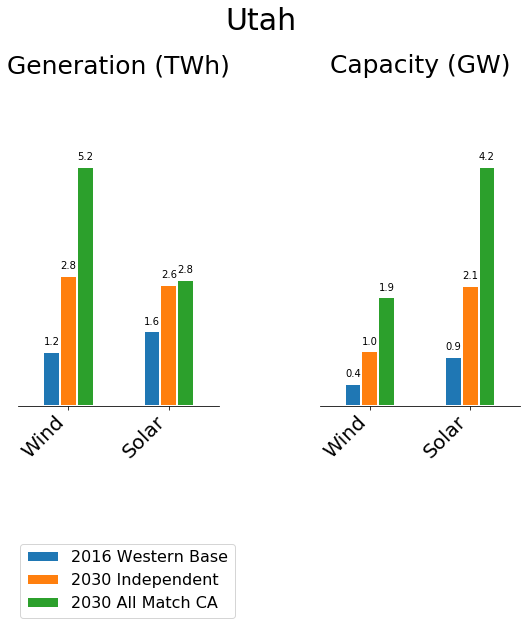

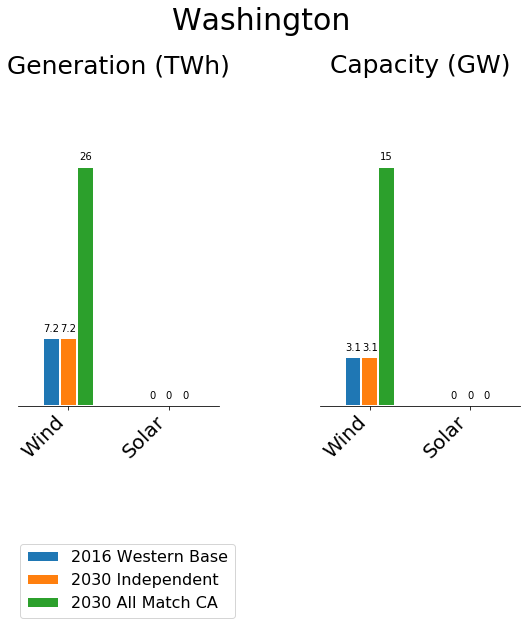

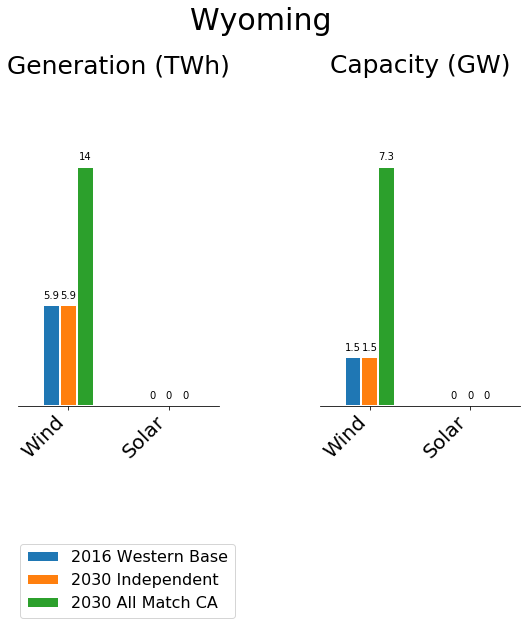

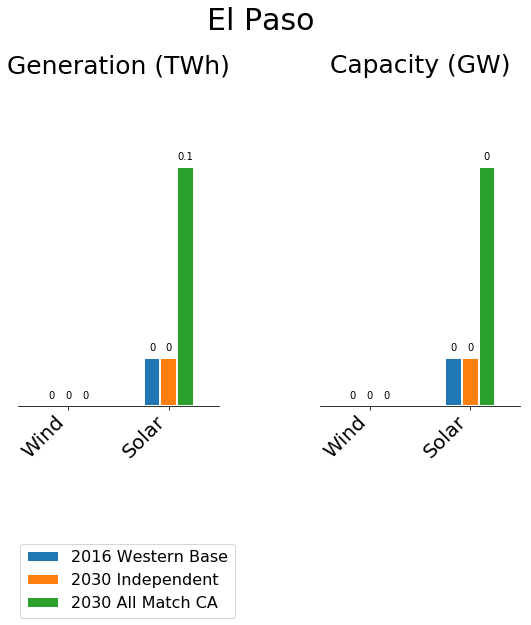

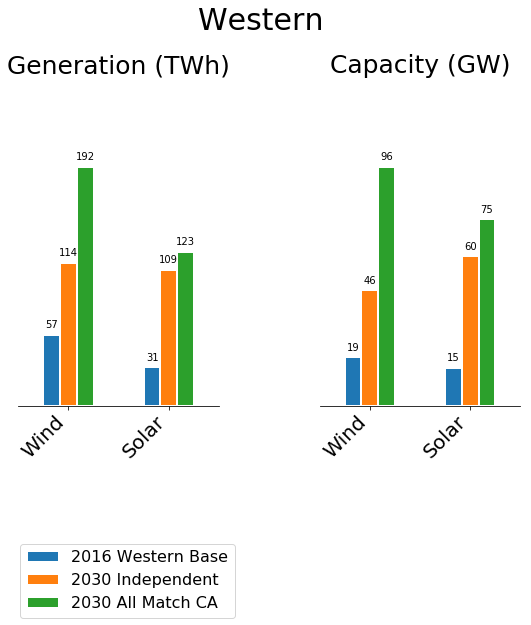

In [4]:
# You can add scenario names and selecting specific resources to show
f = io.StringIO()
with redirect_stdout(f):
    plot_bar('Western', 
             time,
             ['87', '91', '89'], ['2016 Western Base', '2030 Independent', '2030 All Match CA'],
             resource_types=['wind', 'solar'])

## Custom Data using NREL Generation Data

In [5]:
# You can even plot custom data! Let's create some.
# Here we'll compare historical data for western vs. our simulation data and NREL's simulation data
# First, let's read in some csvs.
data_dir = posixpath.abspath(posixpath.join(os.getcwd(), '../../data'))


western_hist_gen = pd.read_csv(posixpath.join(data_dir, '2016_Historical_Western_Generation_TWh.csv'),
                                              index_col='Resource Type')

western_hist_cap = pd.read_csv(posixpath.join(data_dir, '2016_Historical_Western_Capacity_GW.csv'),
                                              index_col='Resource Type')

NREL_low_demand_gen = pd.read_csv(posixpath.join(data_dir, '2016_NREL_Low_Demand_Western_Generation_TWh.csv'),
                                                 index_col='Resource Type')

NREL_mid_case_gen = pd.read_csv(posixpath.join(data_dir, '2016_NREL_Mid_Case_Western_Generation_TWh.csv'),
                                               index_col='Resource Type')

print('Done')

Done


In [6]:
# Let's print the raw NREL_mid_case data to see what it looks like
pprint(NREL_mid_case_gen)

                    Arizona  California  Colorado  El Paso  Idaho  Nevada  \
Resource Type                                                               
coal                39.83    0.00        28.96     0.0      0.00   5.46     
geothermal          0.00     15.61       0.00      0.0      0.09   4.20     
hydro               6.75     31.63       1.68      0.0      9.98   2.18     
ng                  25.32    125.63      16.62     0.0      2.13   9.65     
nuclear             31.12    18.18       0.00      0.0      0.00   0.00     
other inc. biomass  0.22     4.80        0.09      0.0      0.16   0.01     
solar               5.45     25.87       1.04      0.0      0.14   3.28     
wind                0.71     15.03       8.38      0.0      2.53   0.40     

                    Oregon   Utah  Washington  Western  Montana Western  \
Resource Type                                                             
coal                0.00    33.26  4.73        164.56   5.59              
geot

In [7]:
# Next, we'll format the data for our plot
# Here we're using a helper function called make_gen_cap_custom_data
# This is useful you want to plot both generation and capacity data -- a common use case

western_hist = make_gen_cap_custom_data(
    'Western', 
    '2016 Historical Western Data',
    gen_data=western_hist_gen.to_dict(), 
    cap_data=western_hist_cap.to_dict())

NREL_low_demand = make_gen_cap_custom_data(
    'Western', 
    'NREL Low Demand Baseline',
    gen_data=NREL_low_demand_gen.to_dict(), 
    cap_data=None) # We don't have capacity data so leave it blank

NREL_mid_case = make_gen_cap_custom_data(
    'Western', 
    '2016 NREL Mid Case',
    gen_data=NREL_mid_case_gen.to_dict(), 
    cap_data=None) # We don't have capacity data so leave it blank

# Note that we put all our custom data into a dict. The names of the keys don't really matter here.
custom_data = {'historical': western_hist, 'nrel_mid': NREL_mid_case, 'nrel_low_demand': NREL_low_demand}

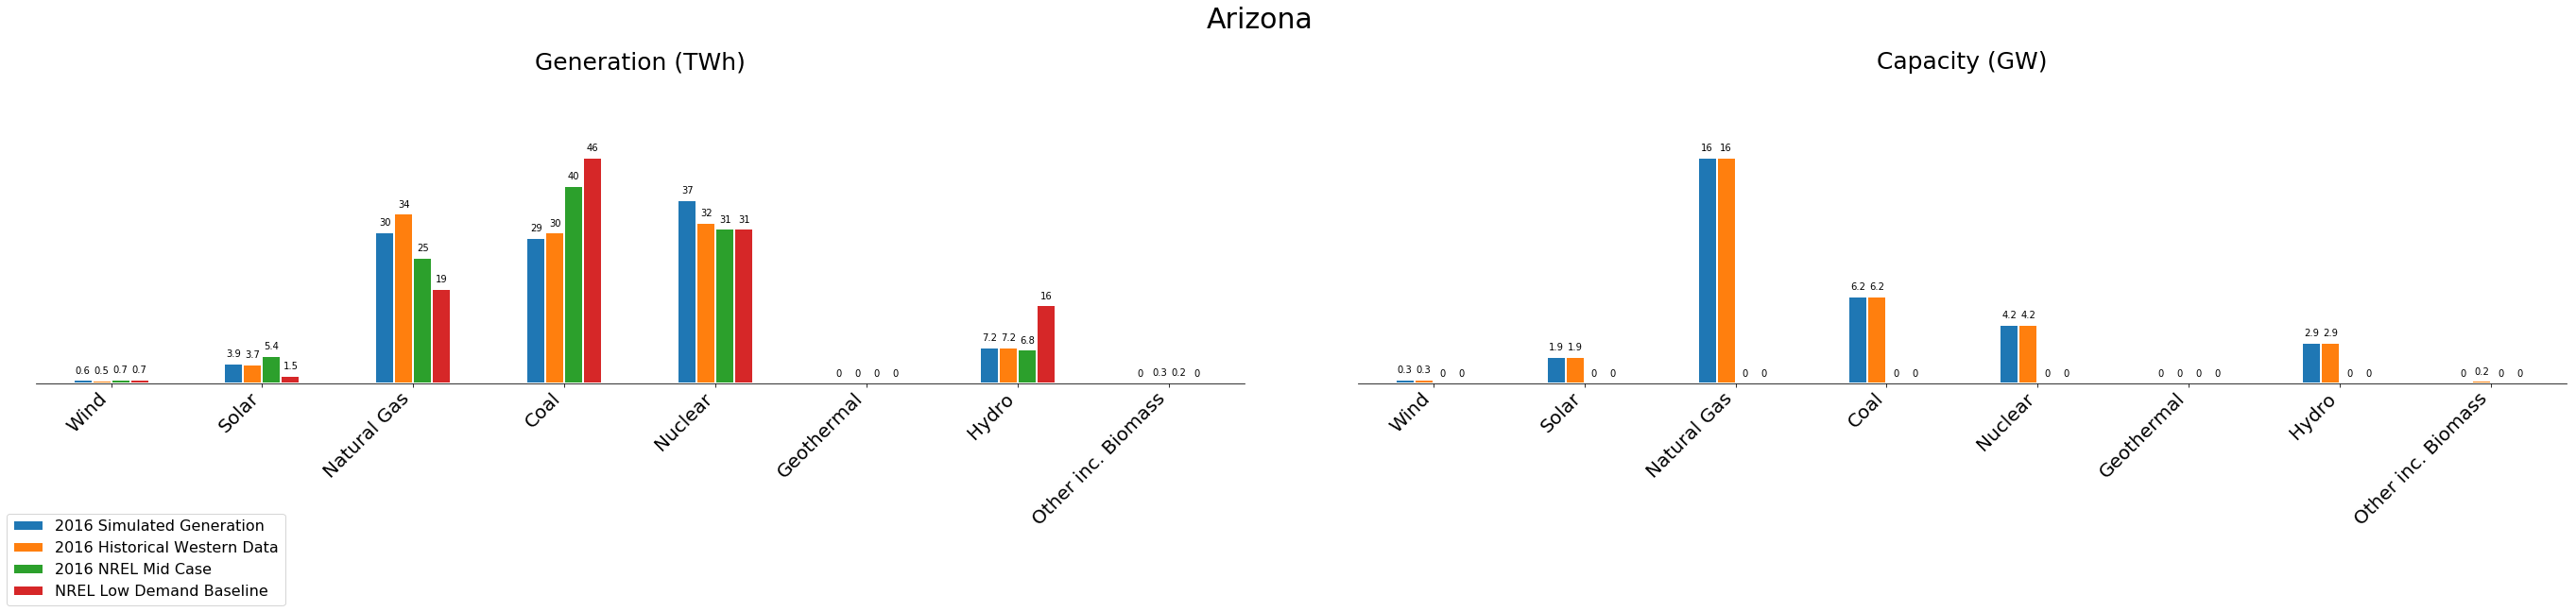

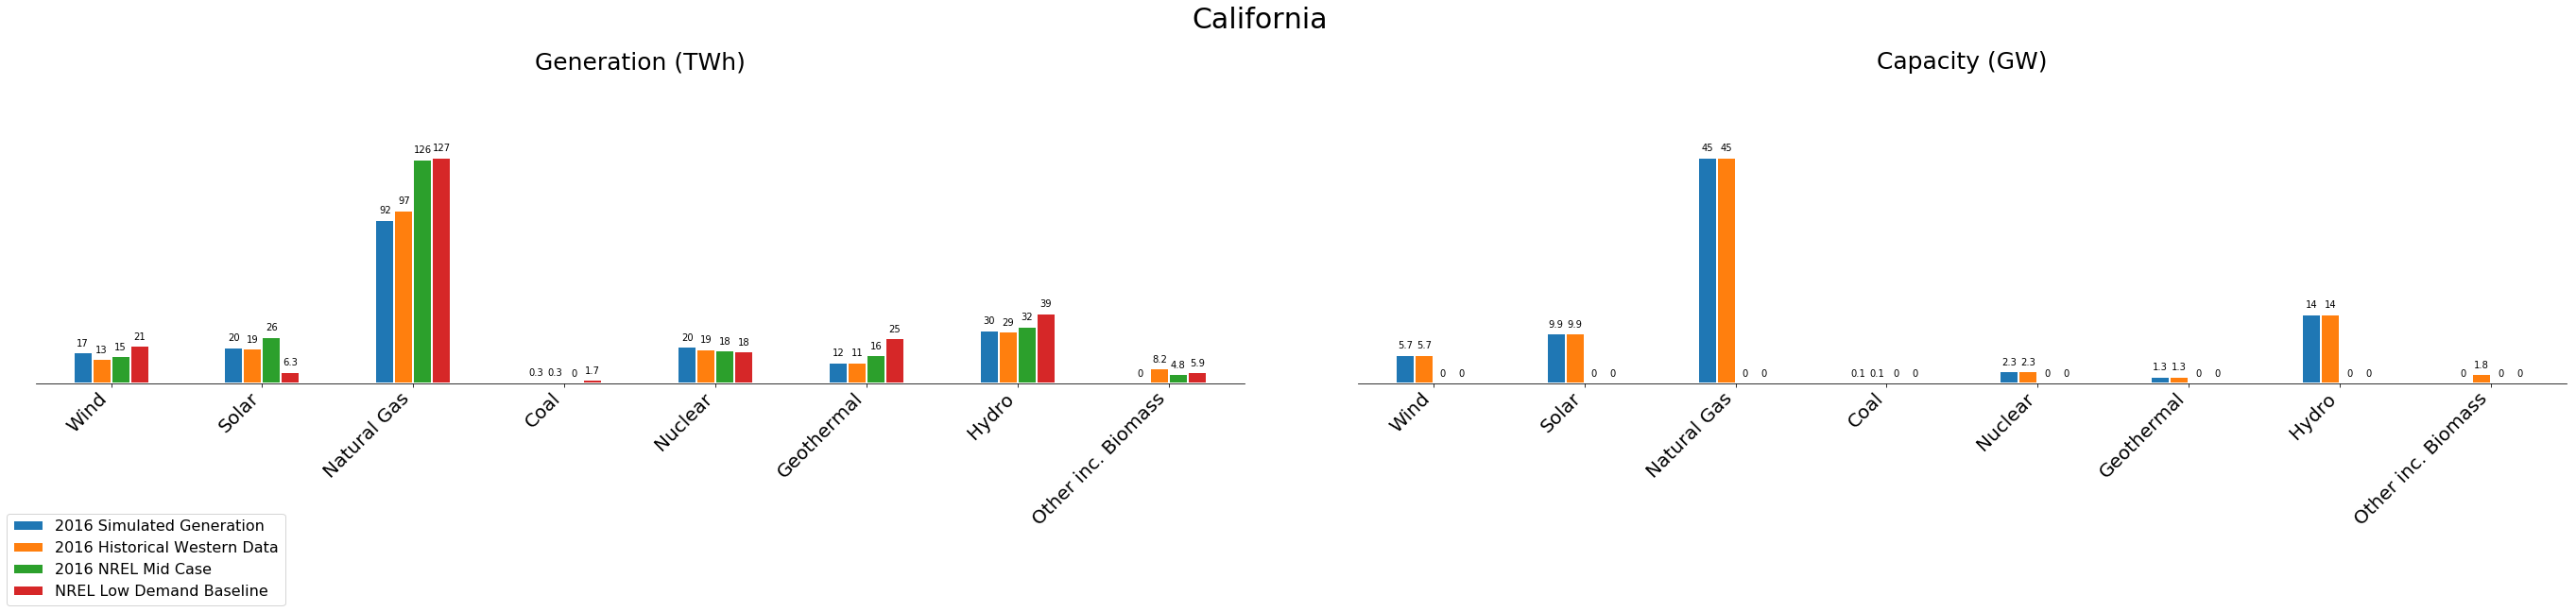

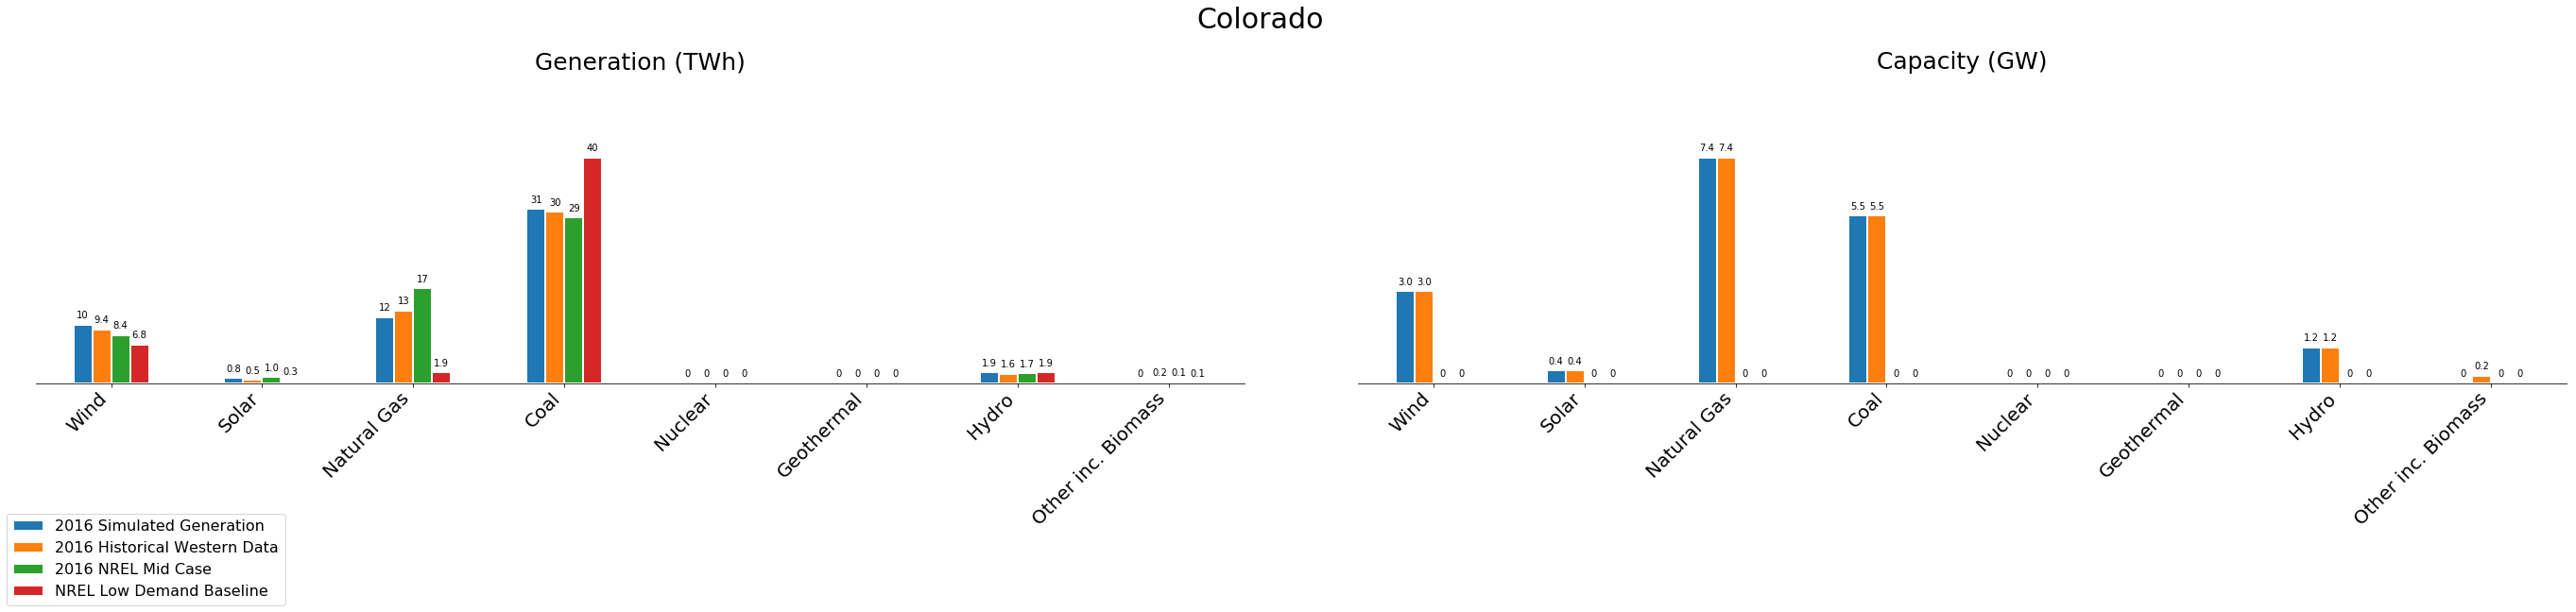

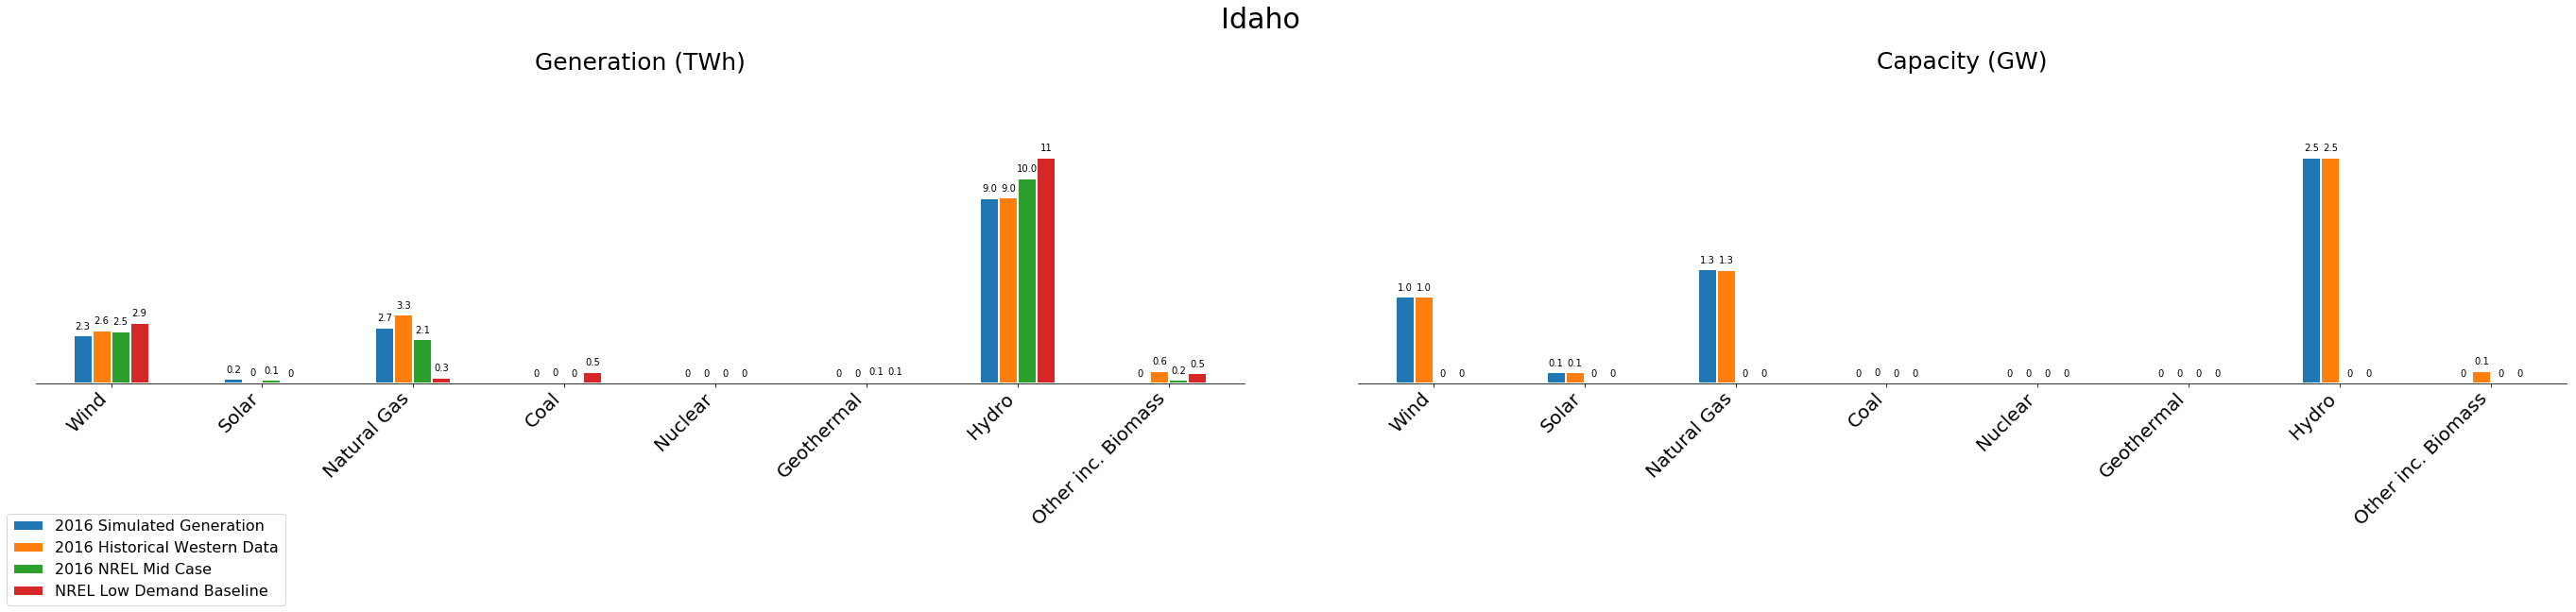

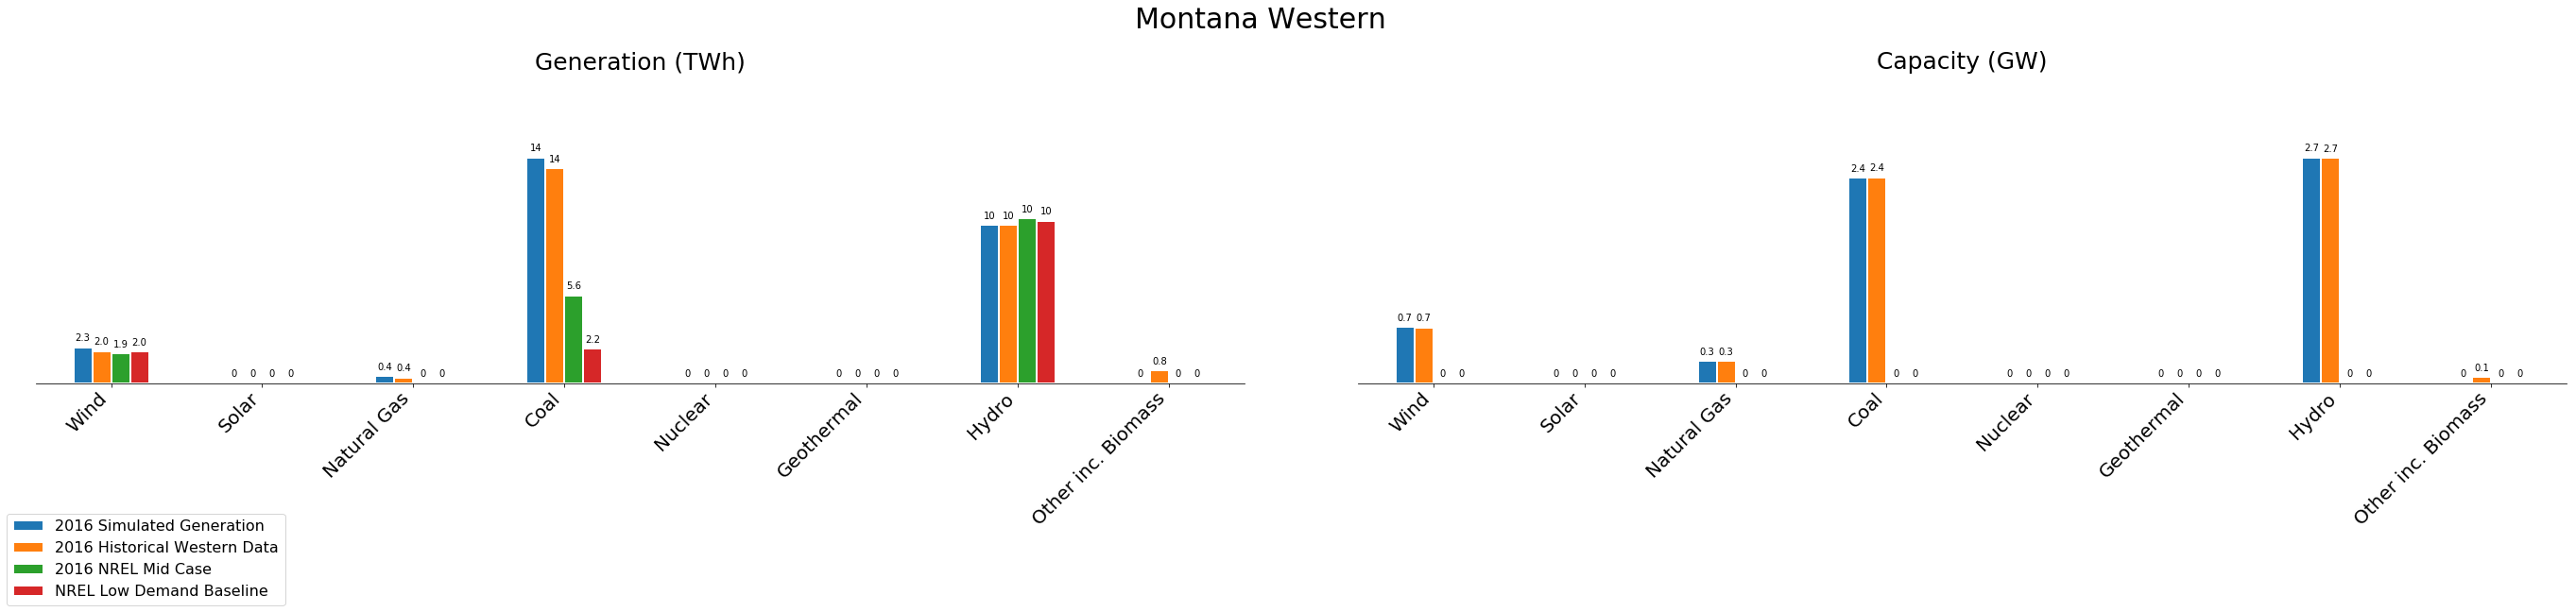

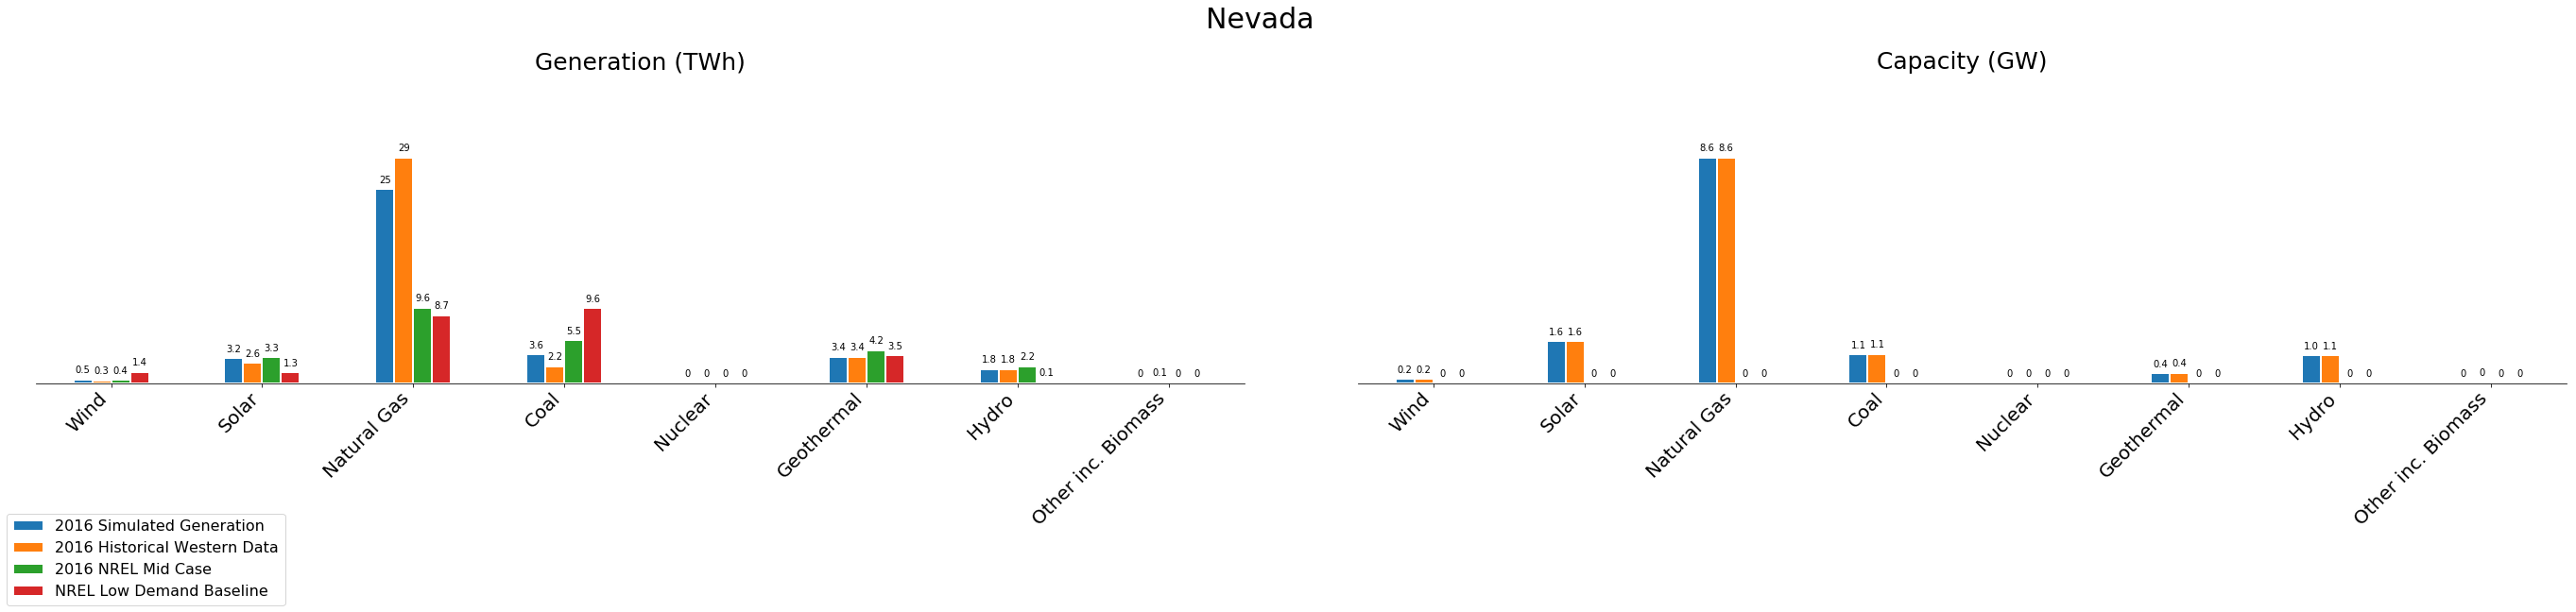

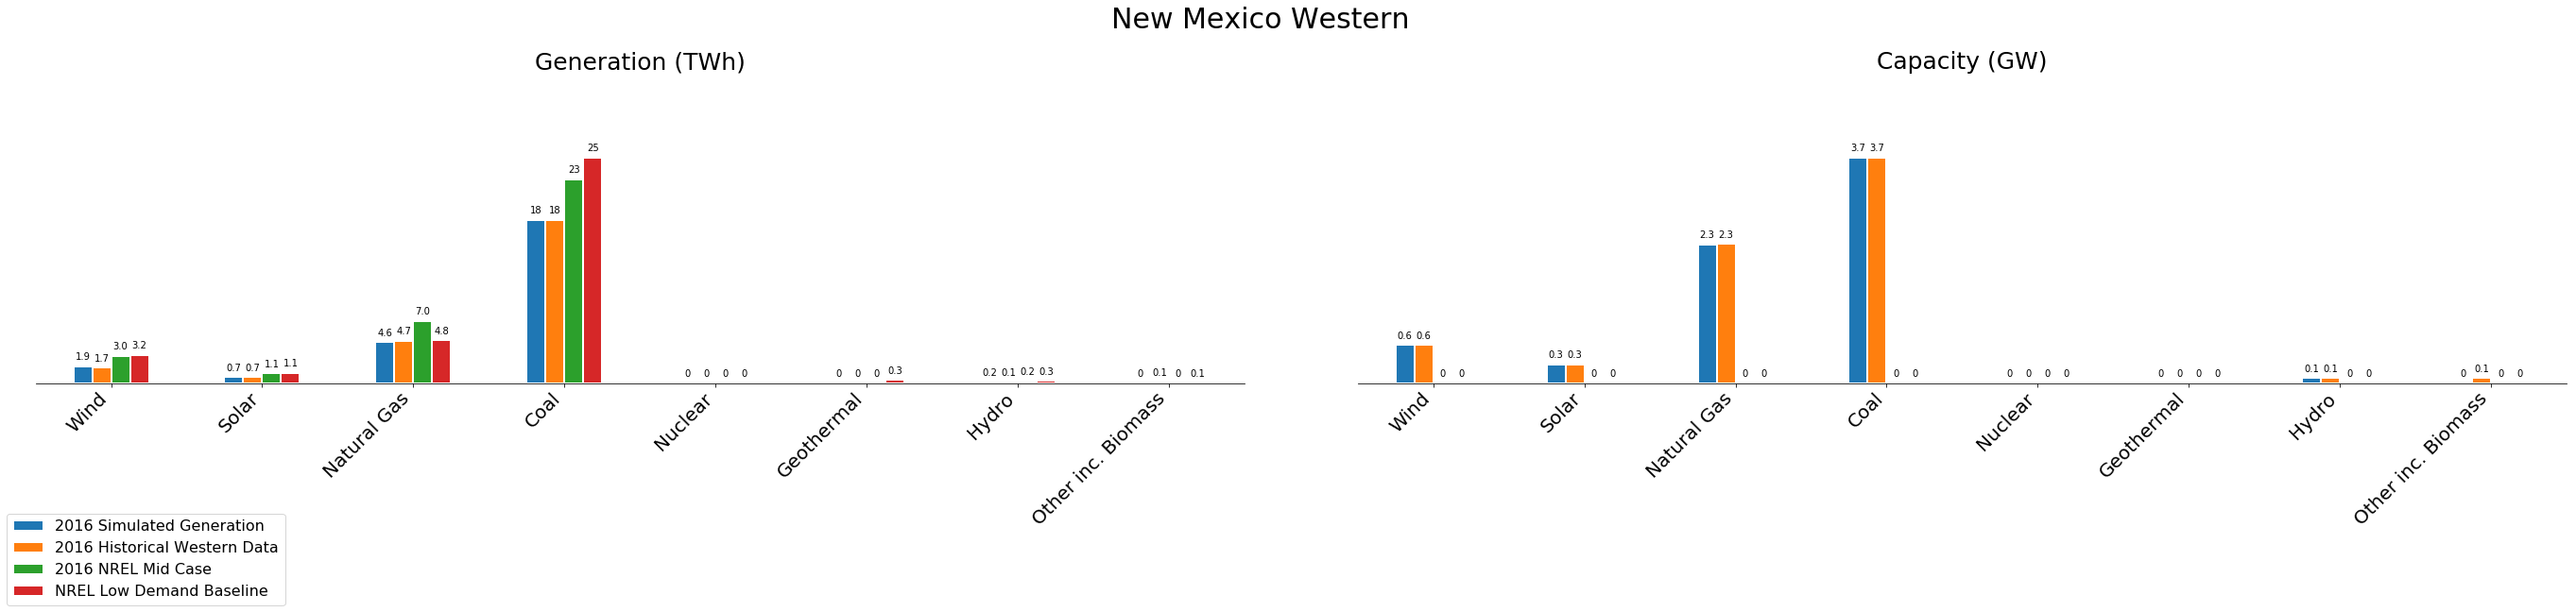

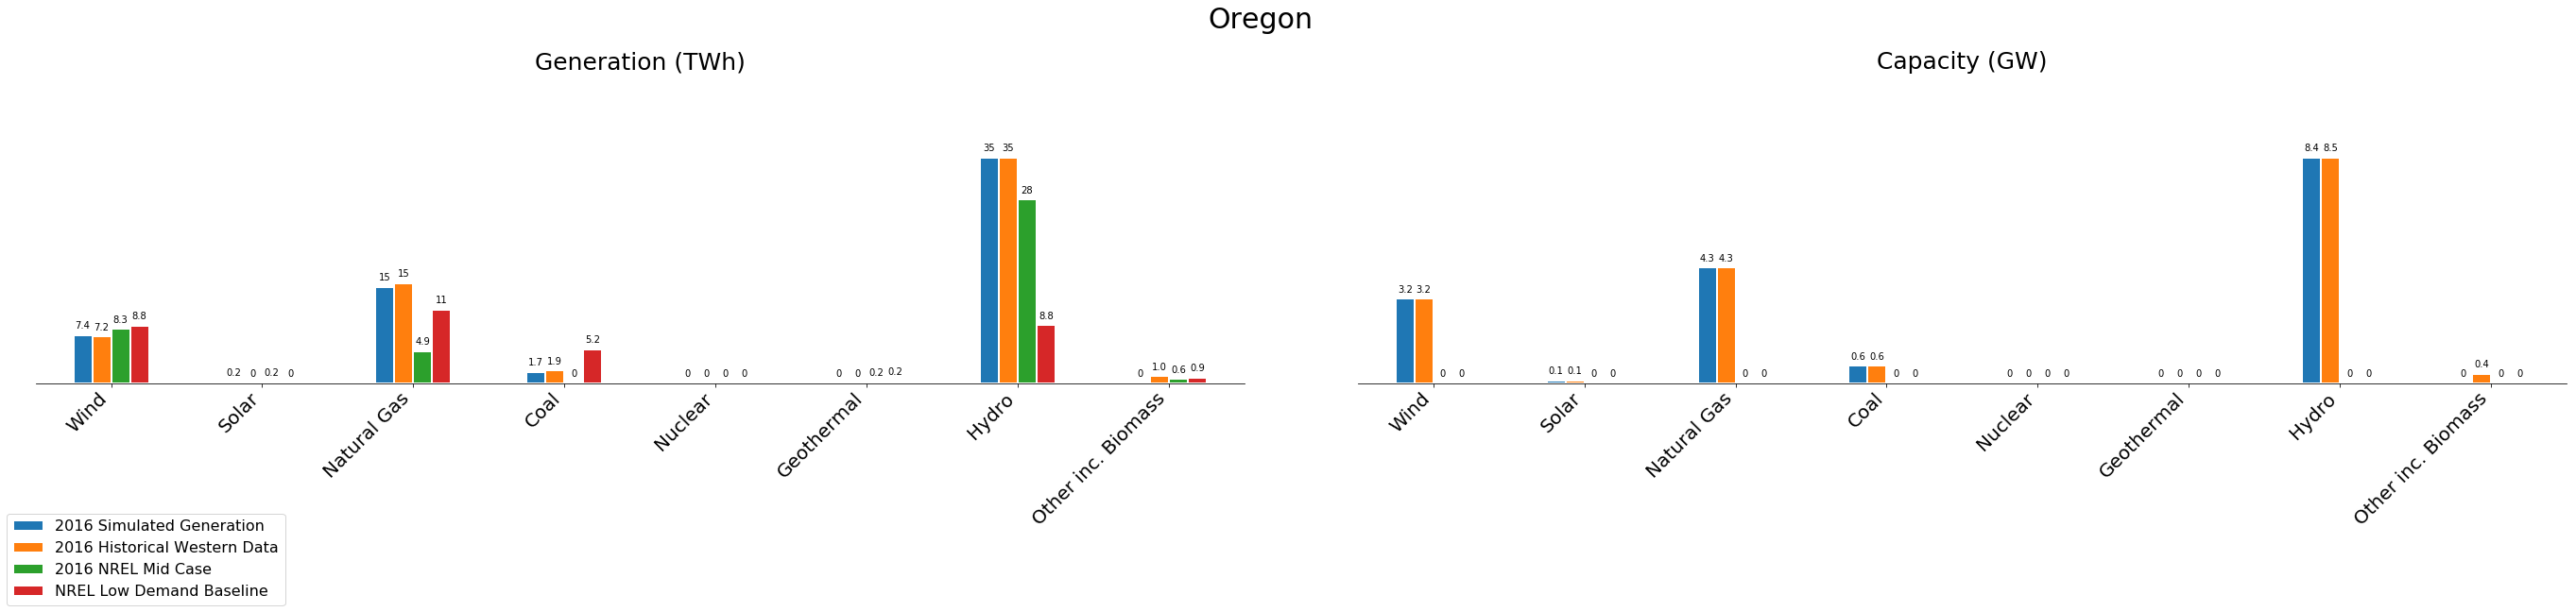

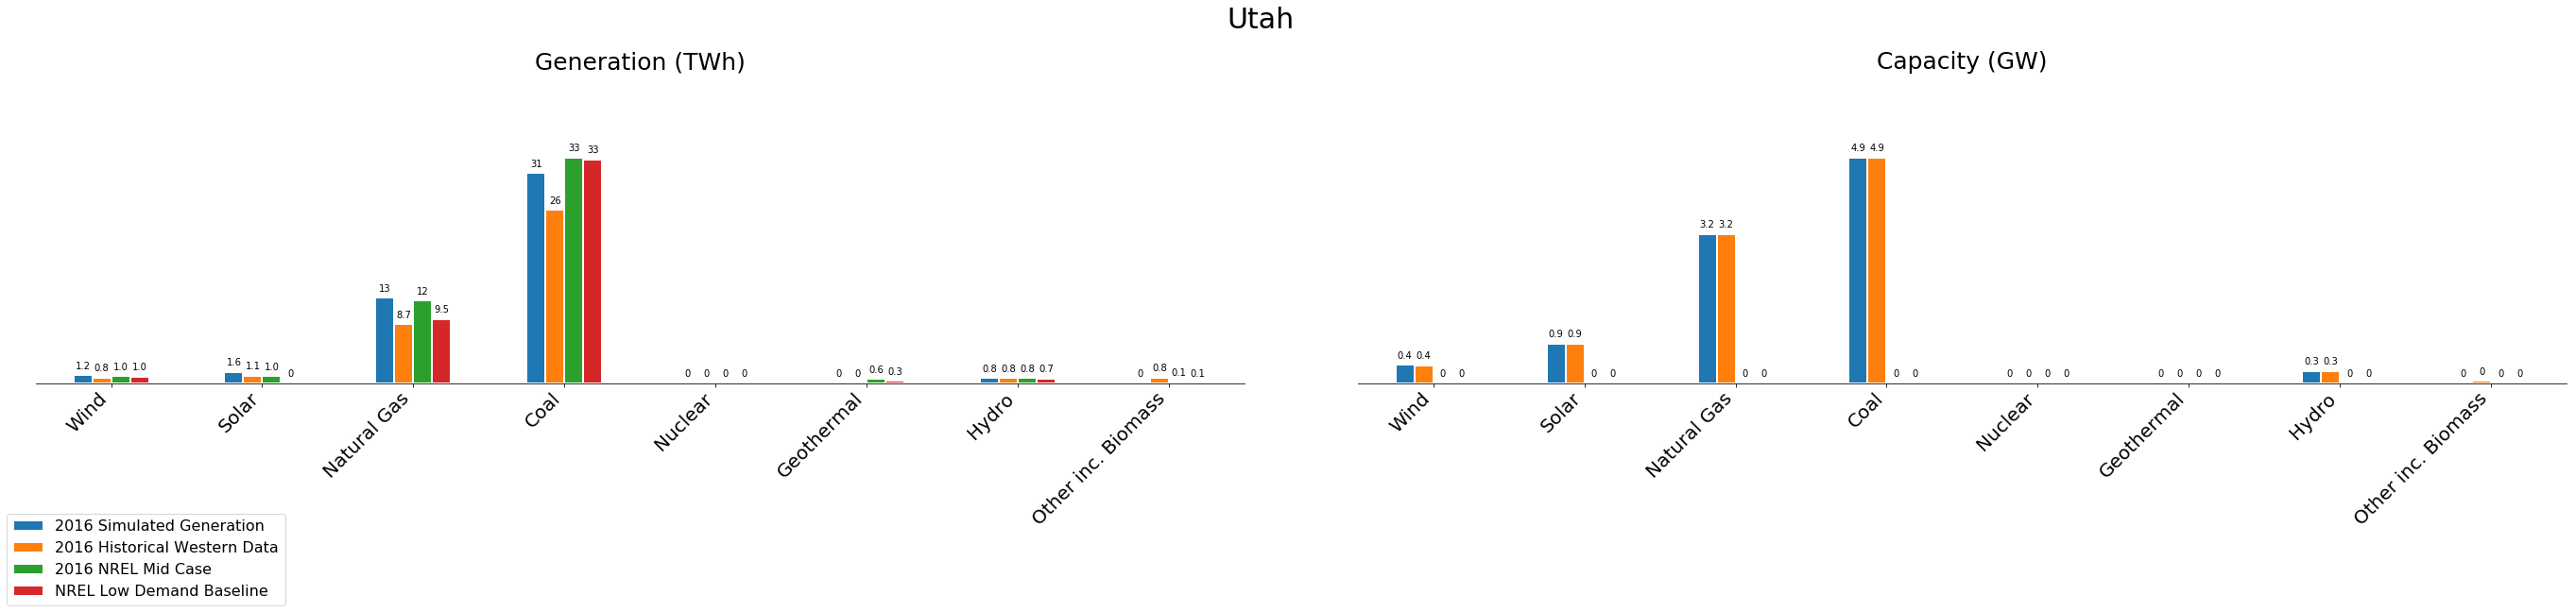

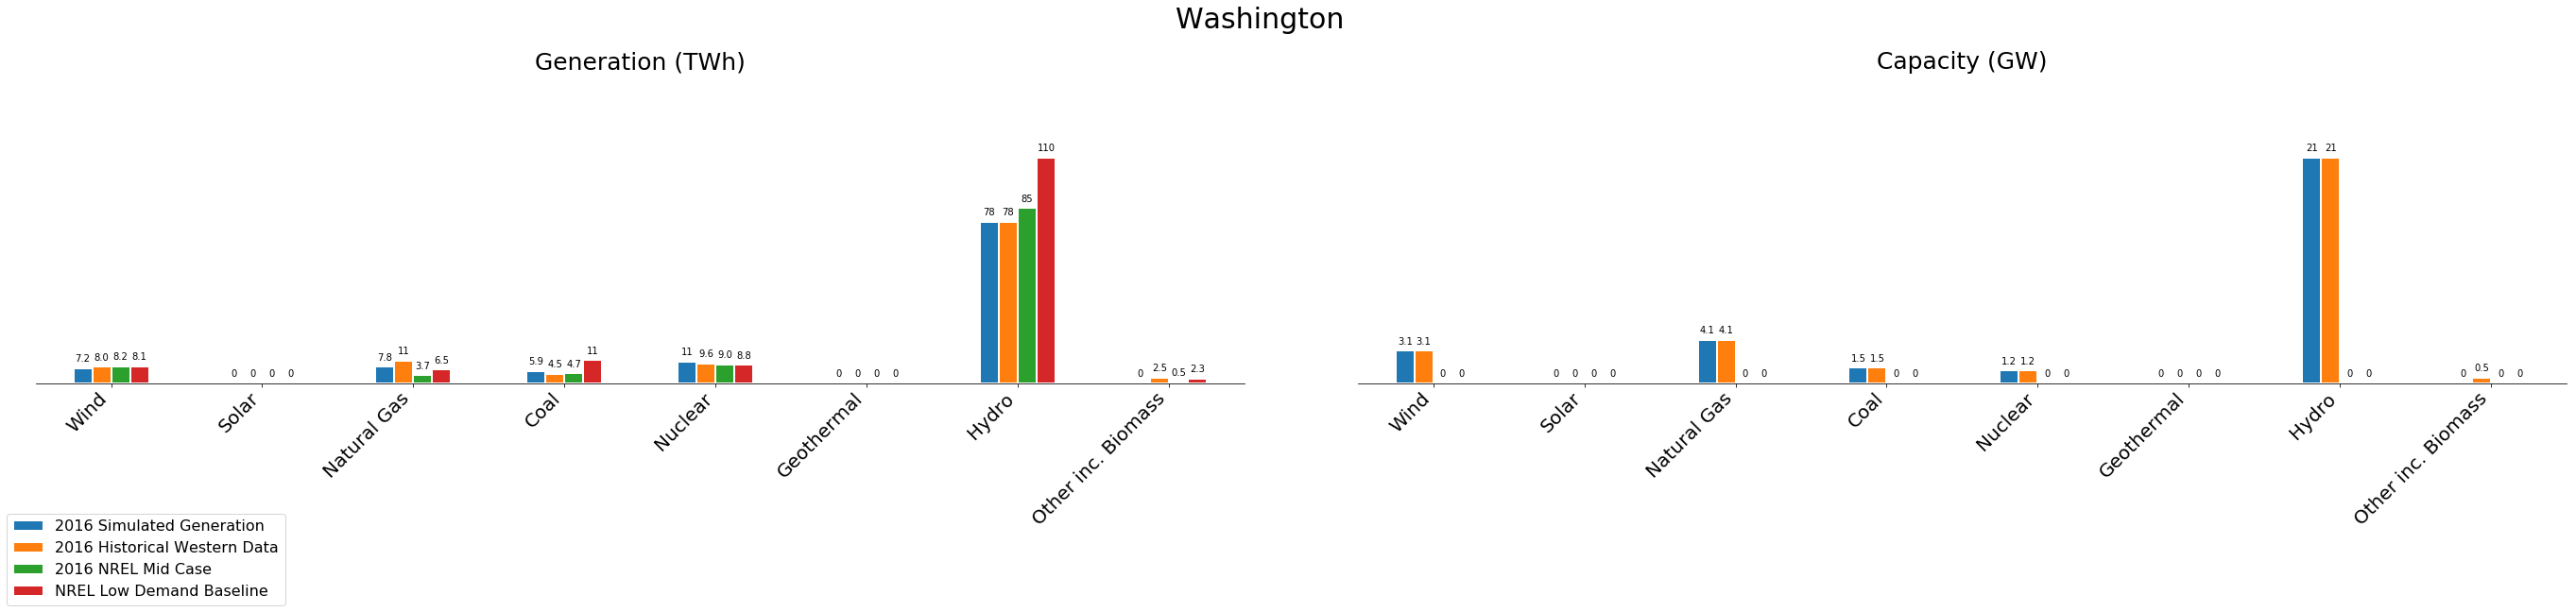

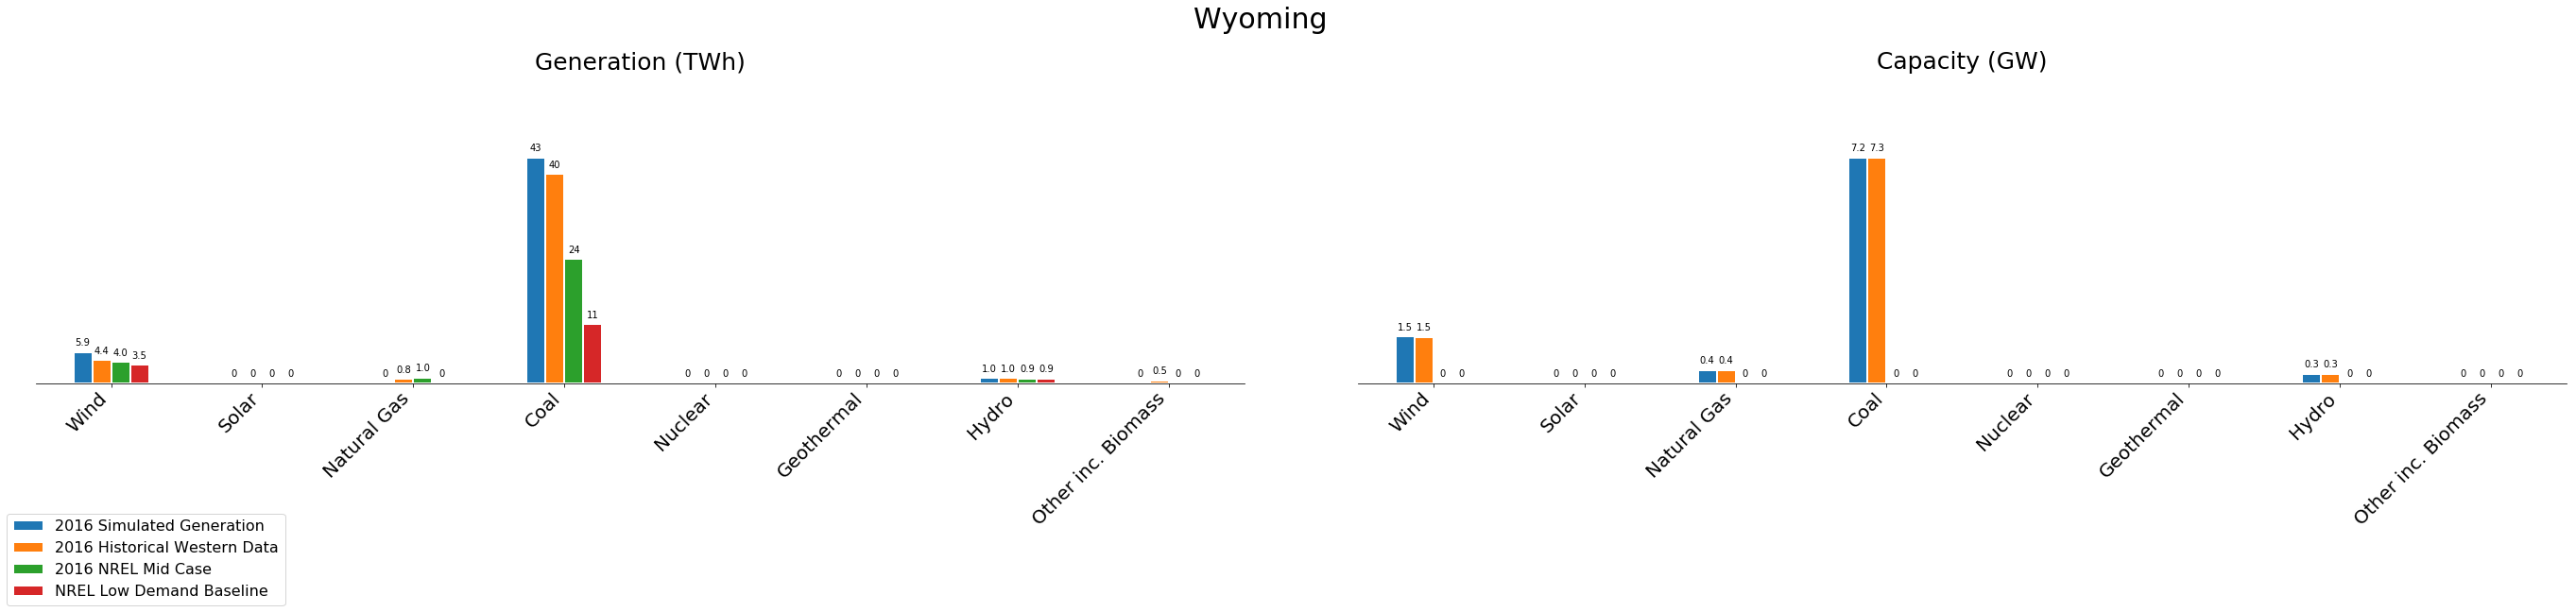

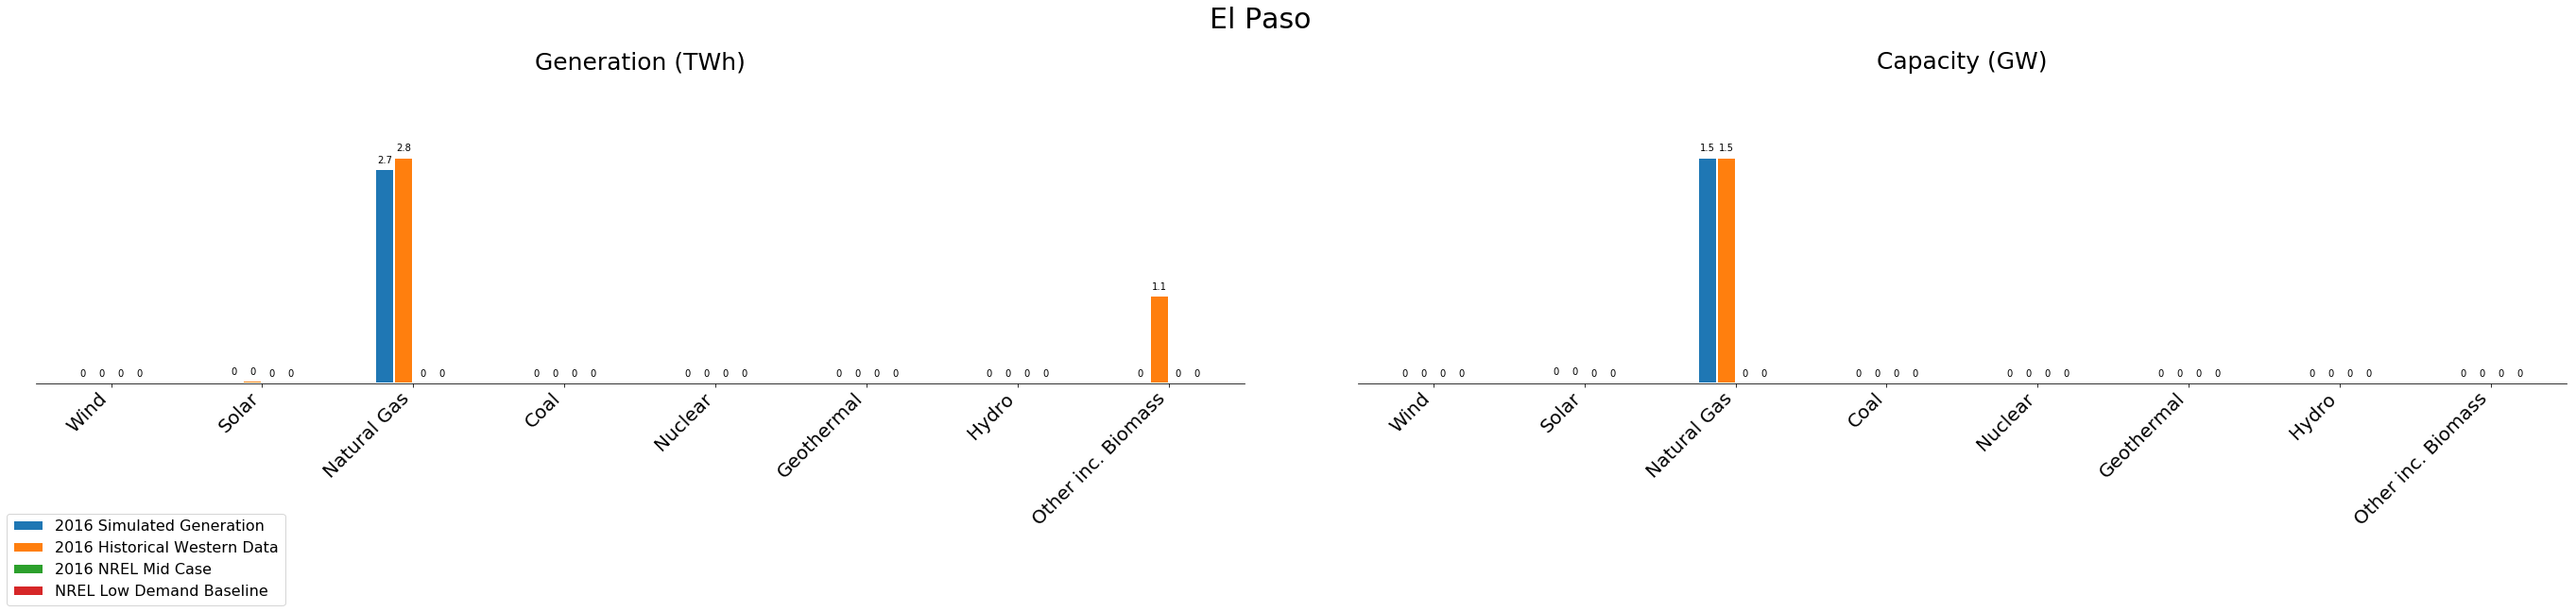

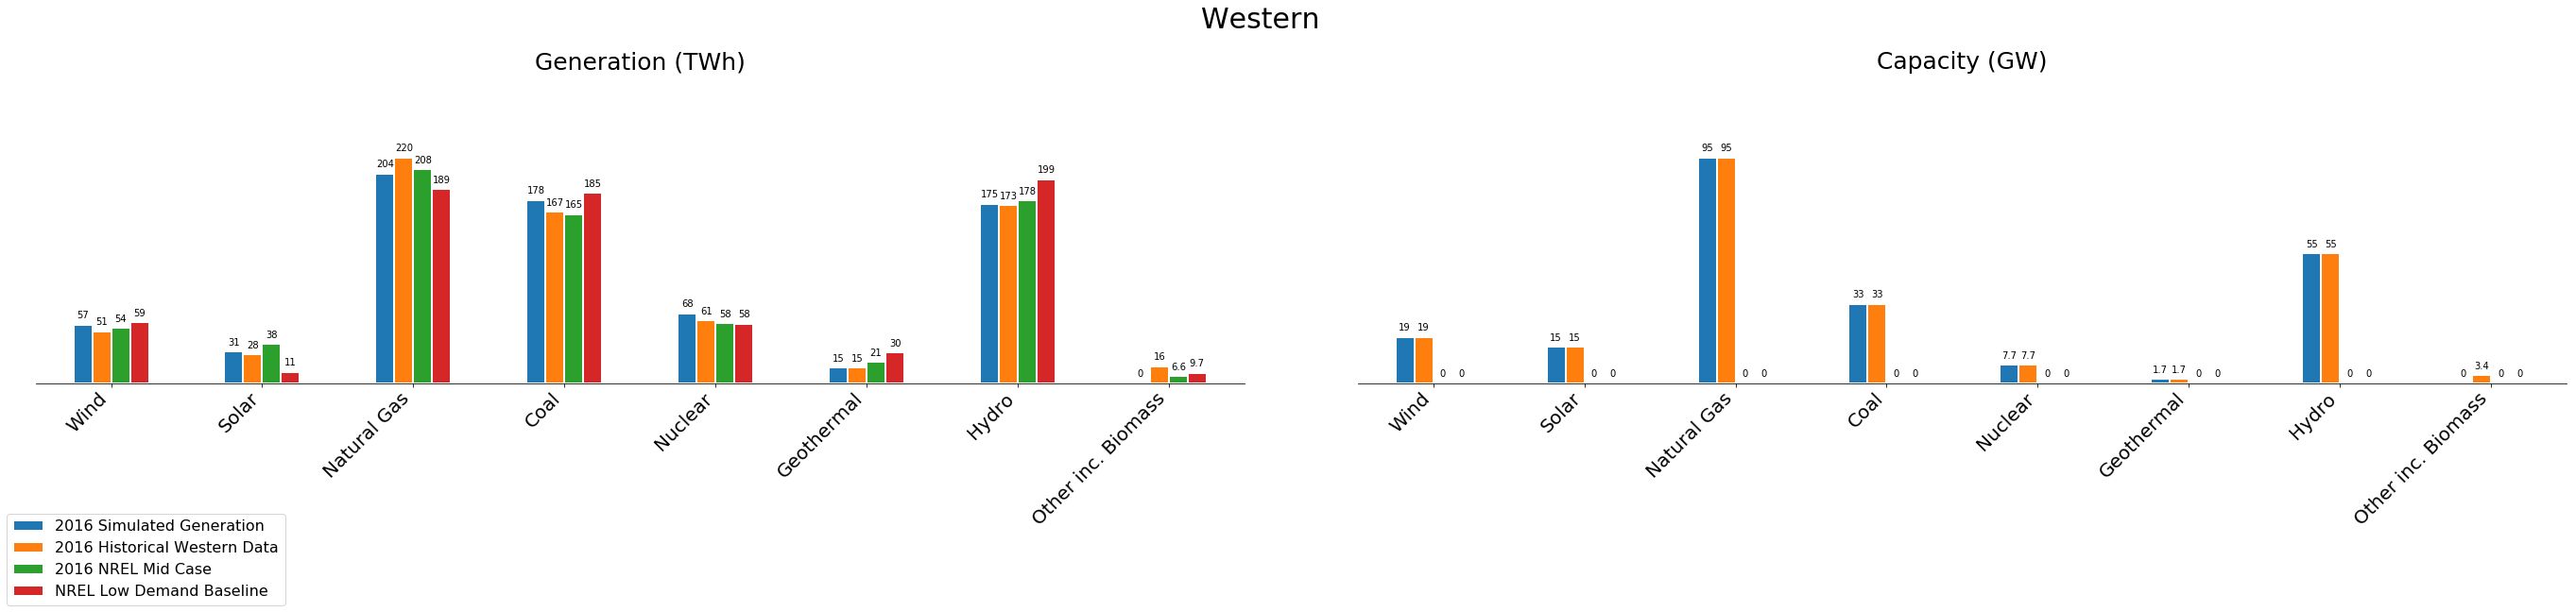

In [8]:
# Let's plot it!
f = io.StringIO()
with redirect_stdout(f):
    plot_bar(interconnect = 'Western',
             time = time,
             scenario_ids = ['87'],
             scenario_names = ['2016 Simulated Generation'],
             custom_data = custom_data)

# Horizontal bar plot

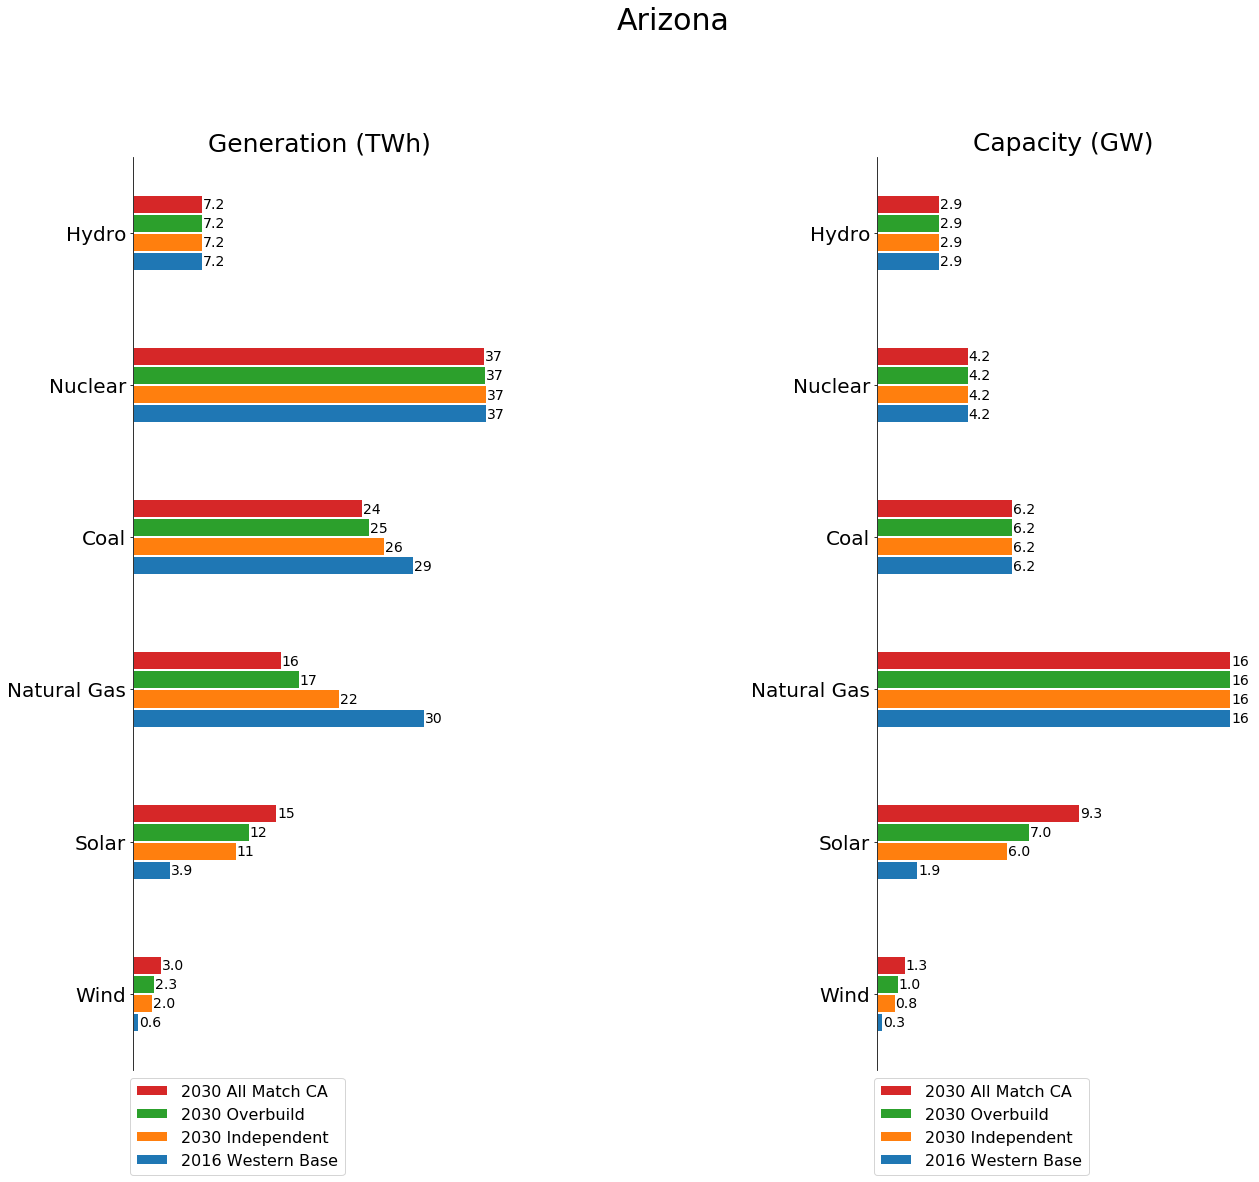

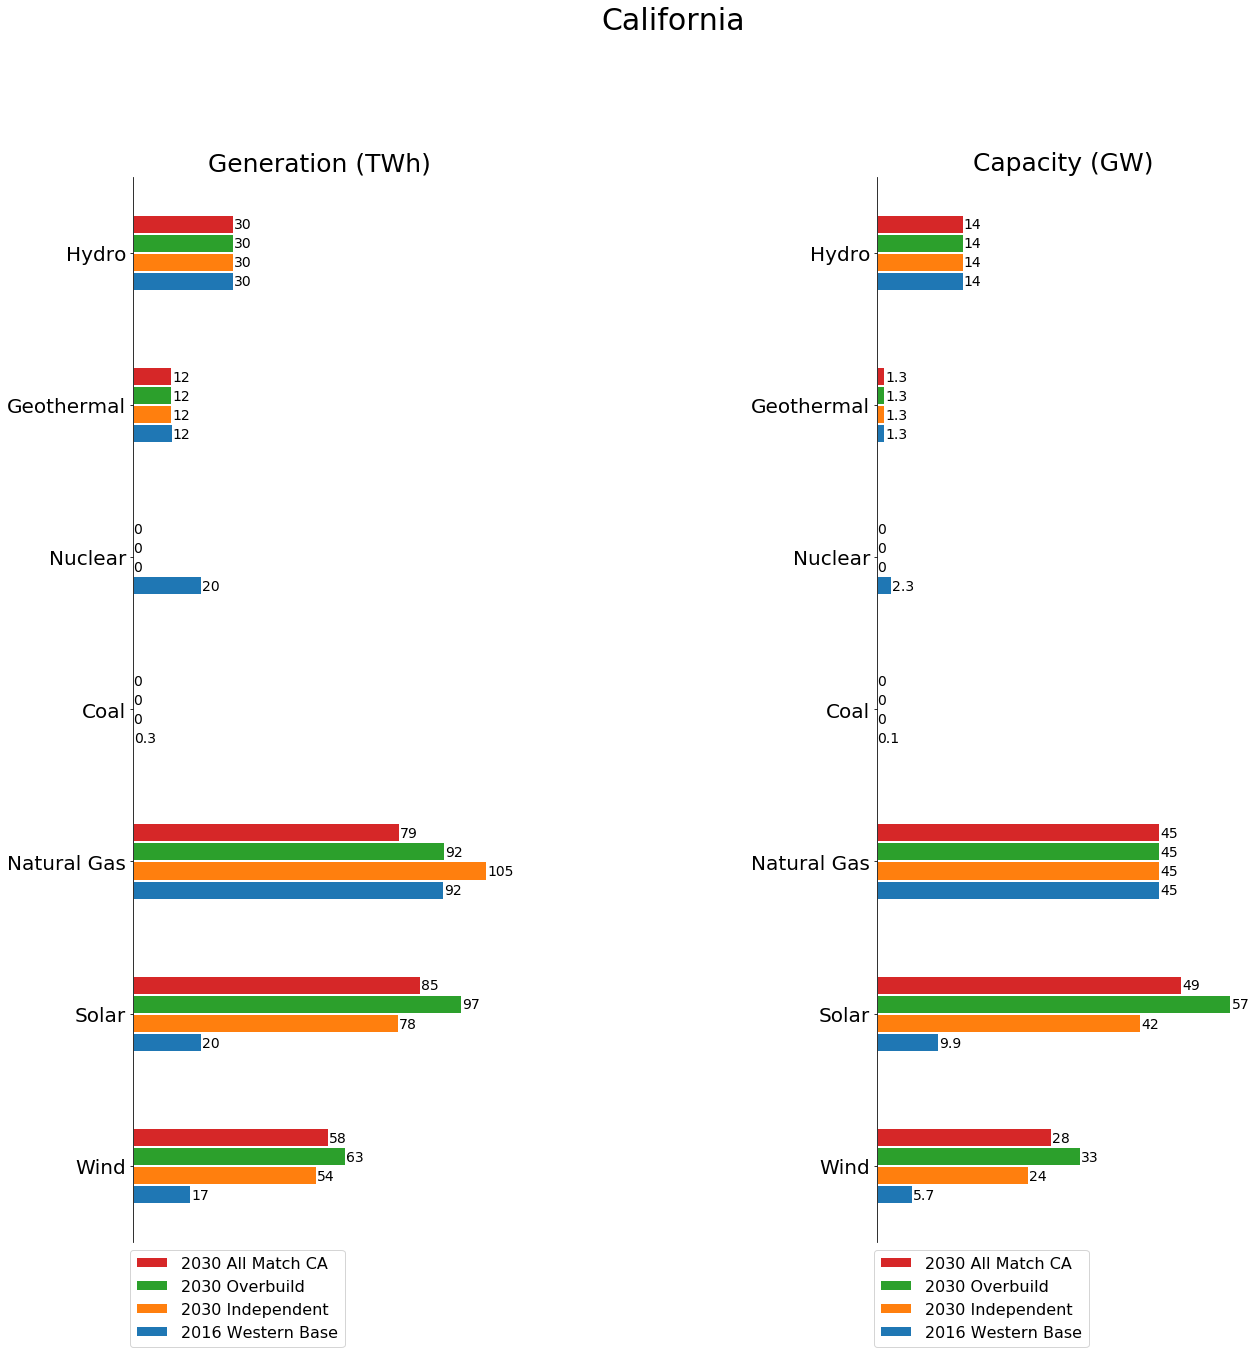

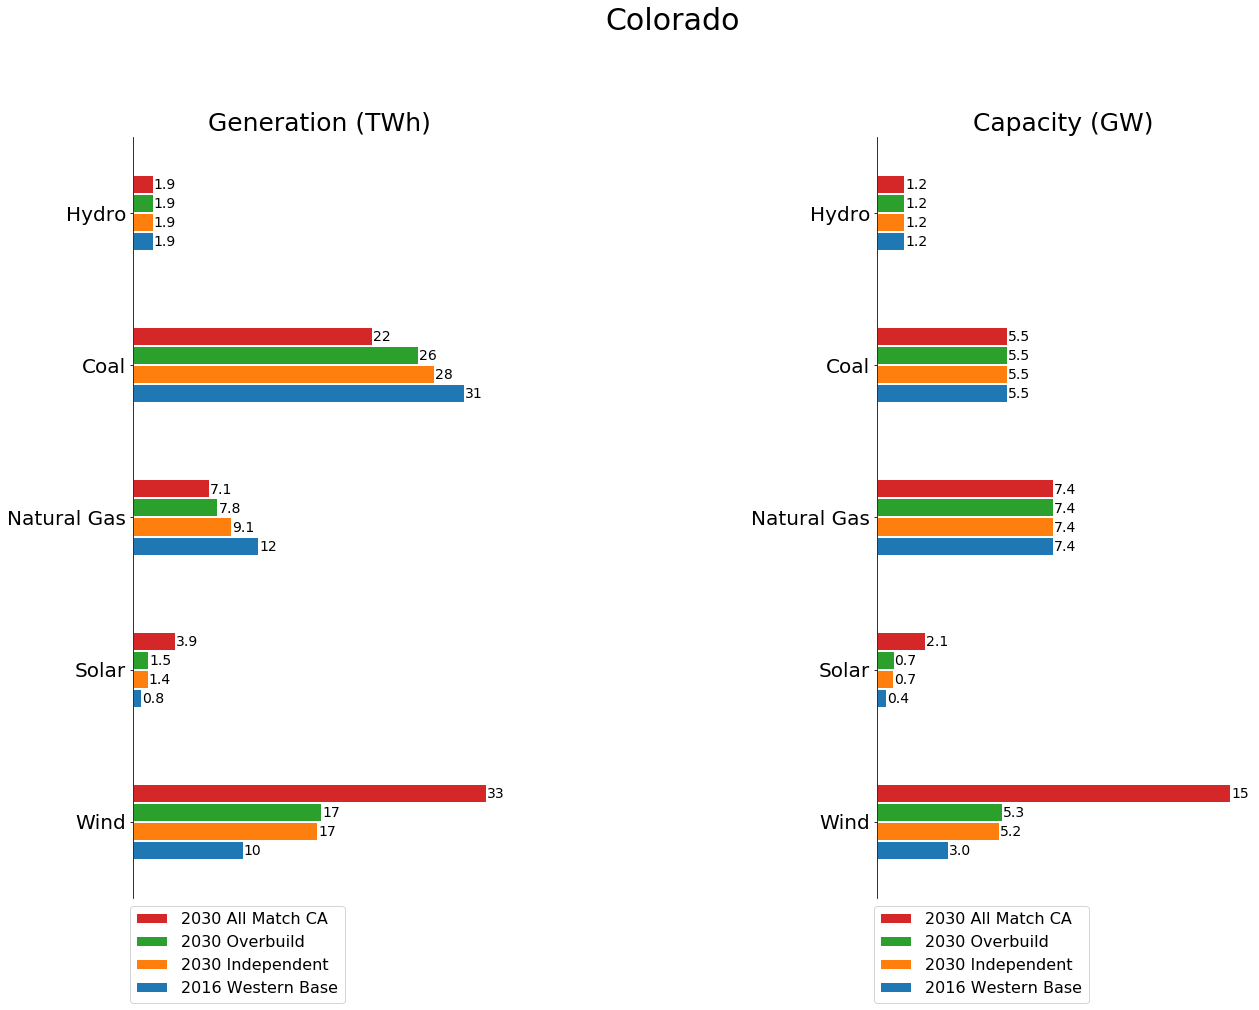

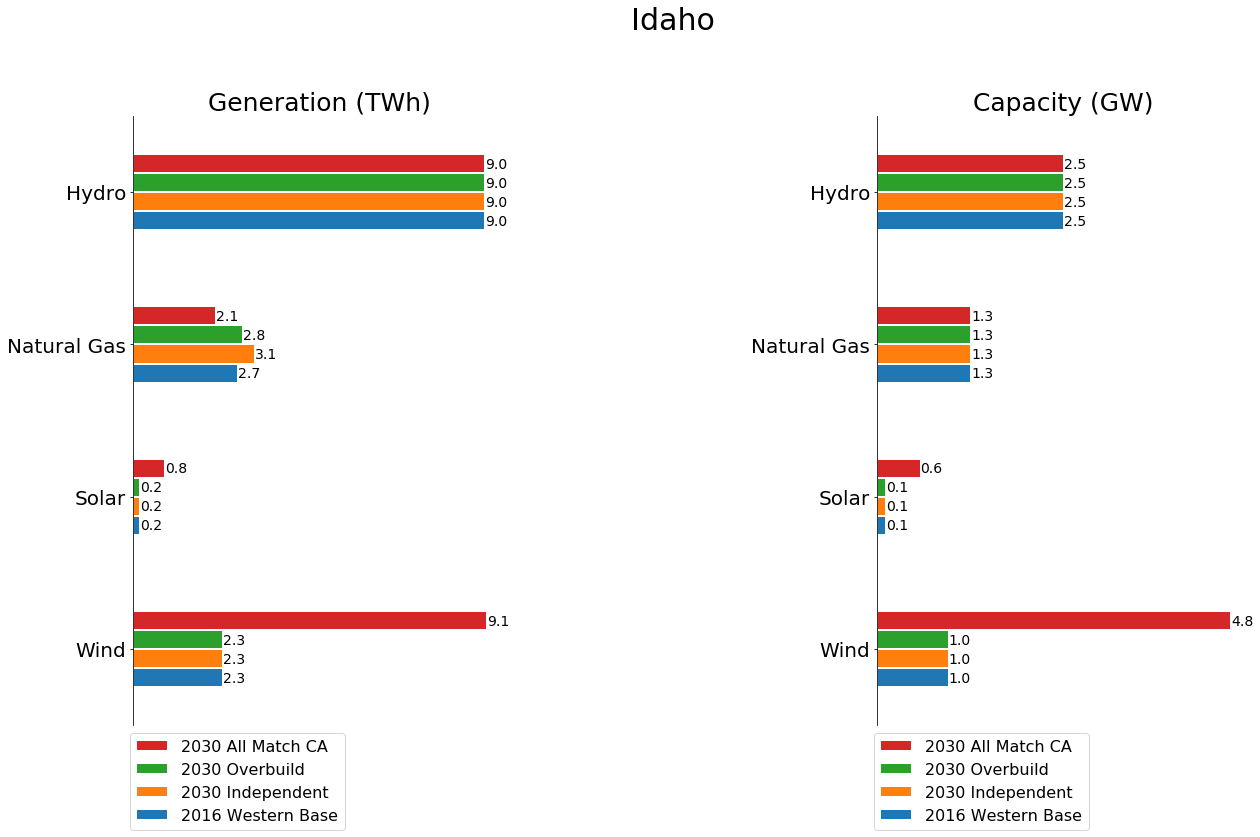

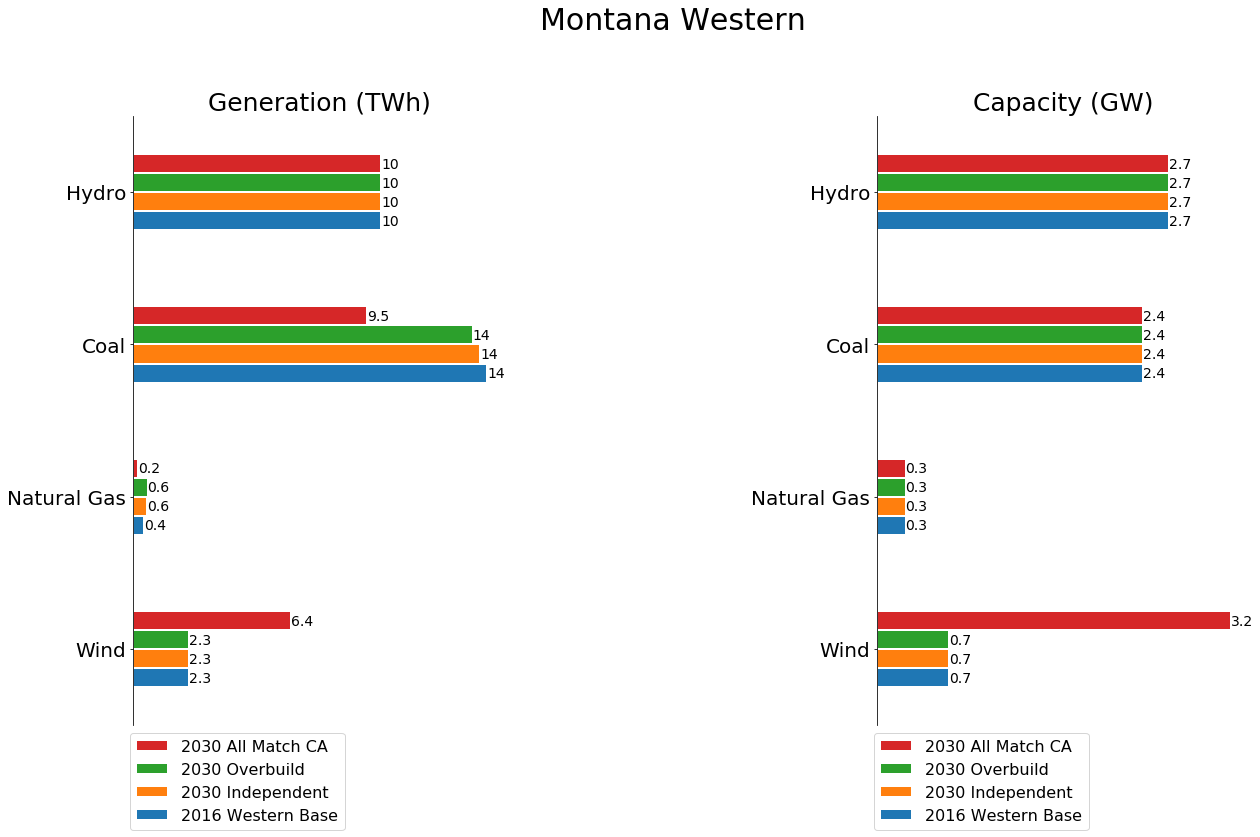

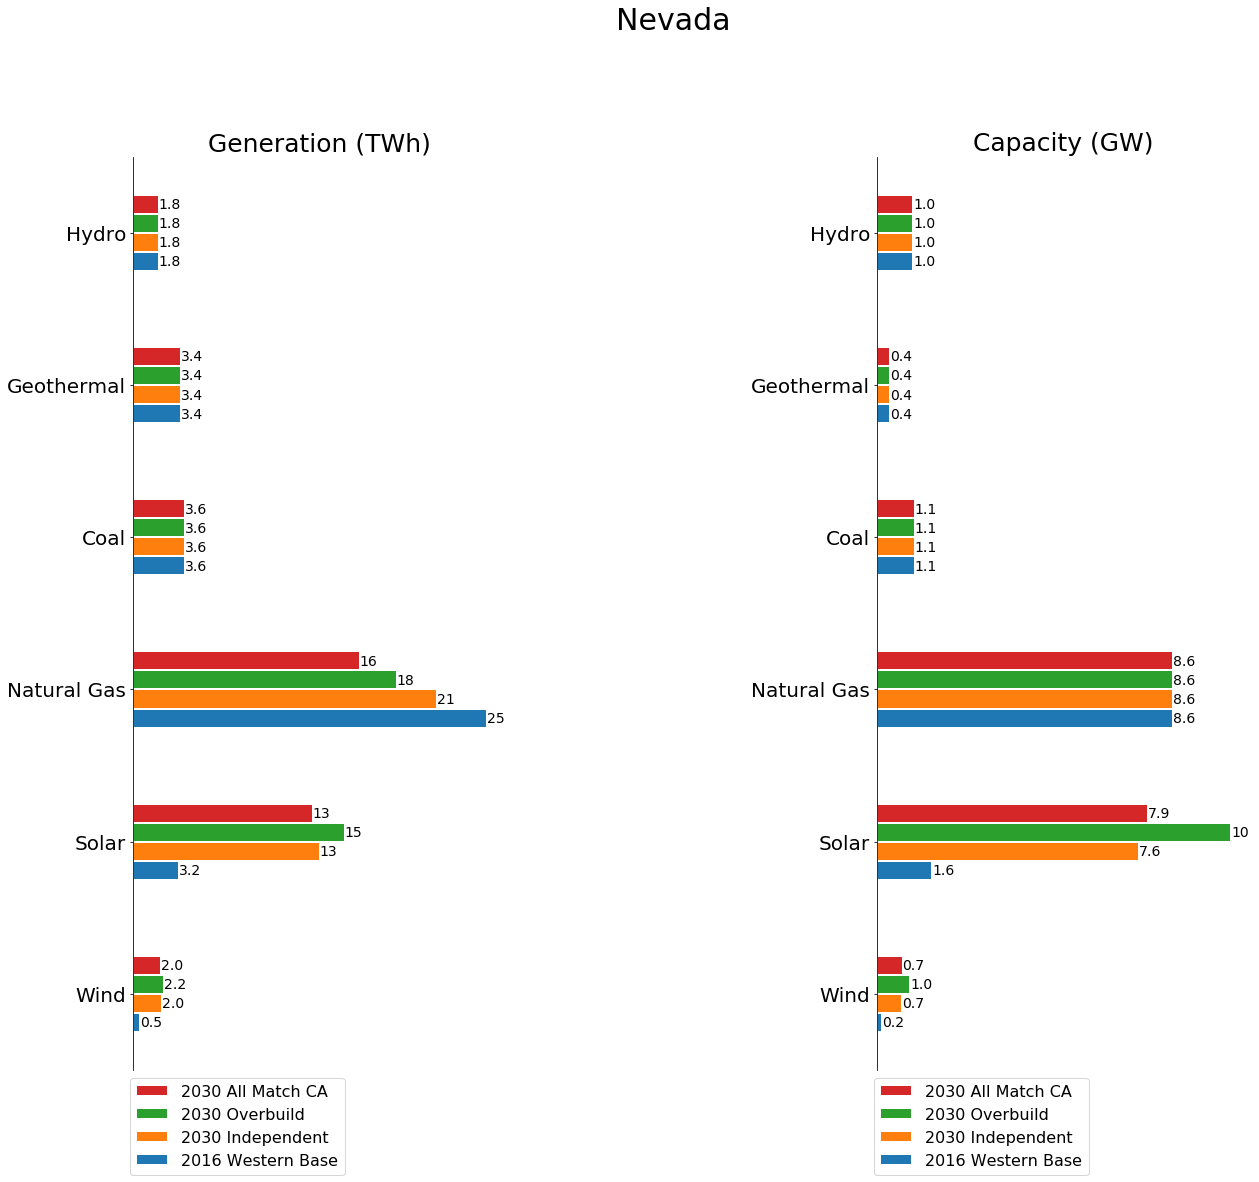

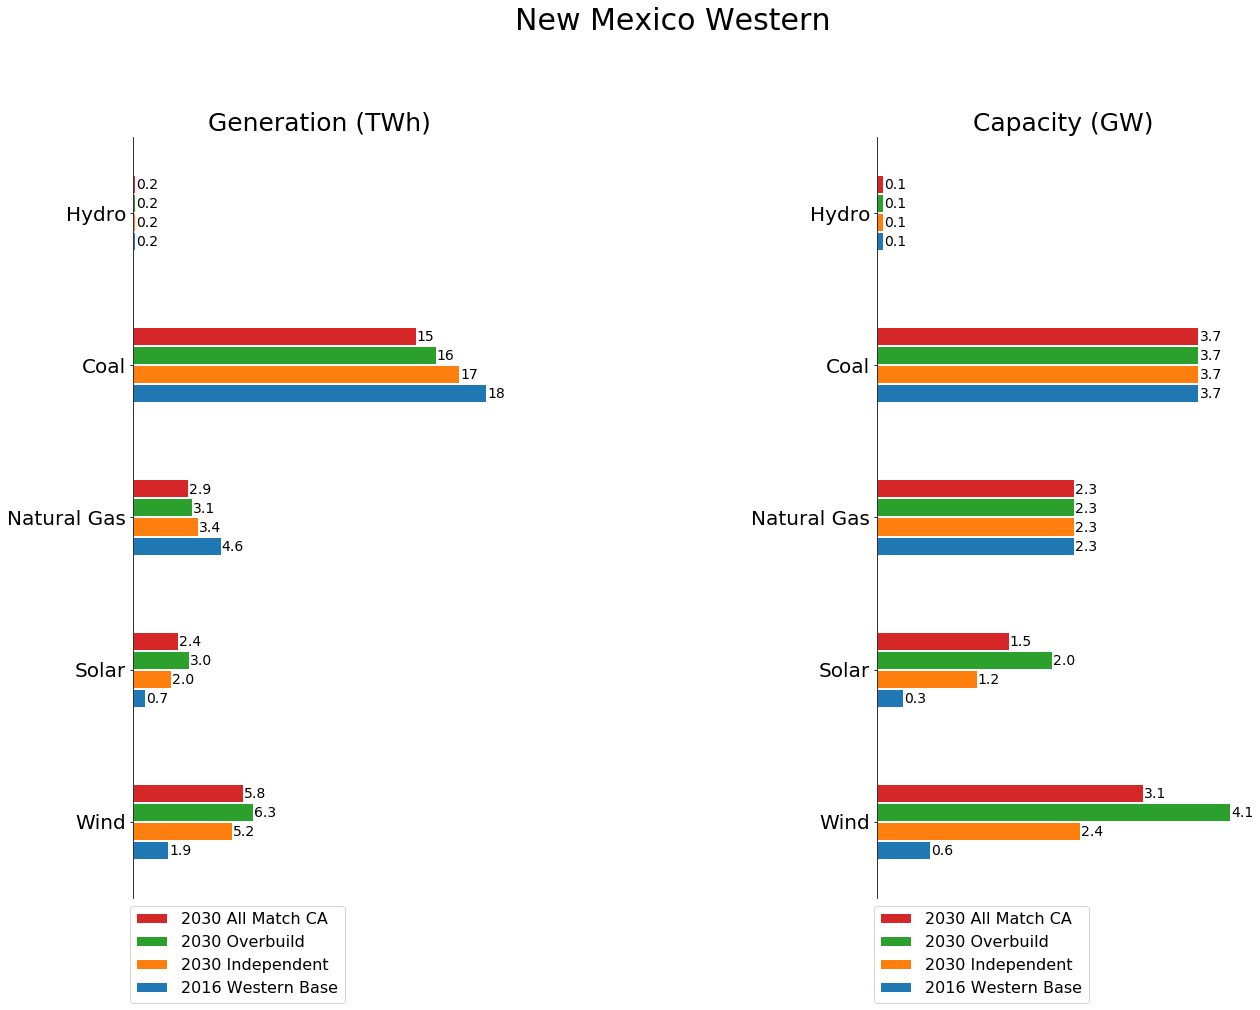

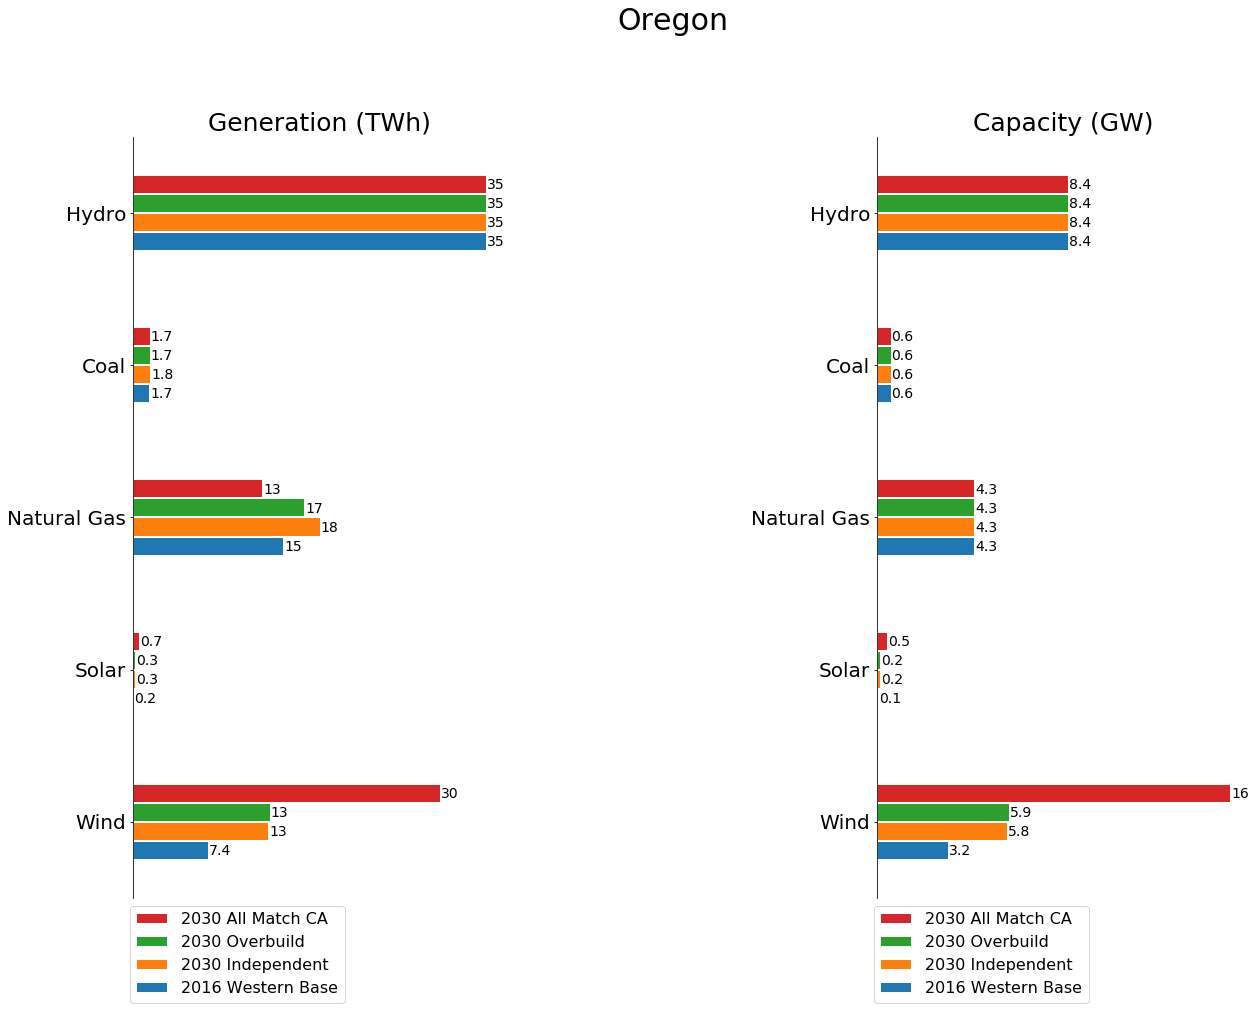

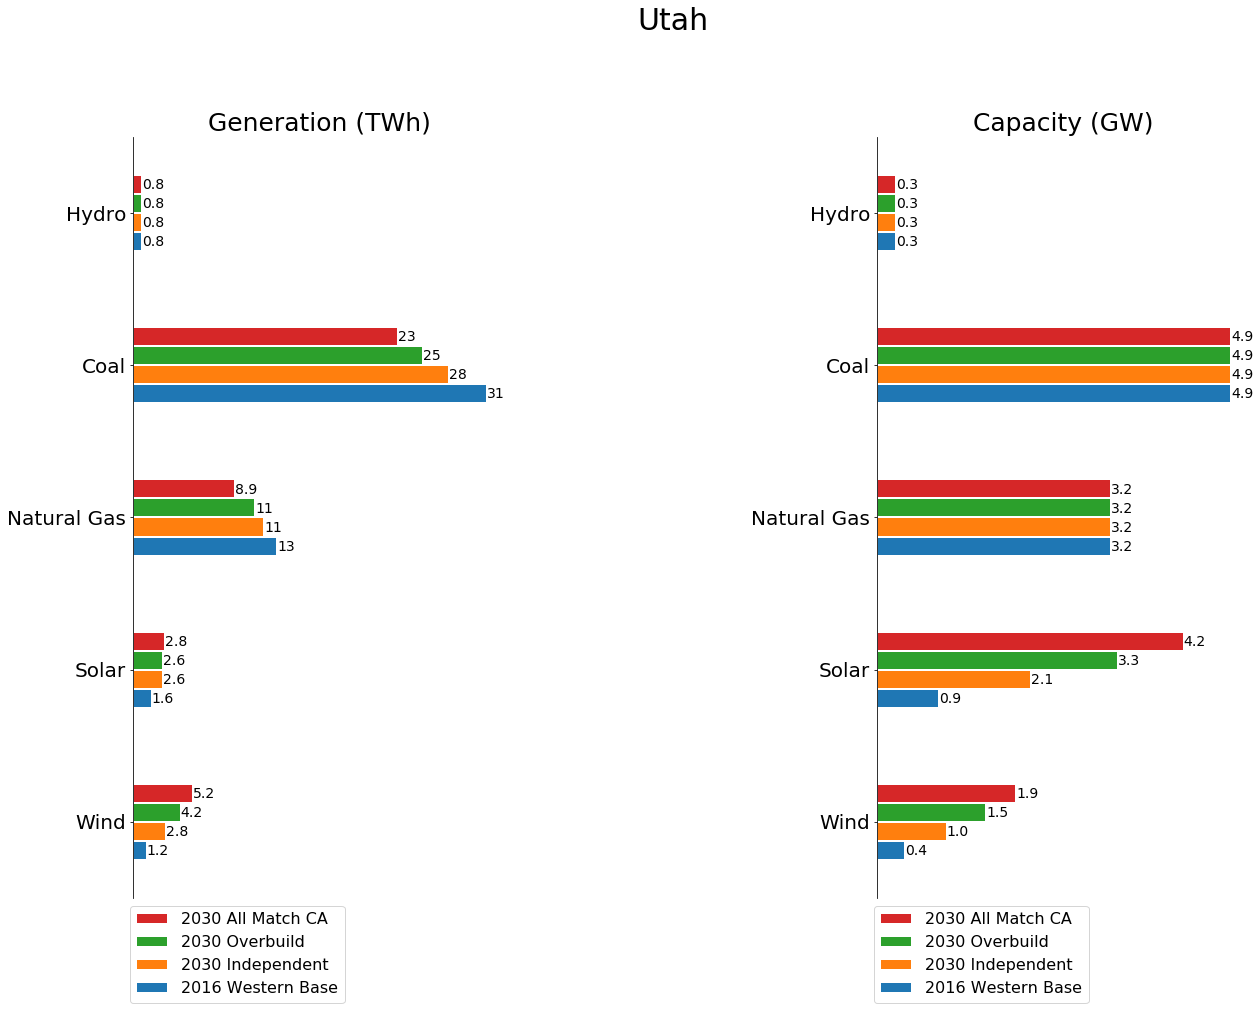

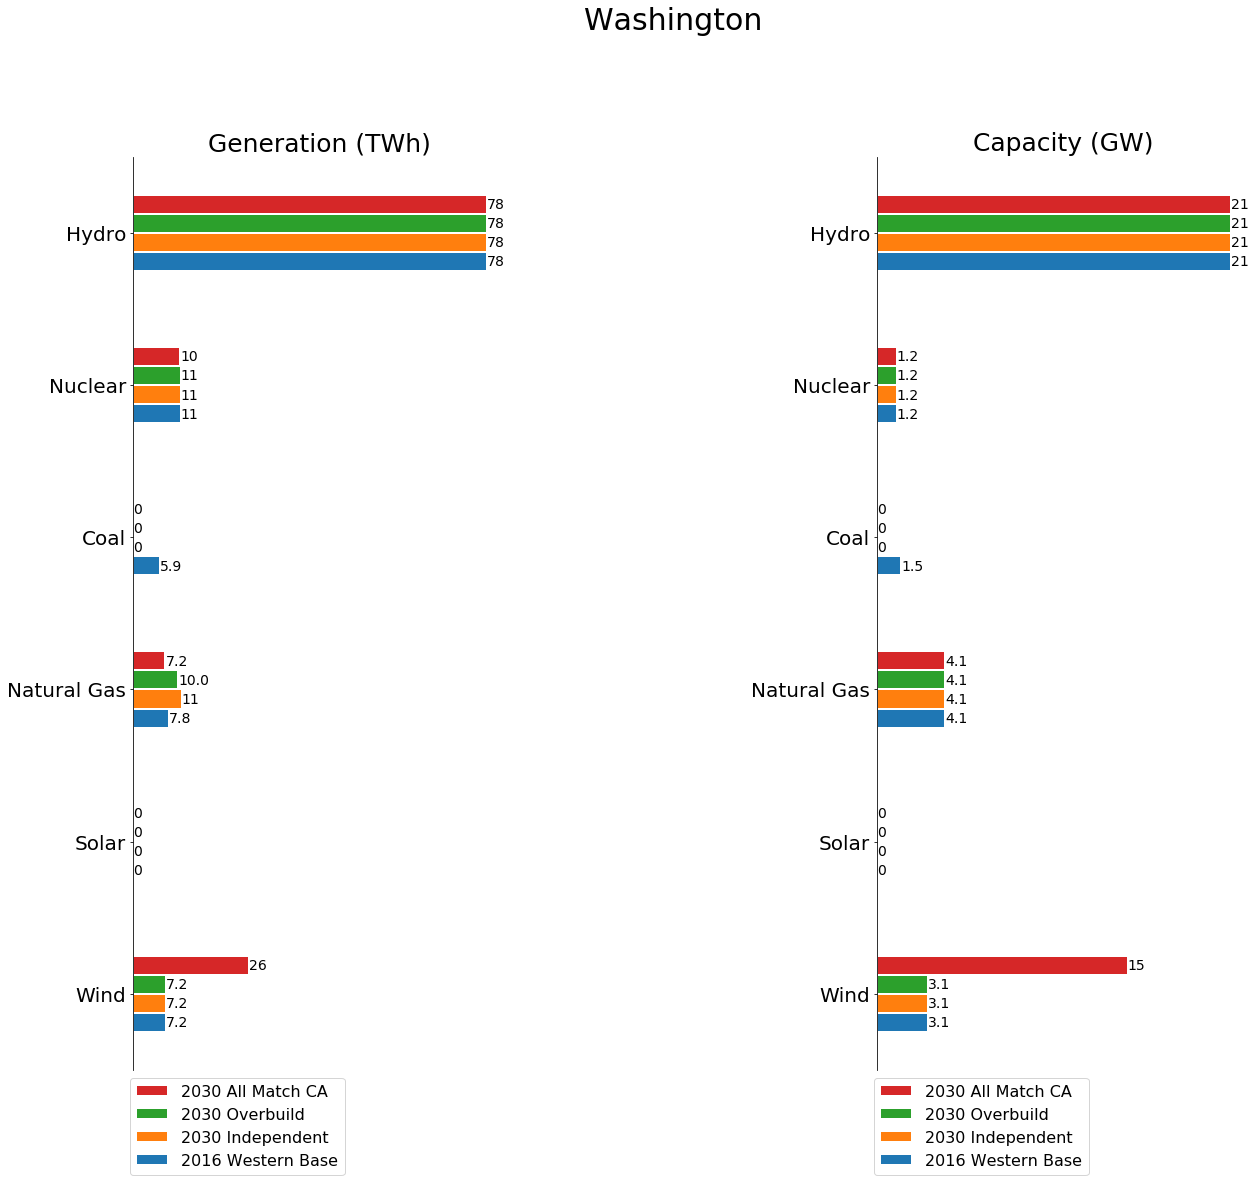

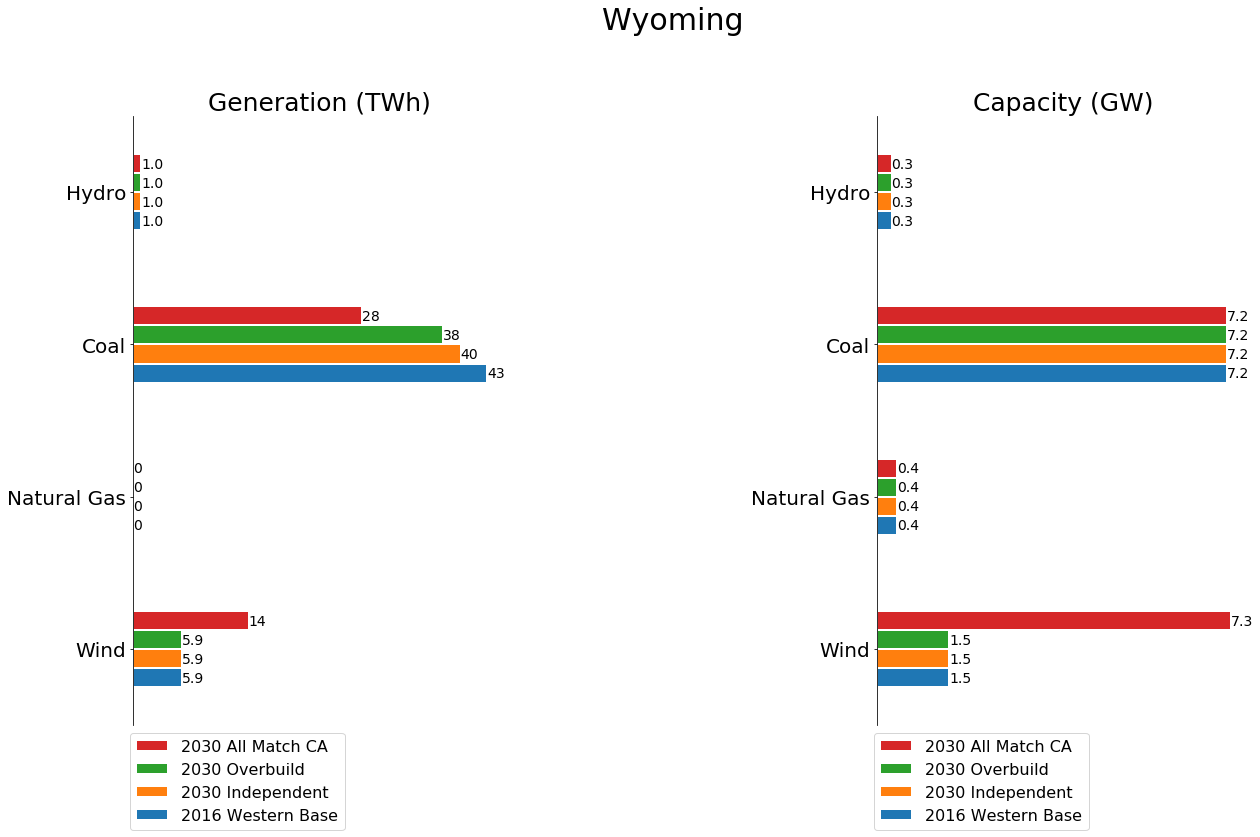

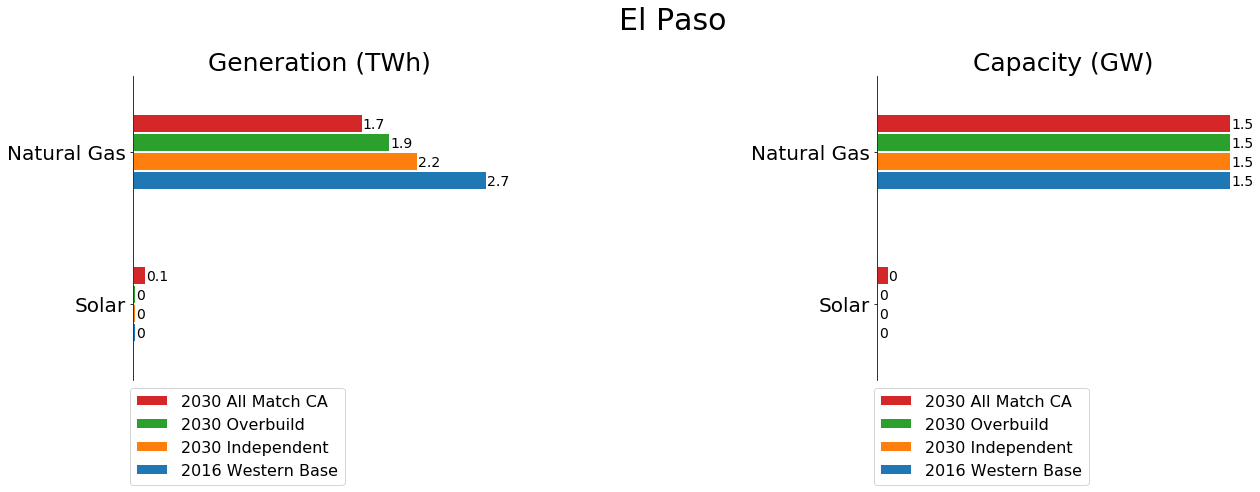

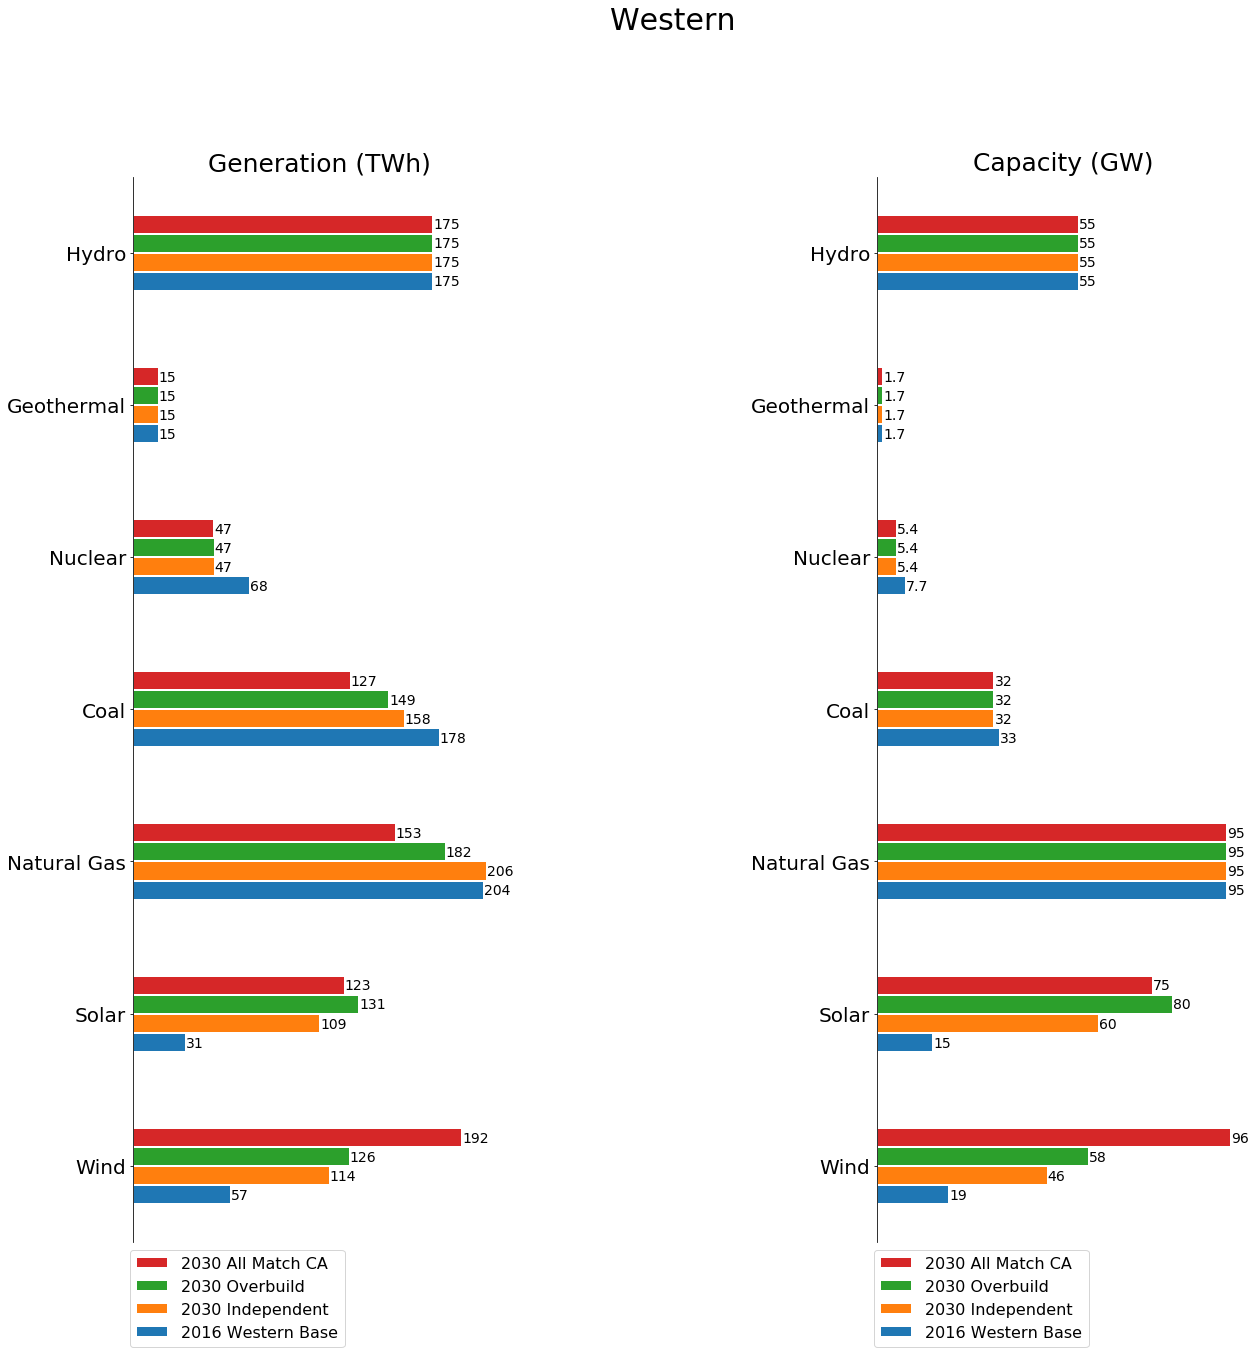

In [9]:
# Horizontal bar chart
f = io.StringIO()
with redirect_stdout(f):
    plot_hbar('Western',
              time,
              ['87', '91', '103', '89'],
              ['2016 Western Base', '2030 Independent', '2030 Overbuild', '2030 All Match CA'])

# Pie plot

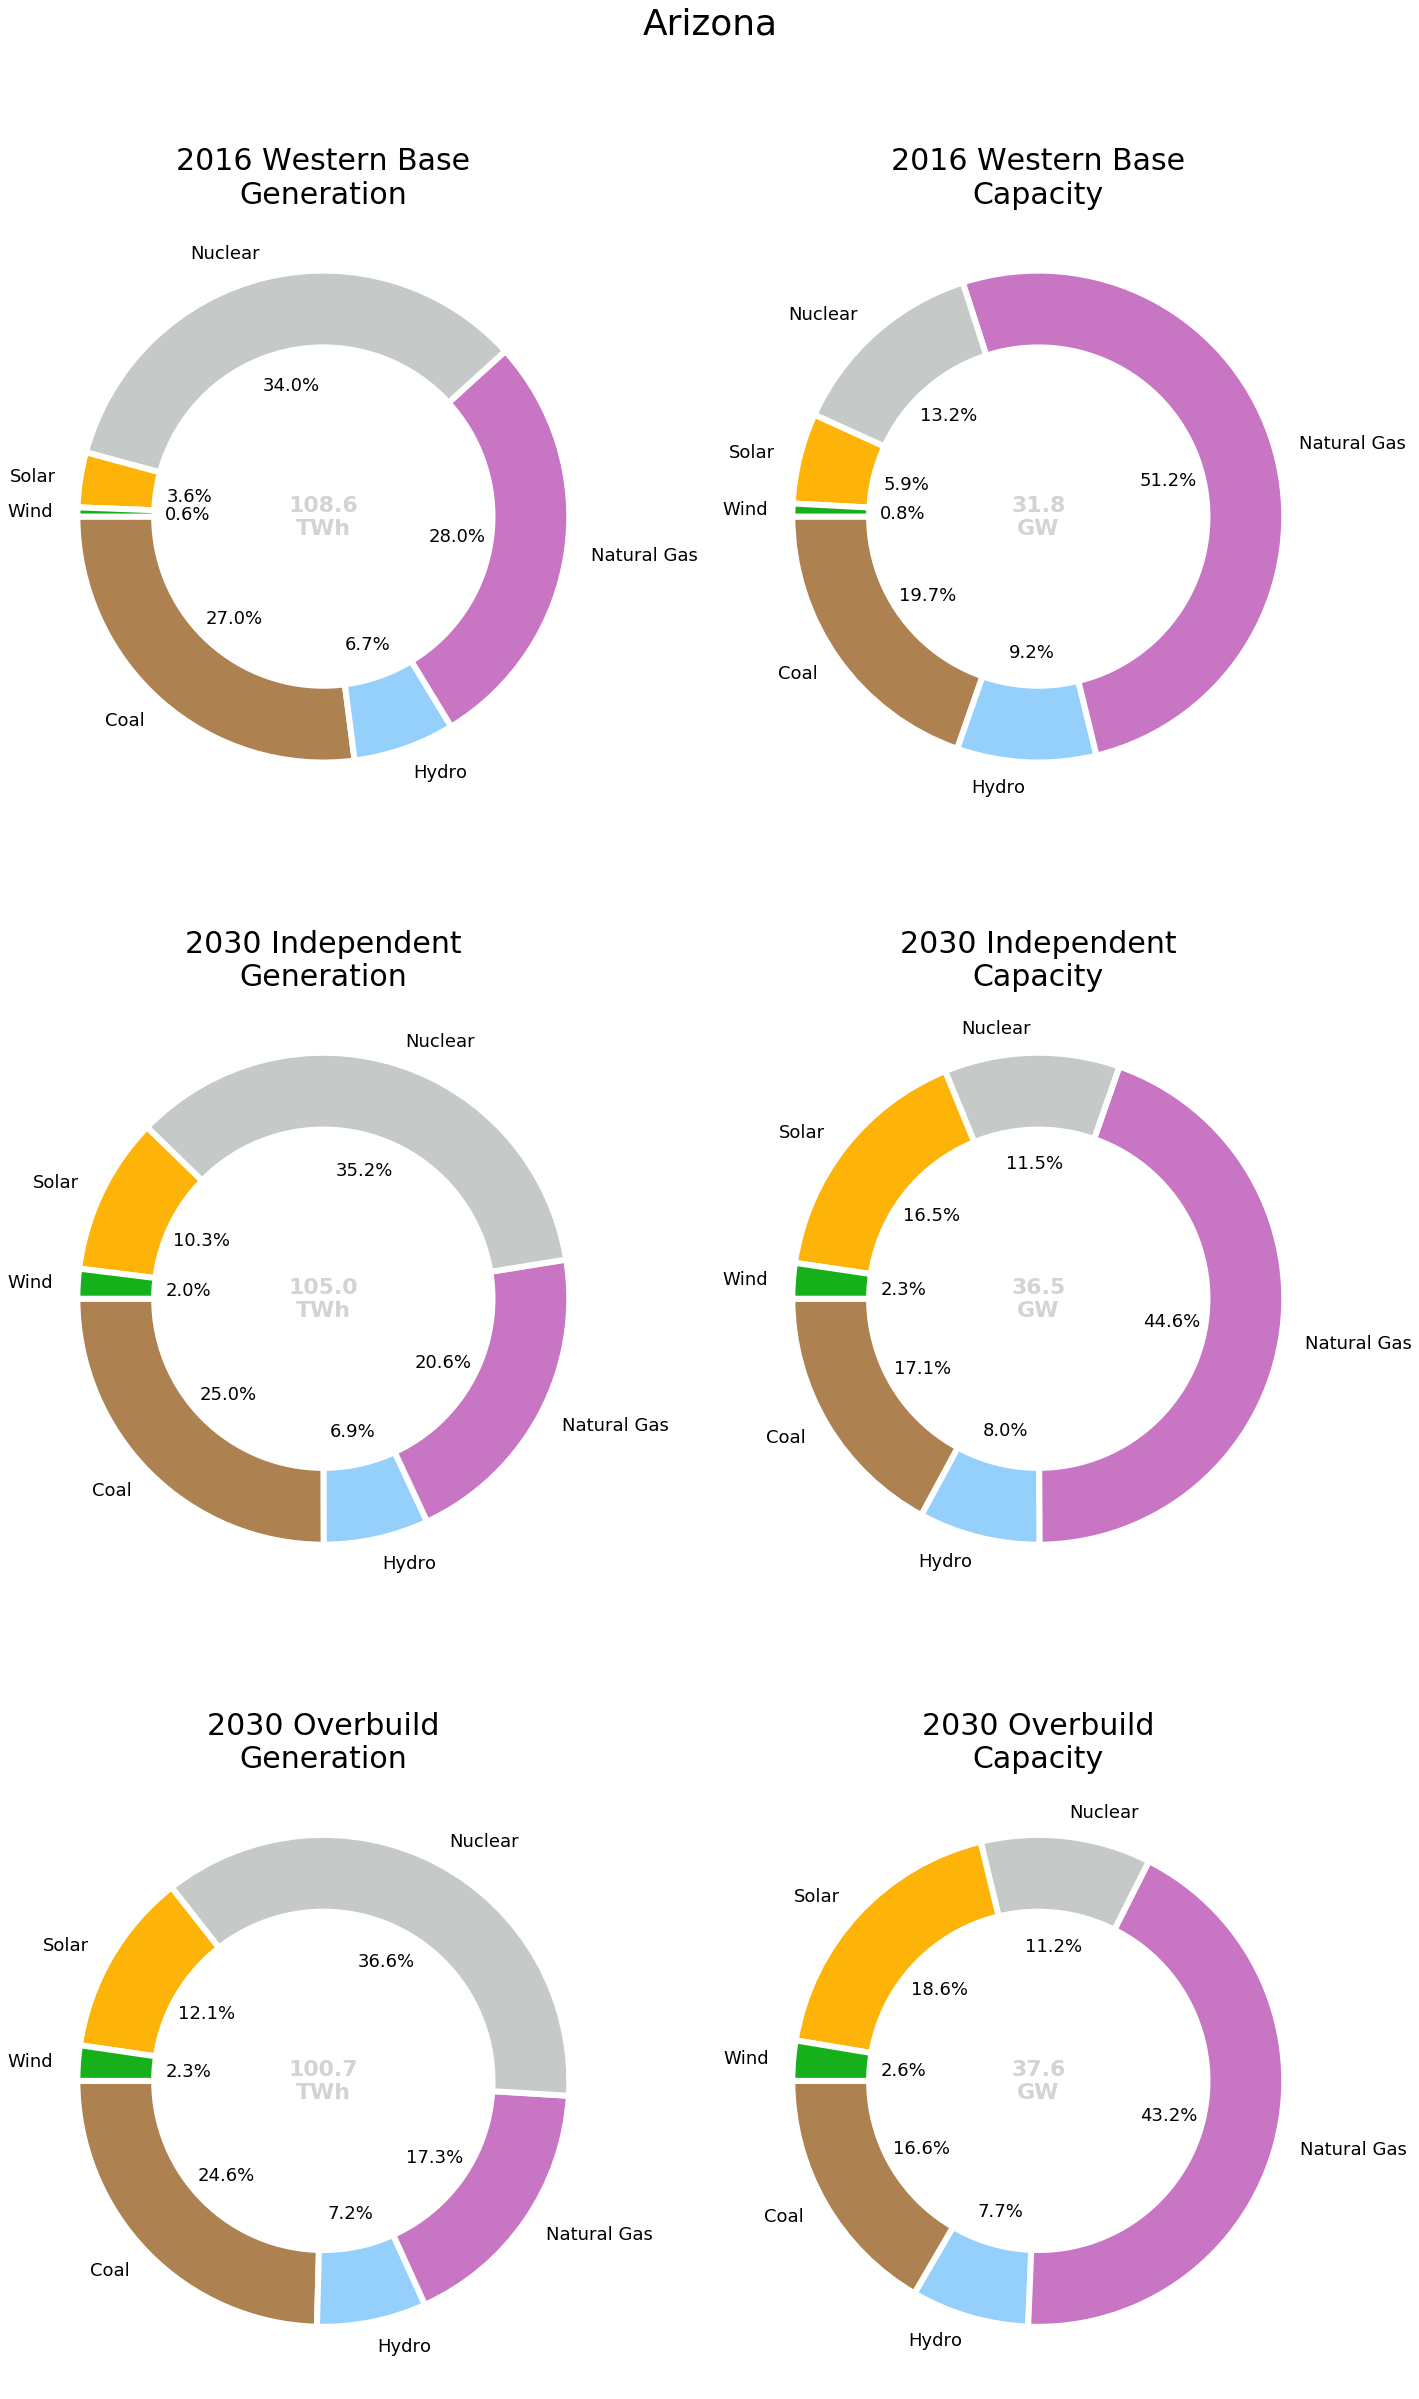

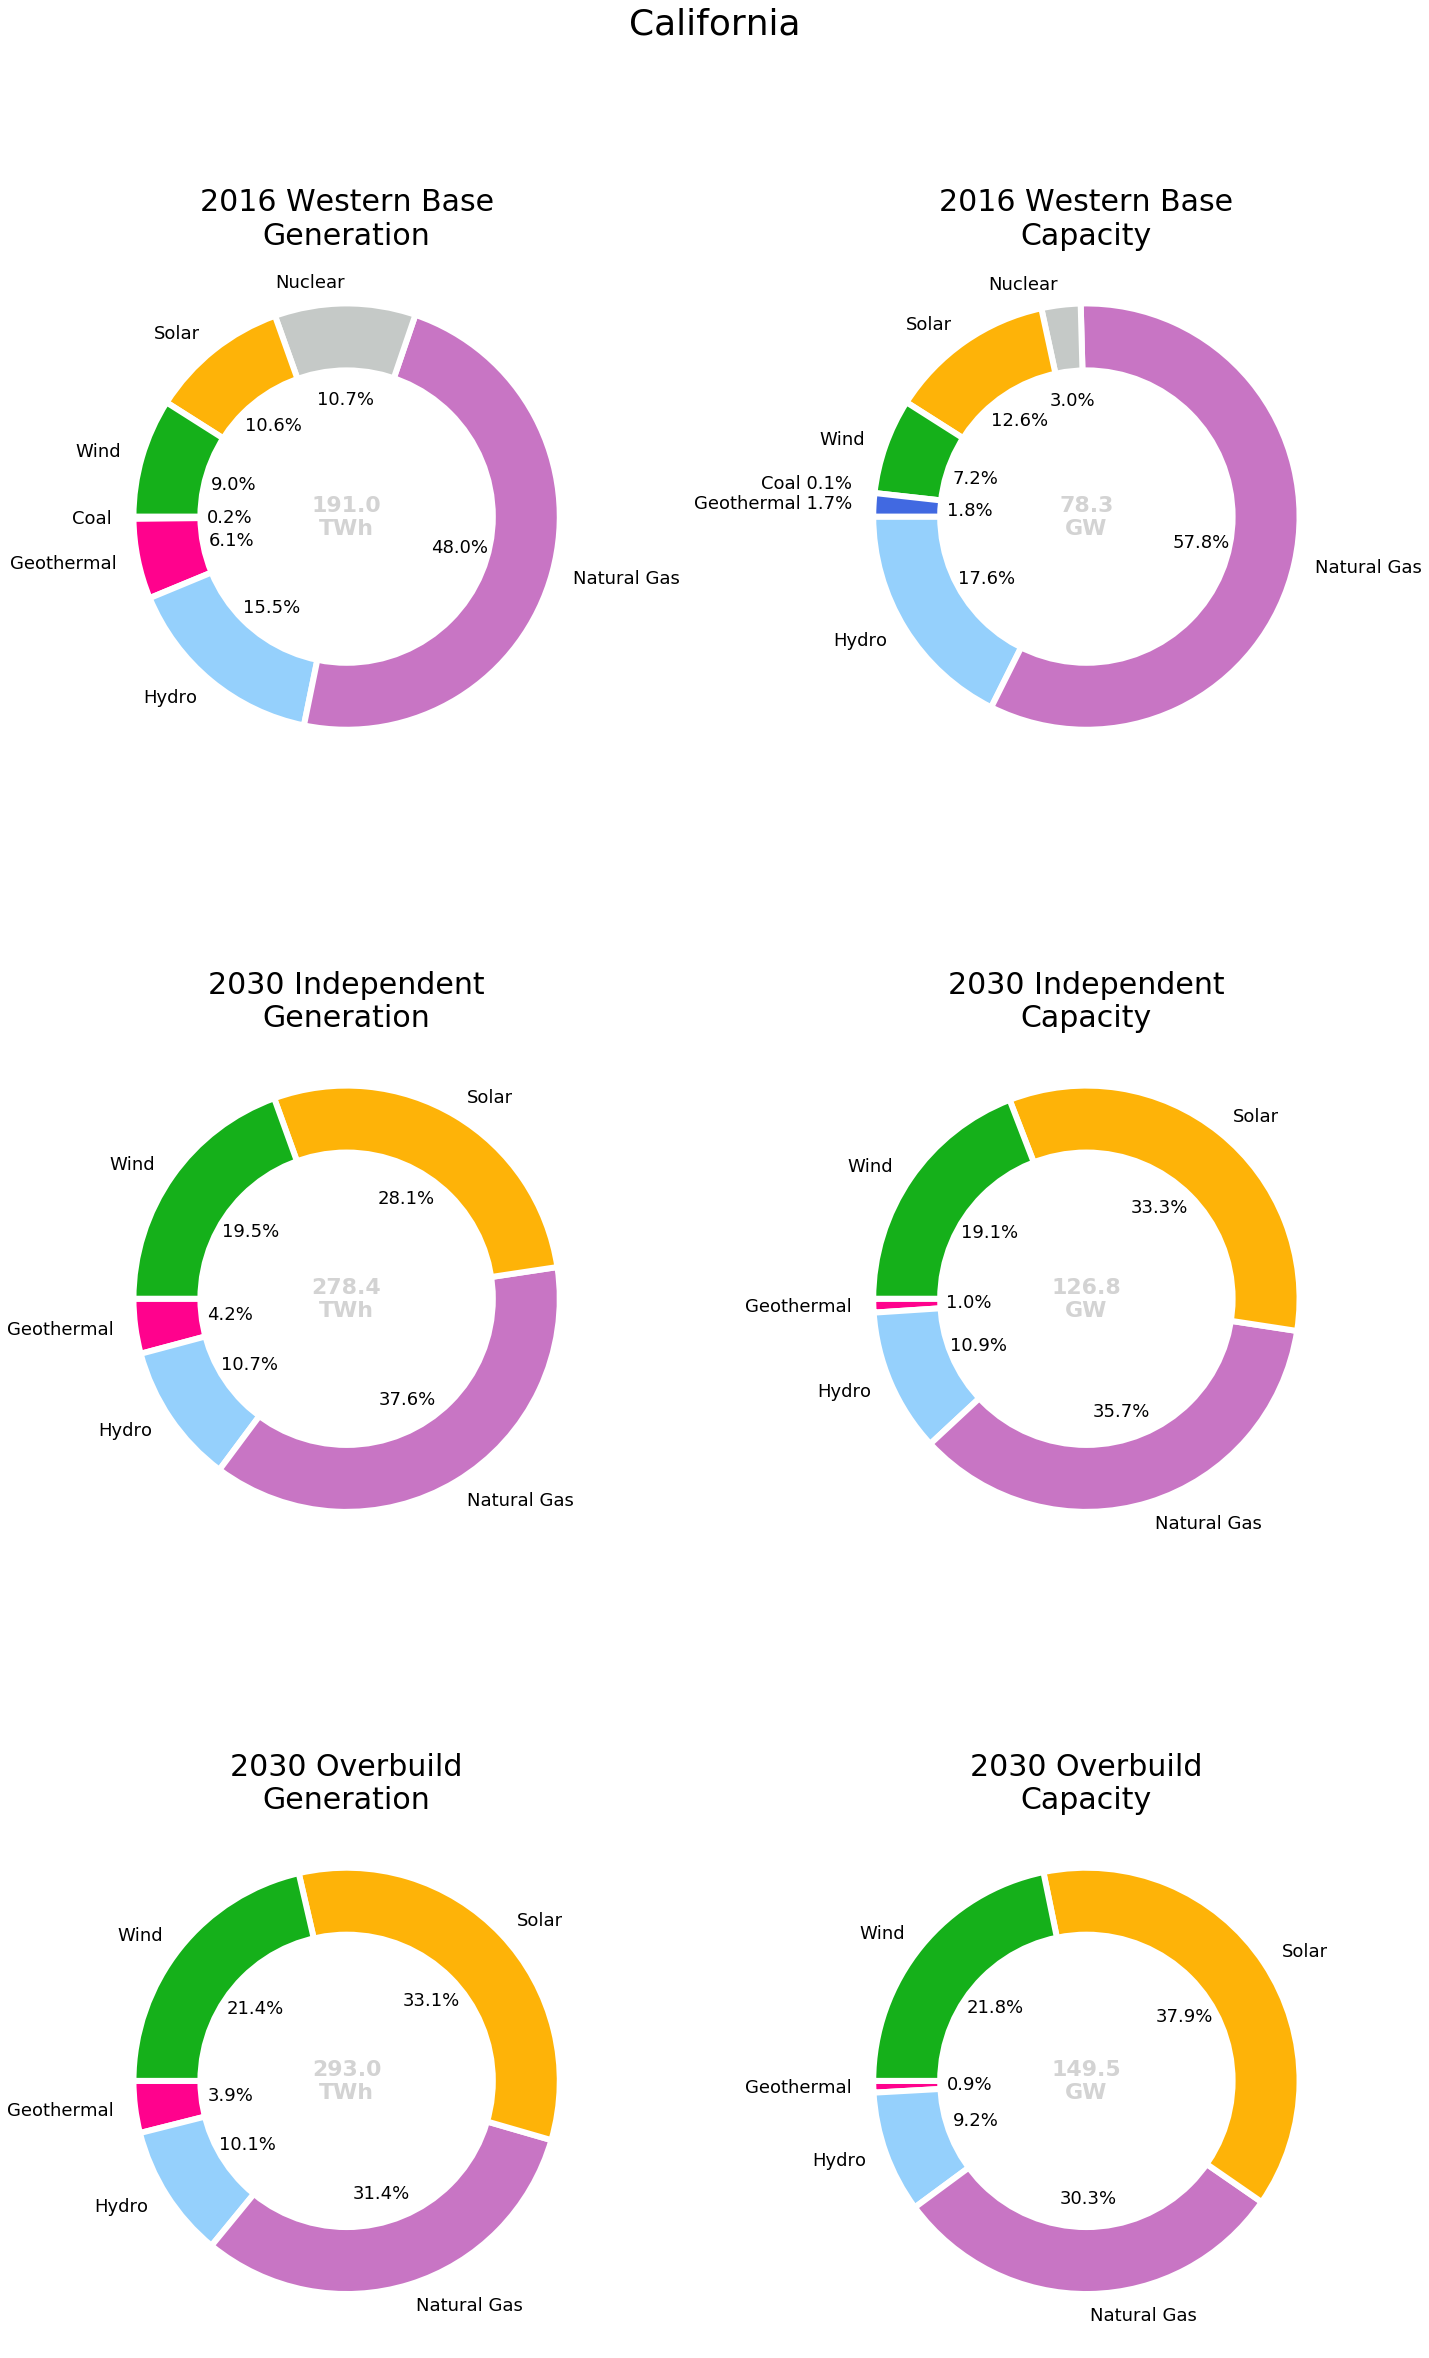

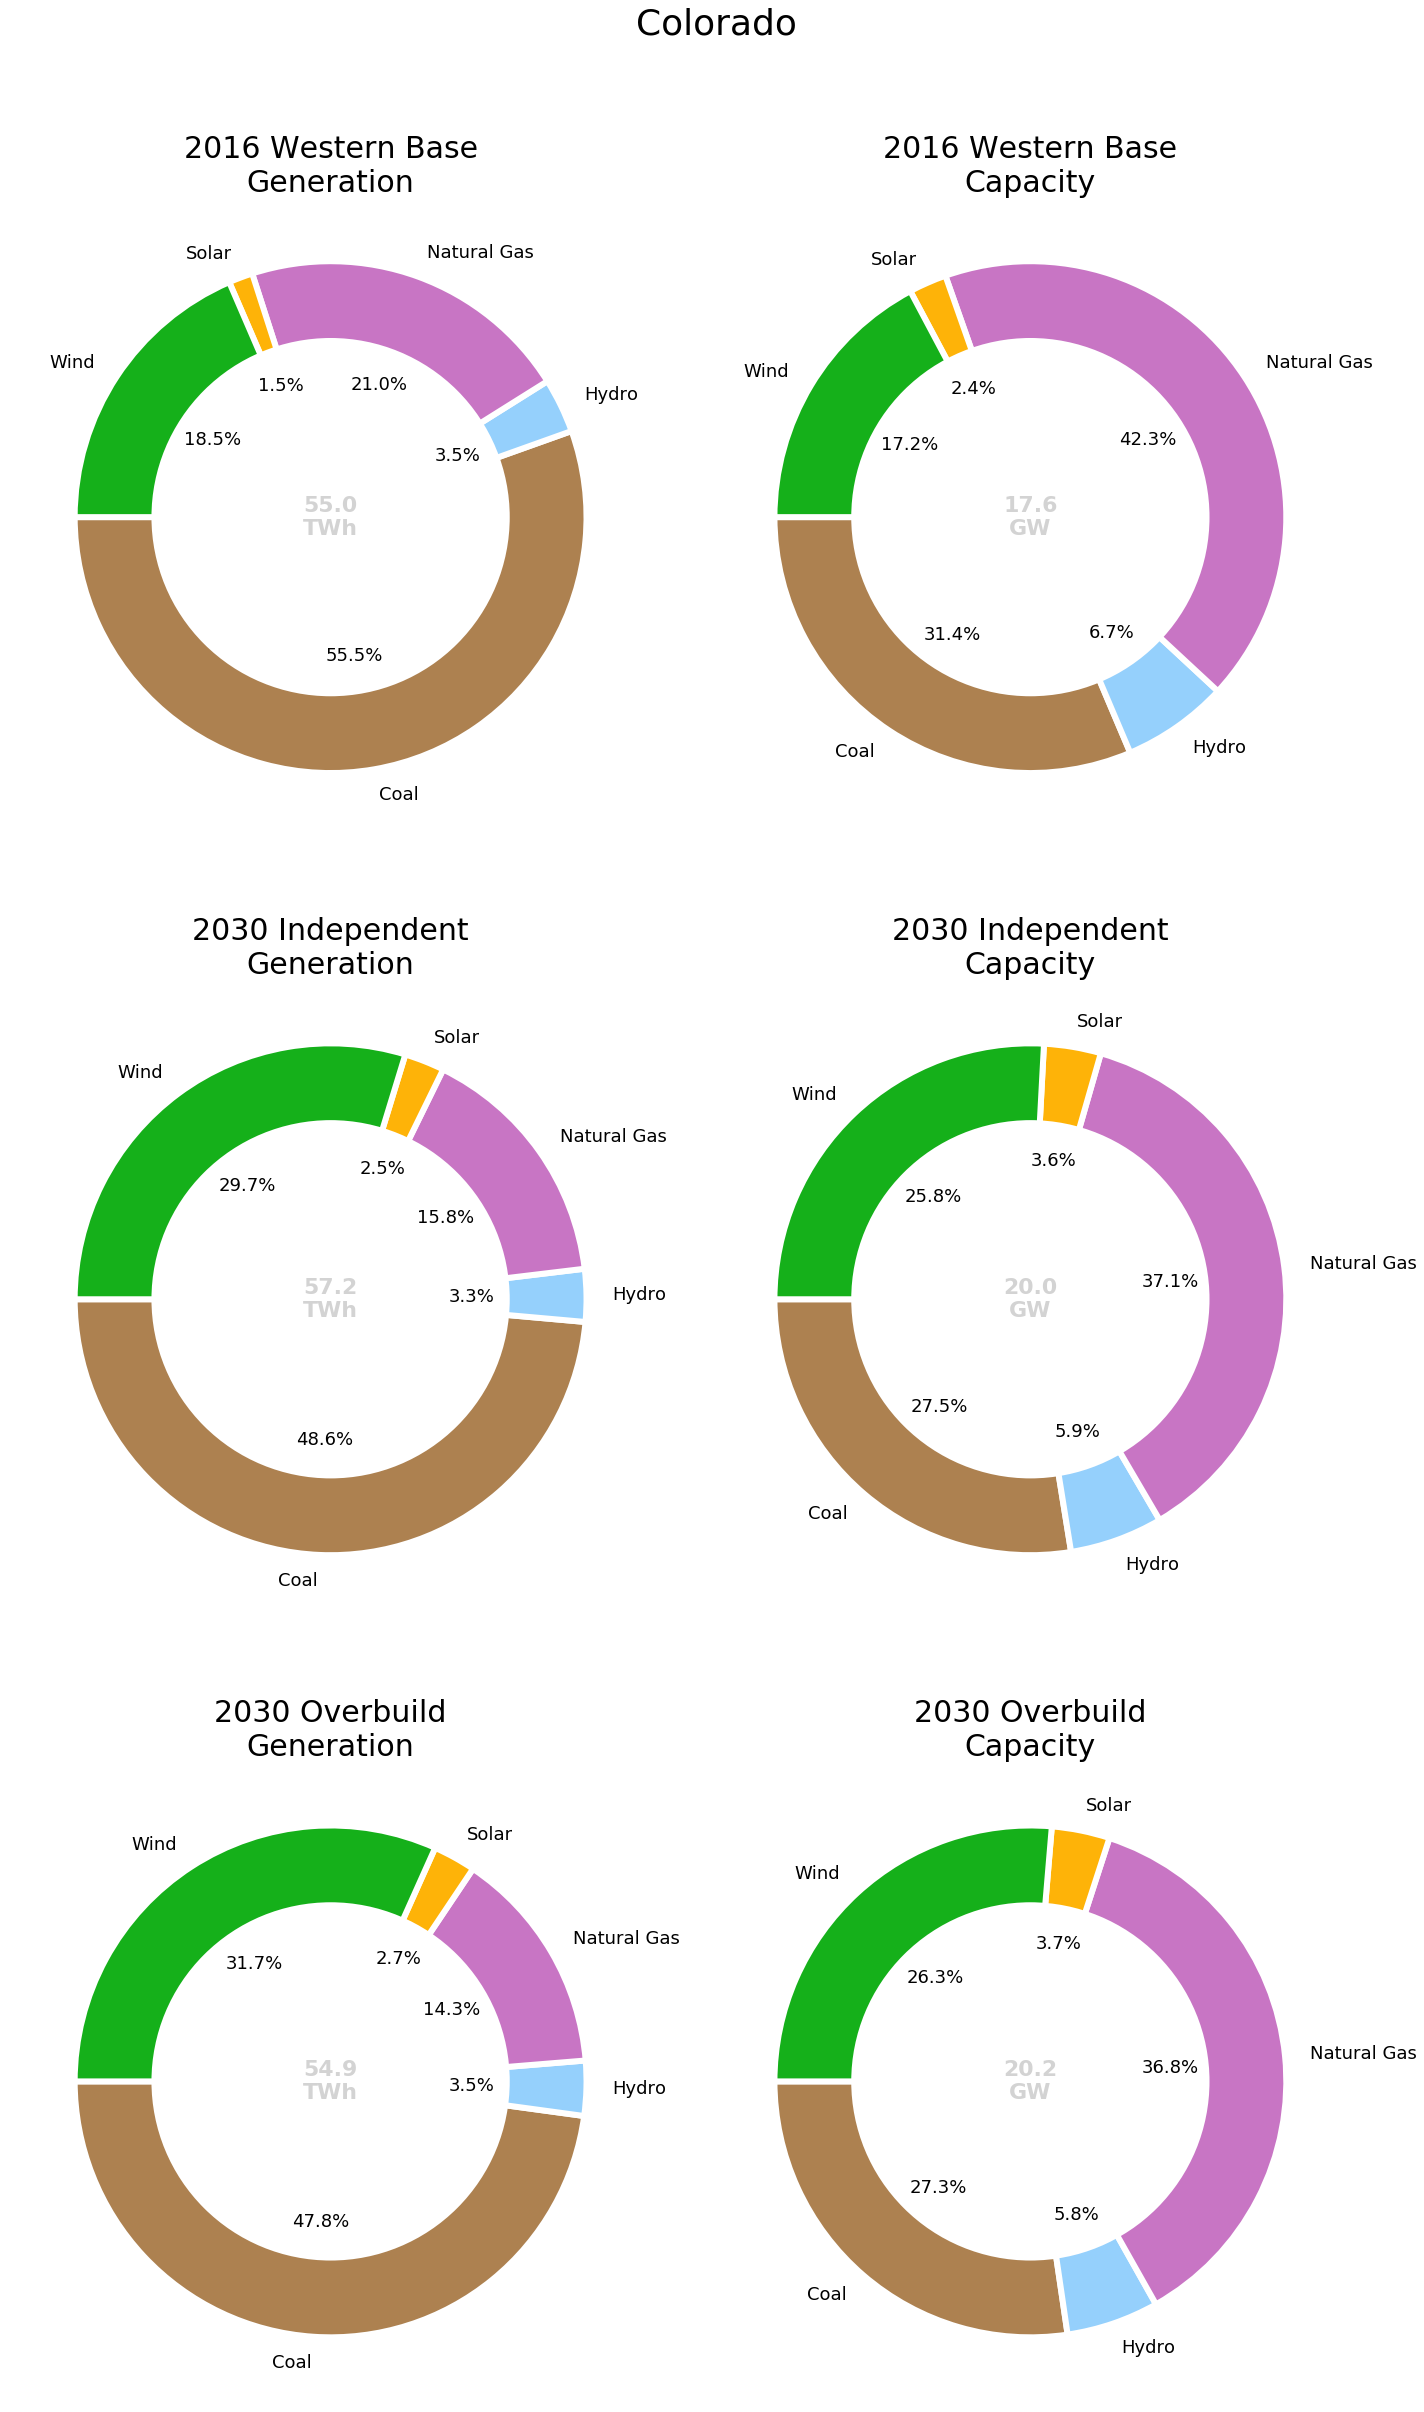

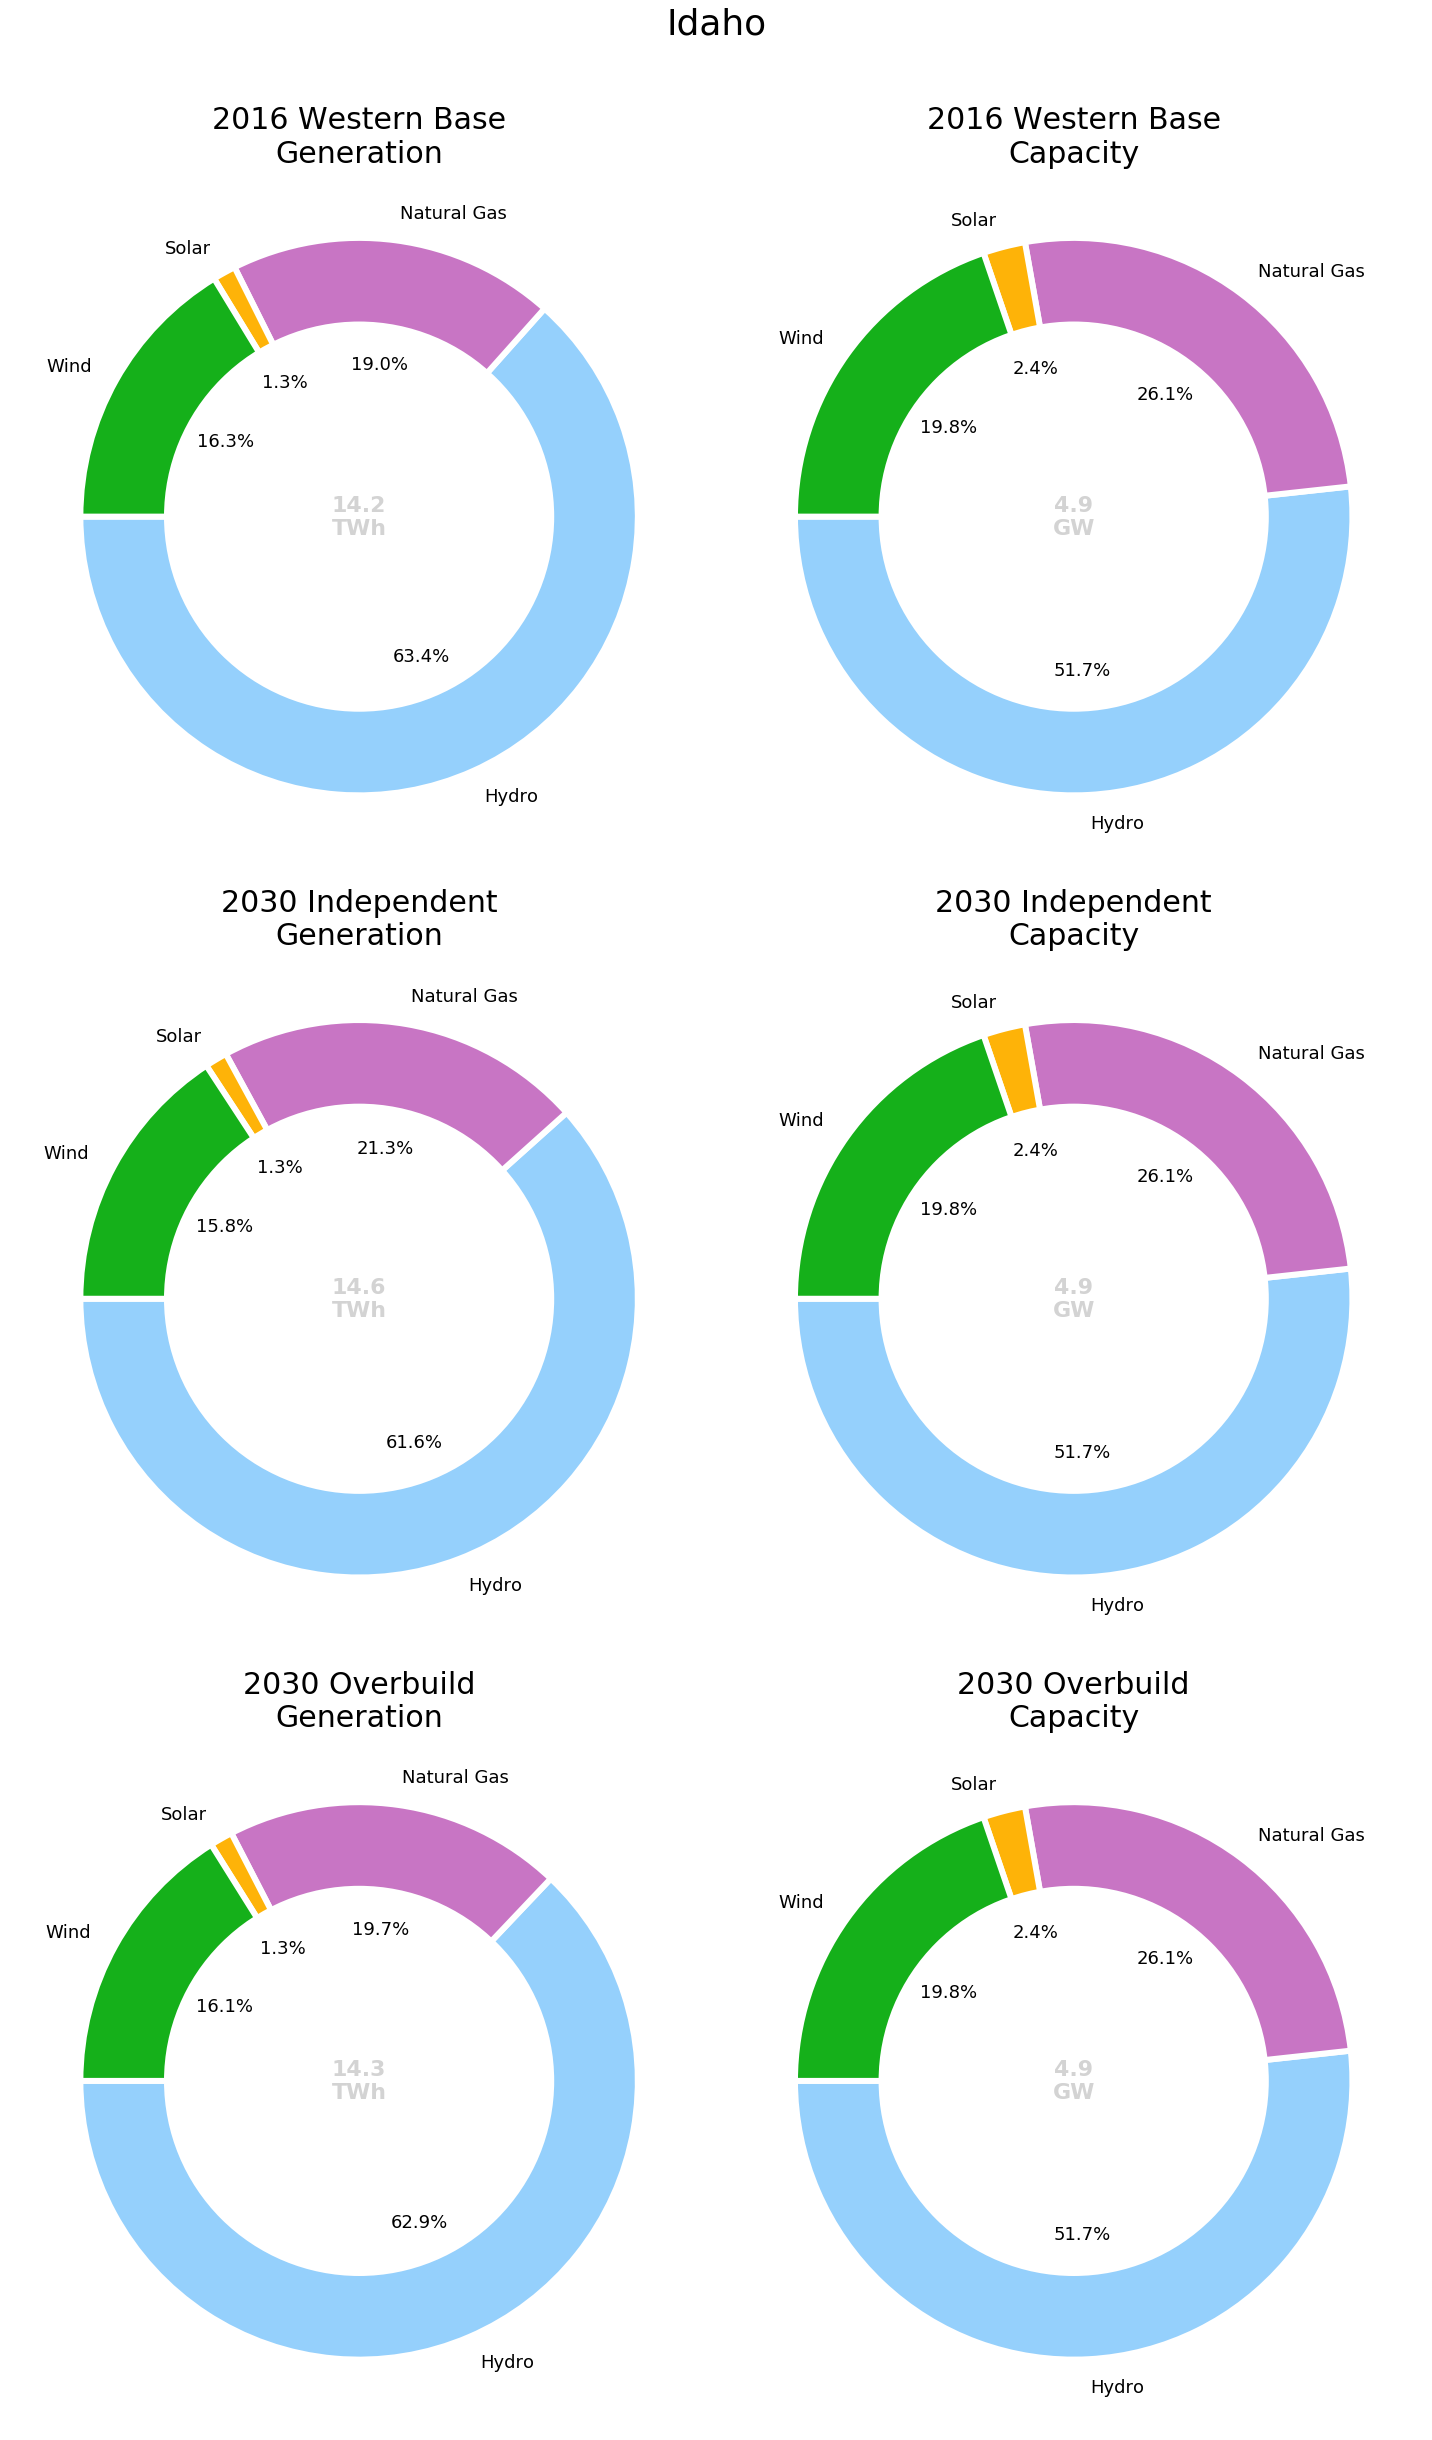

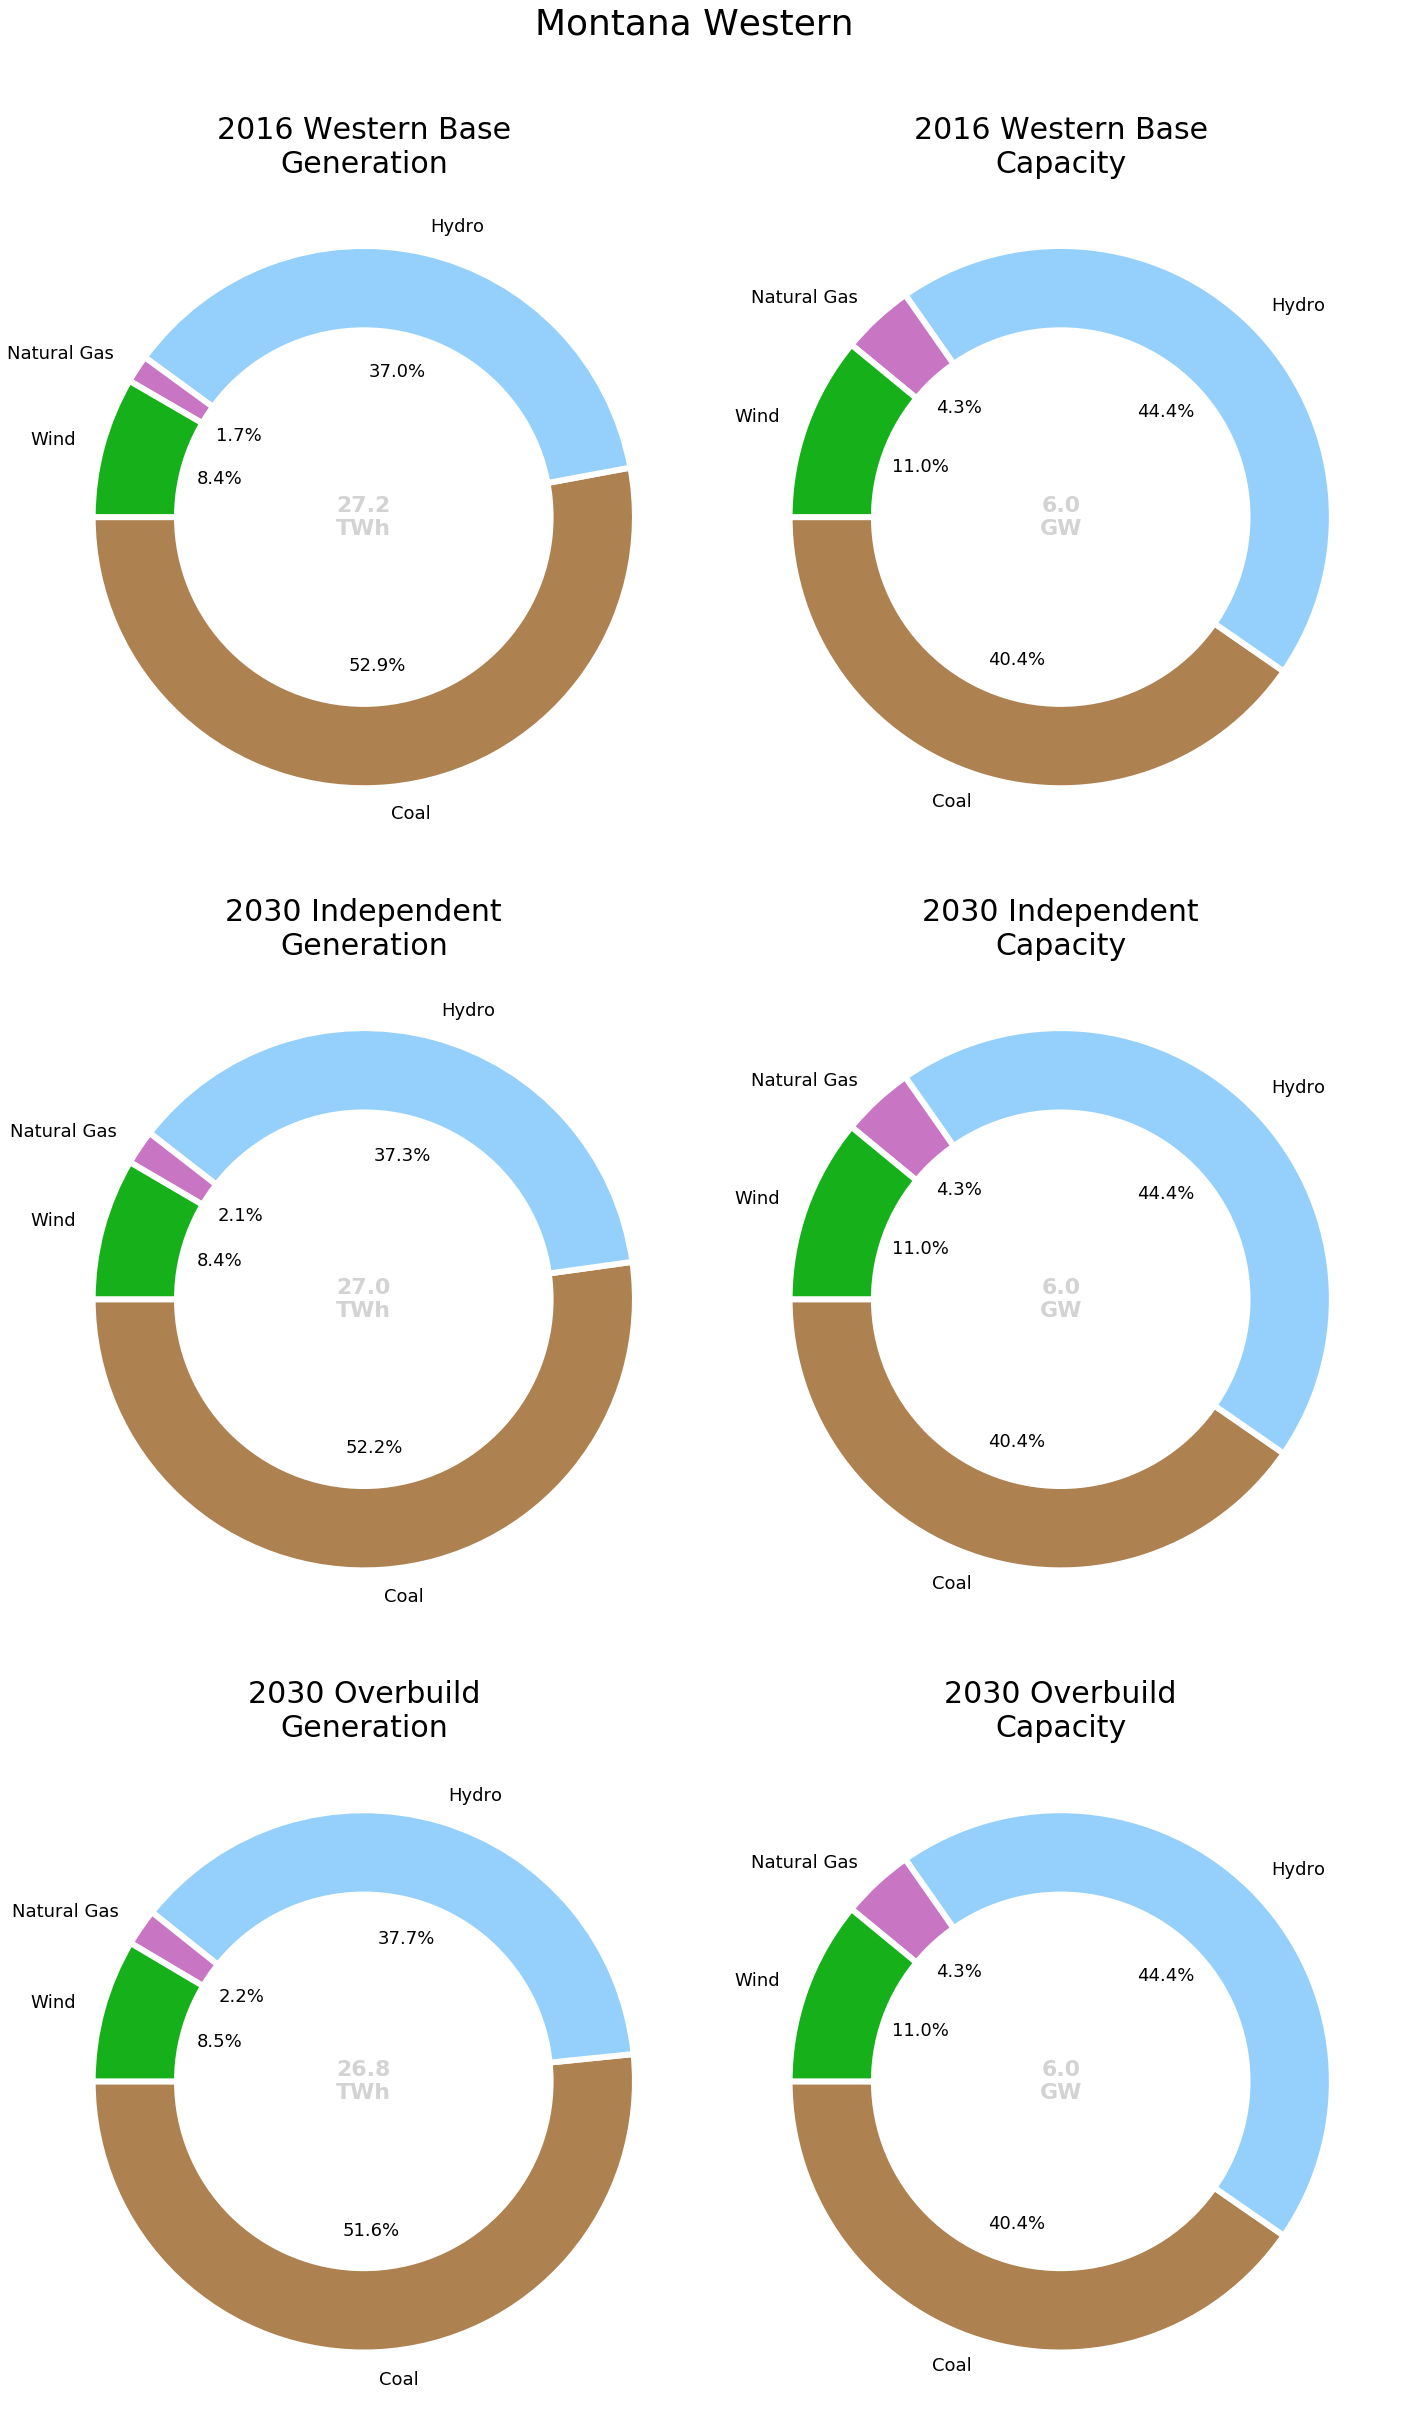

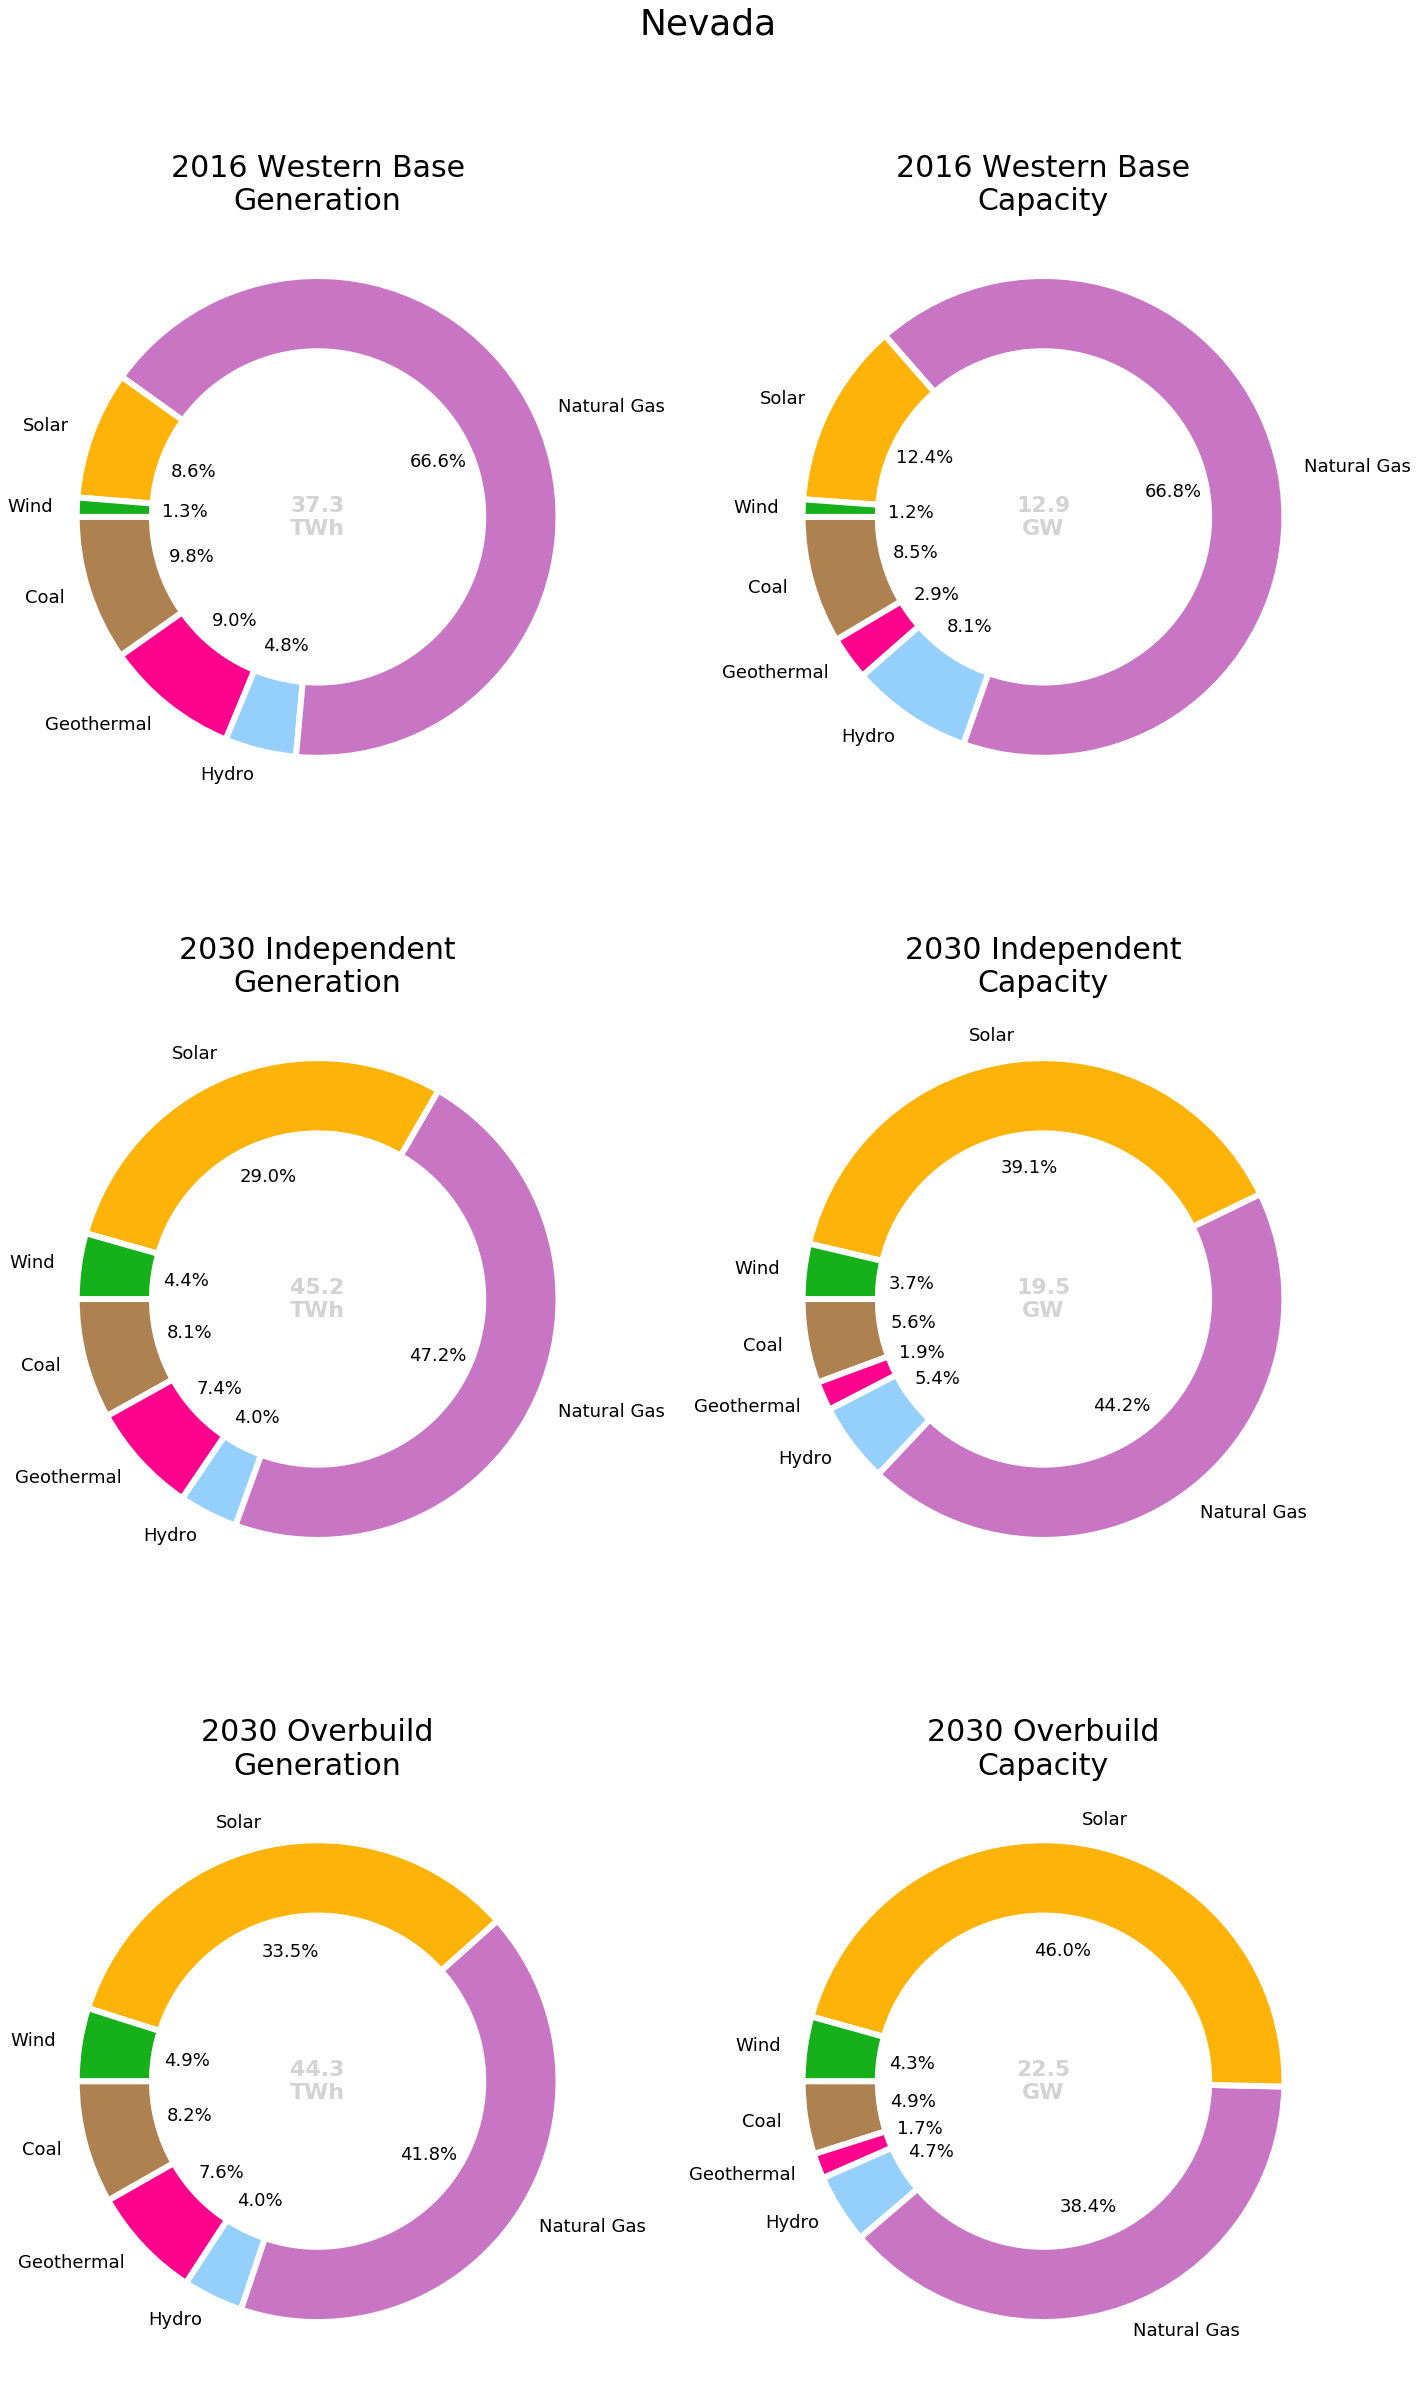

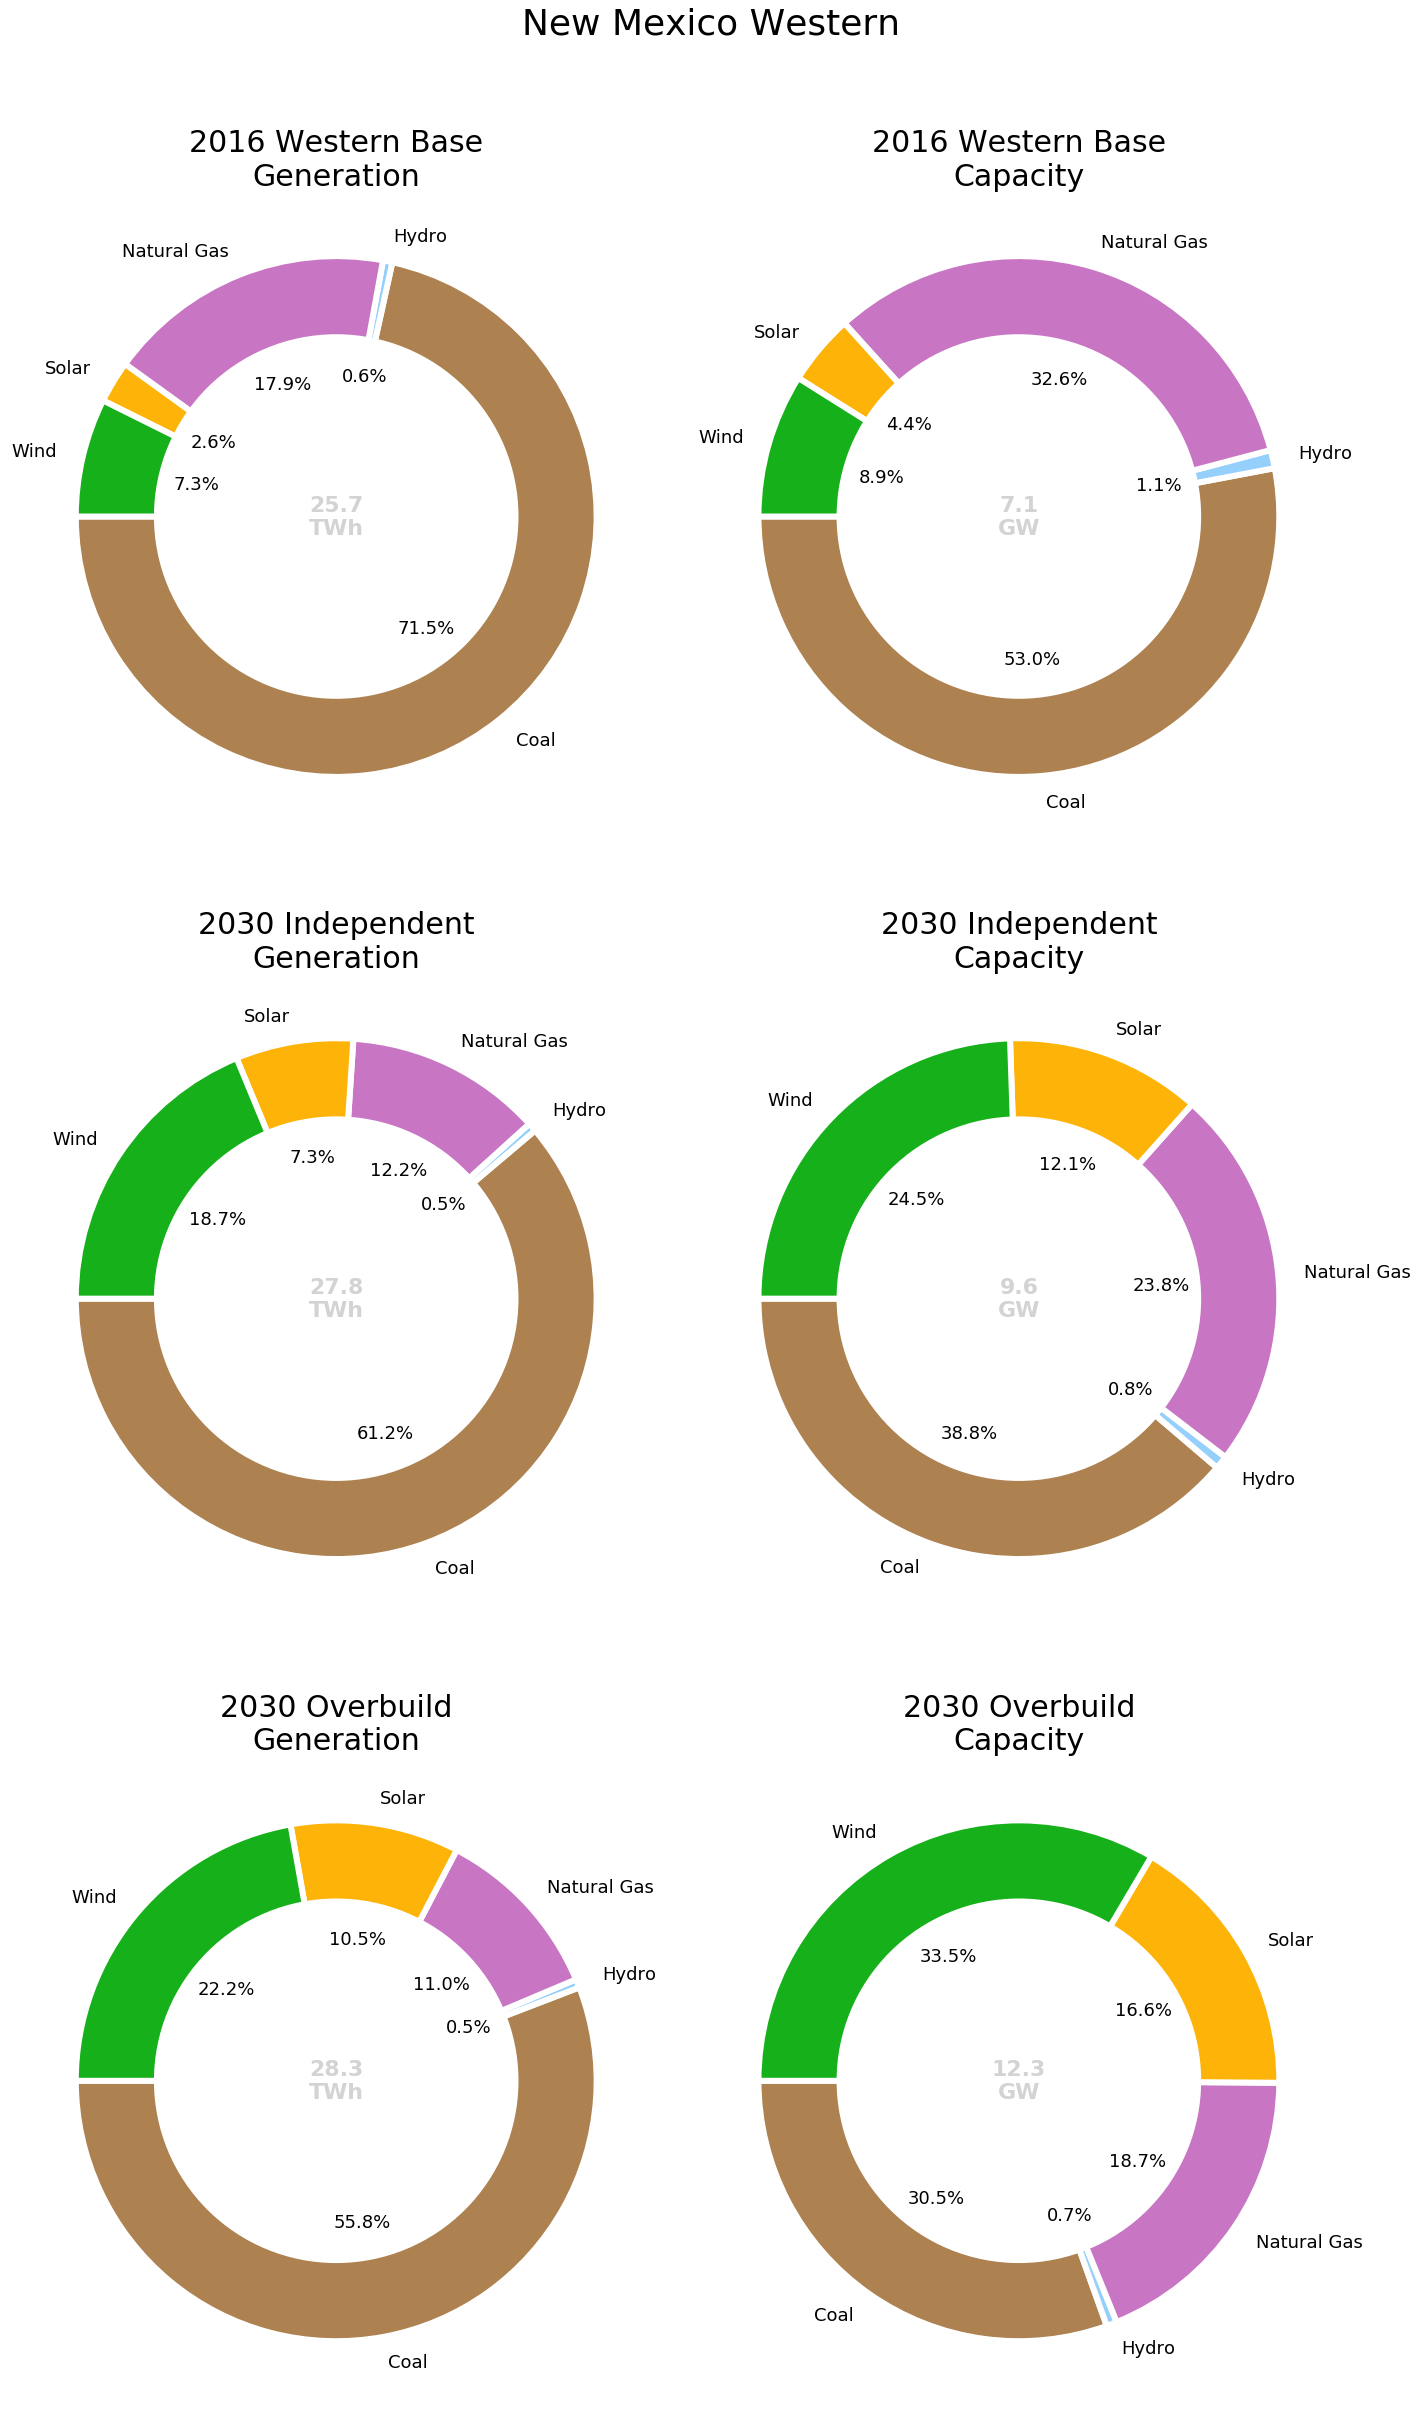

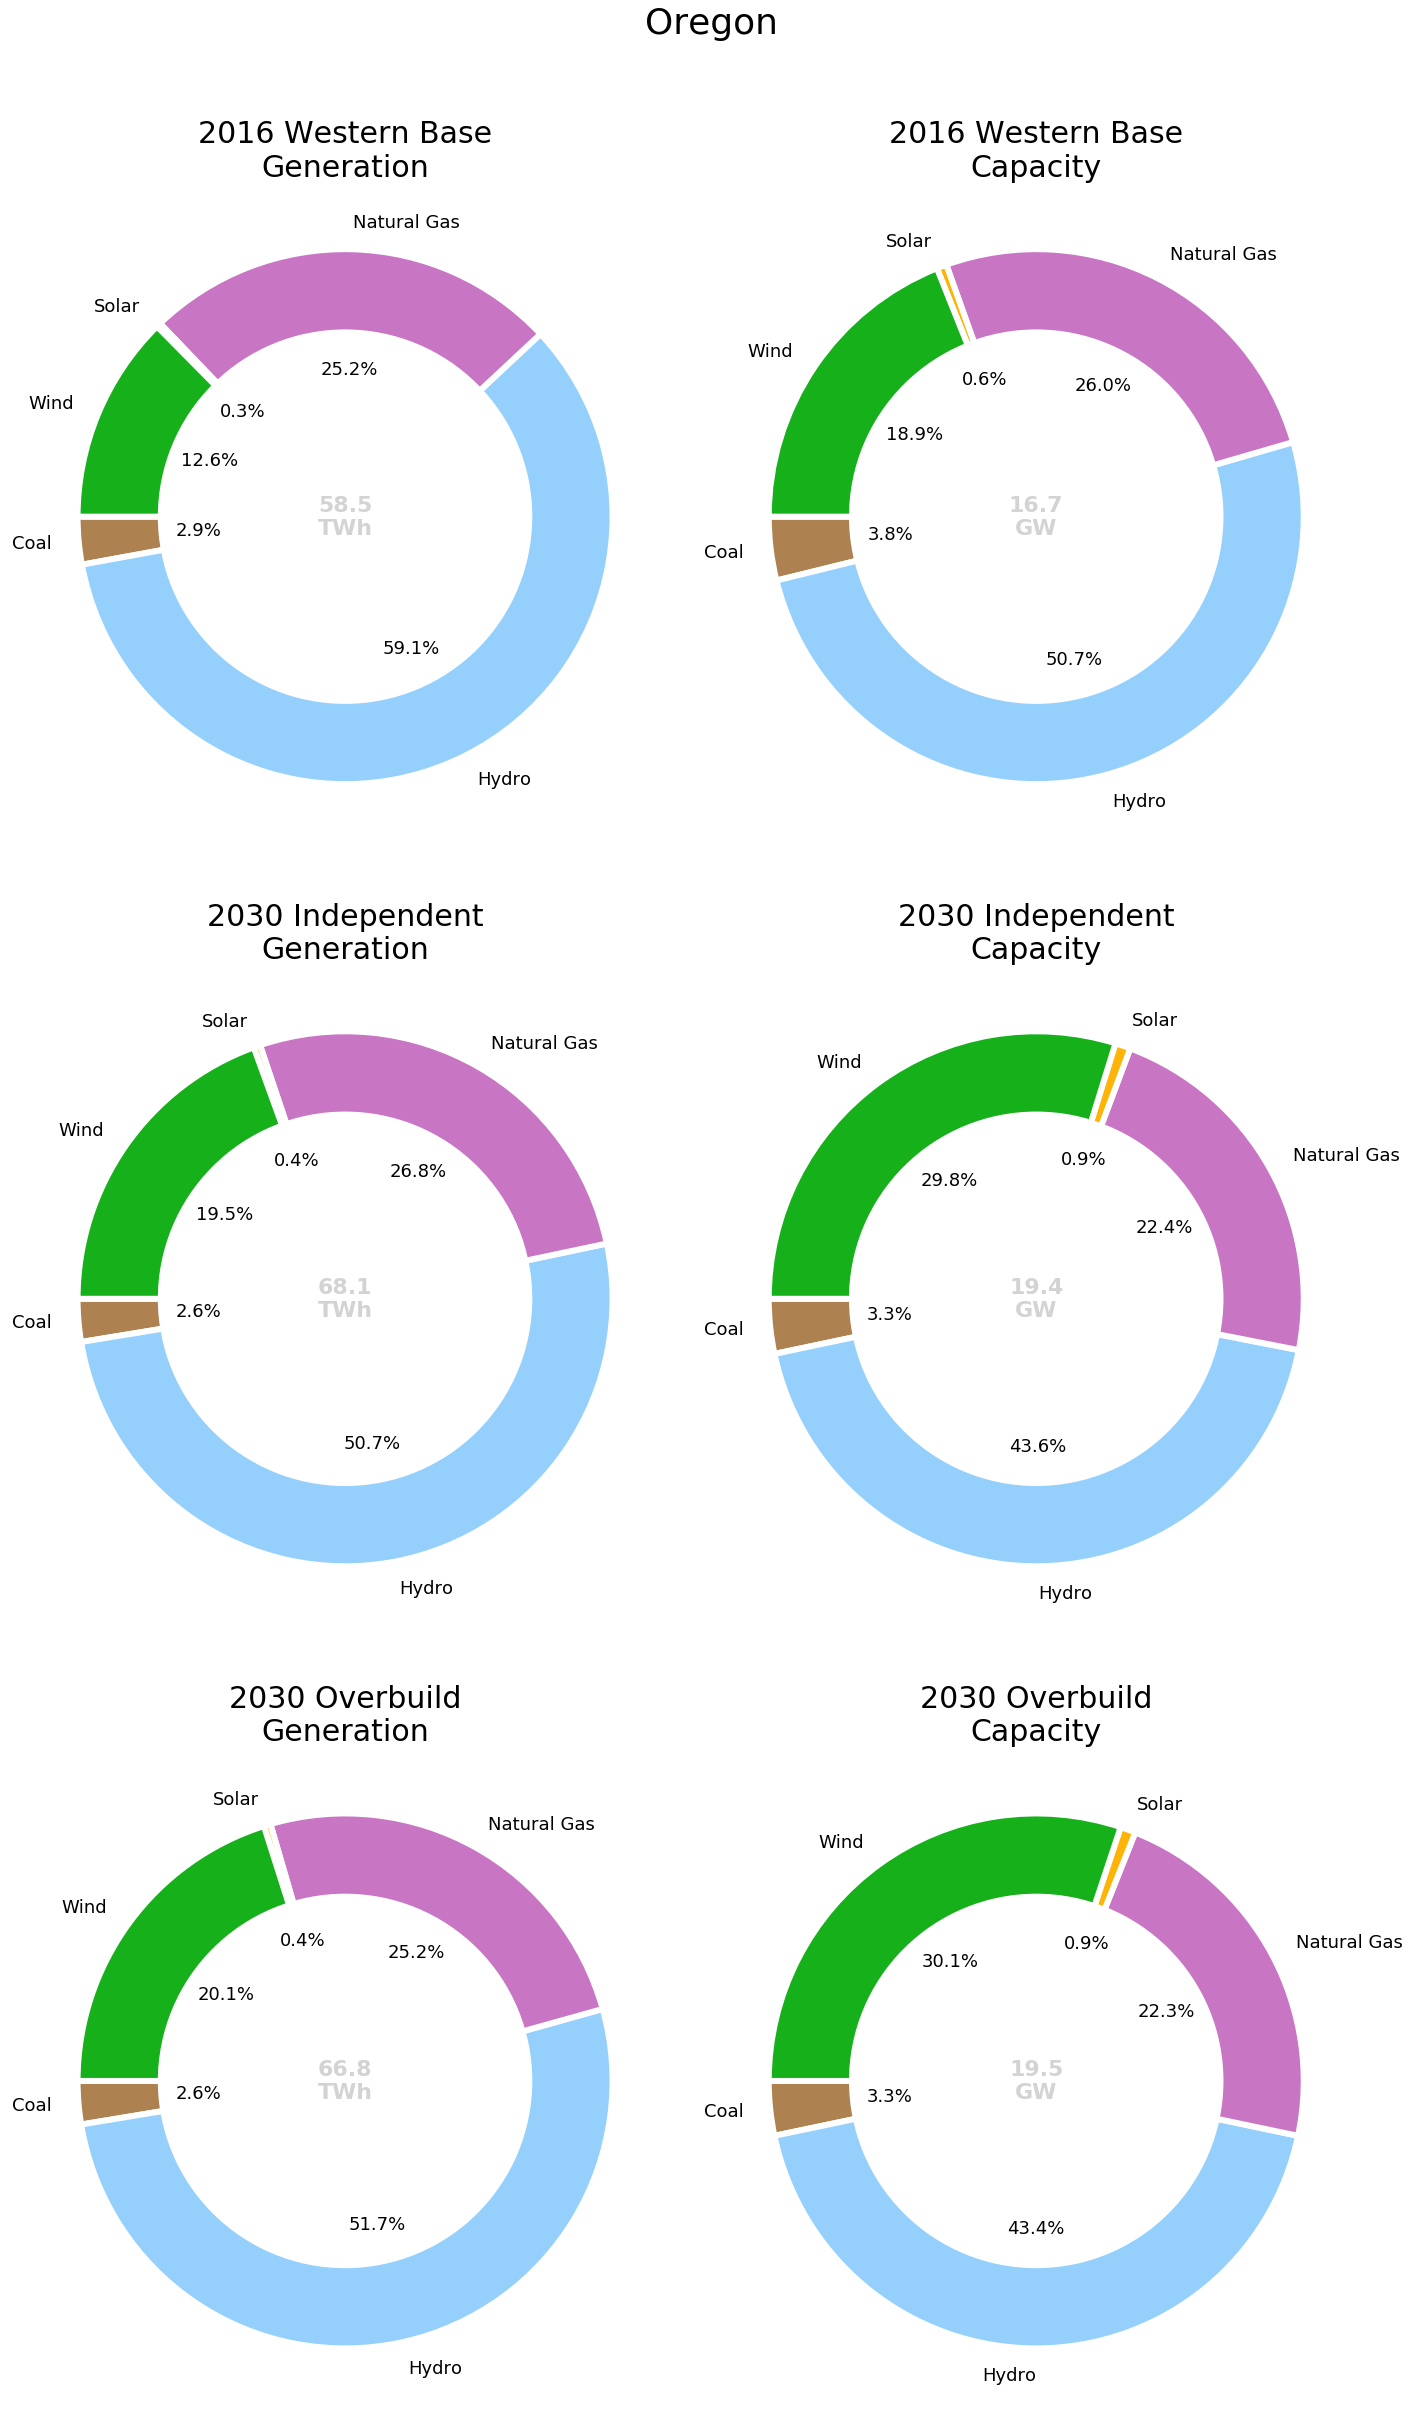

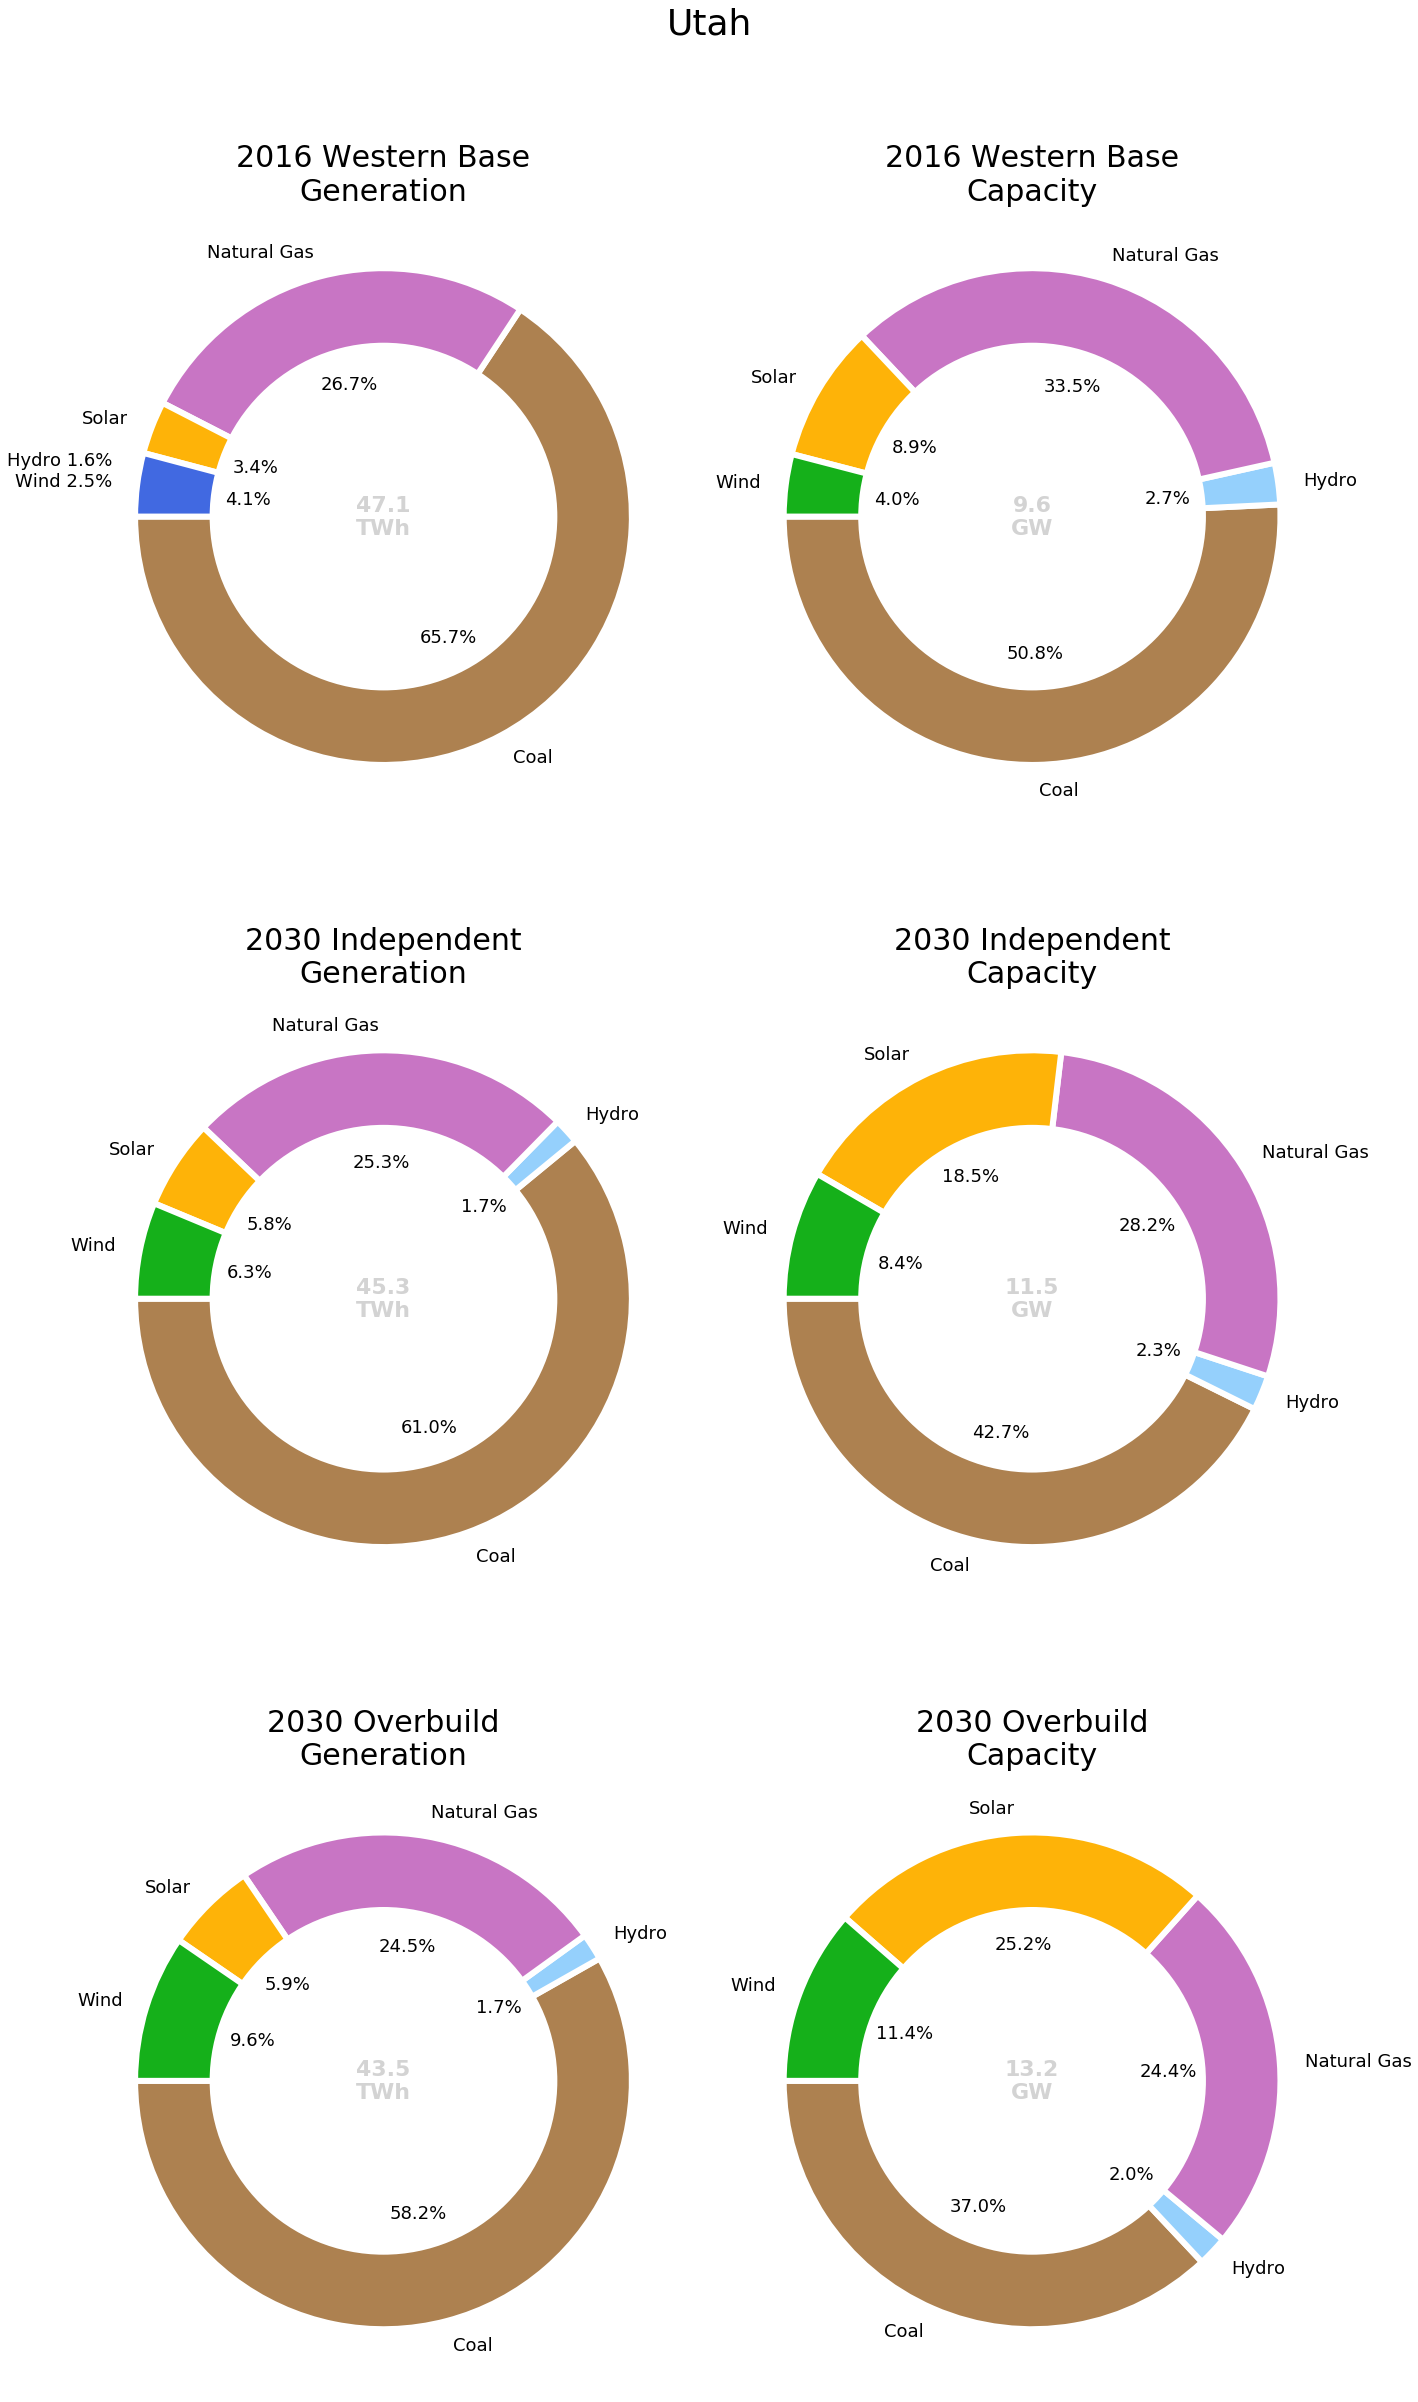

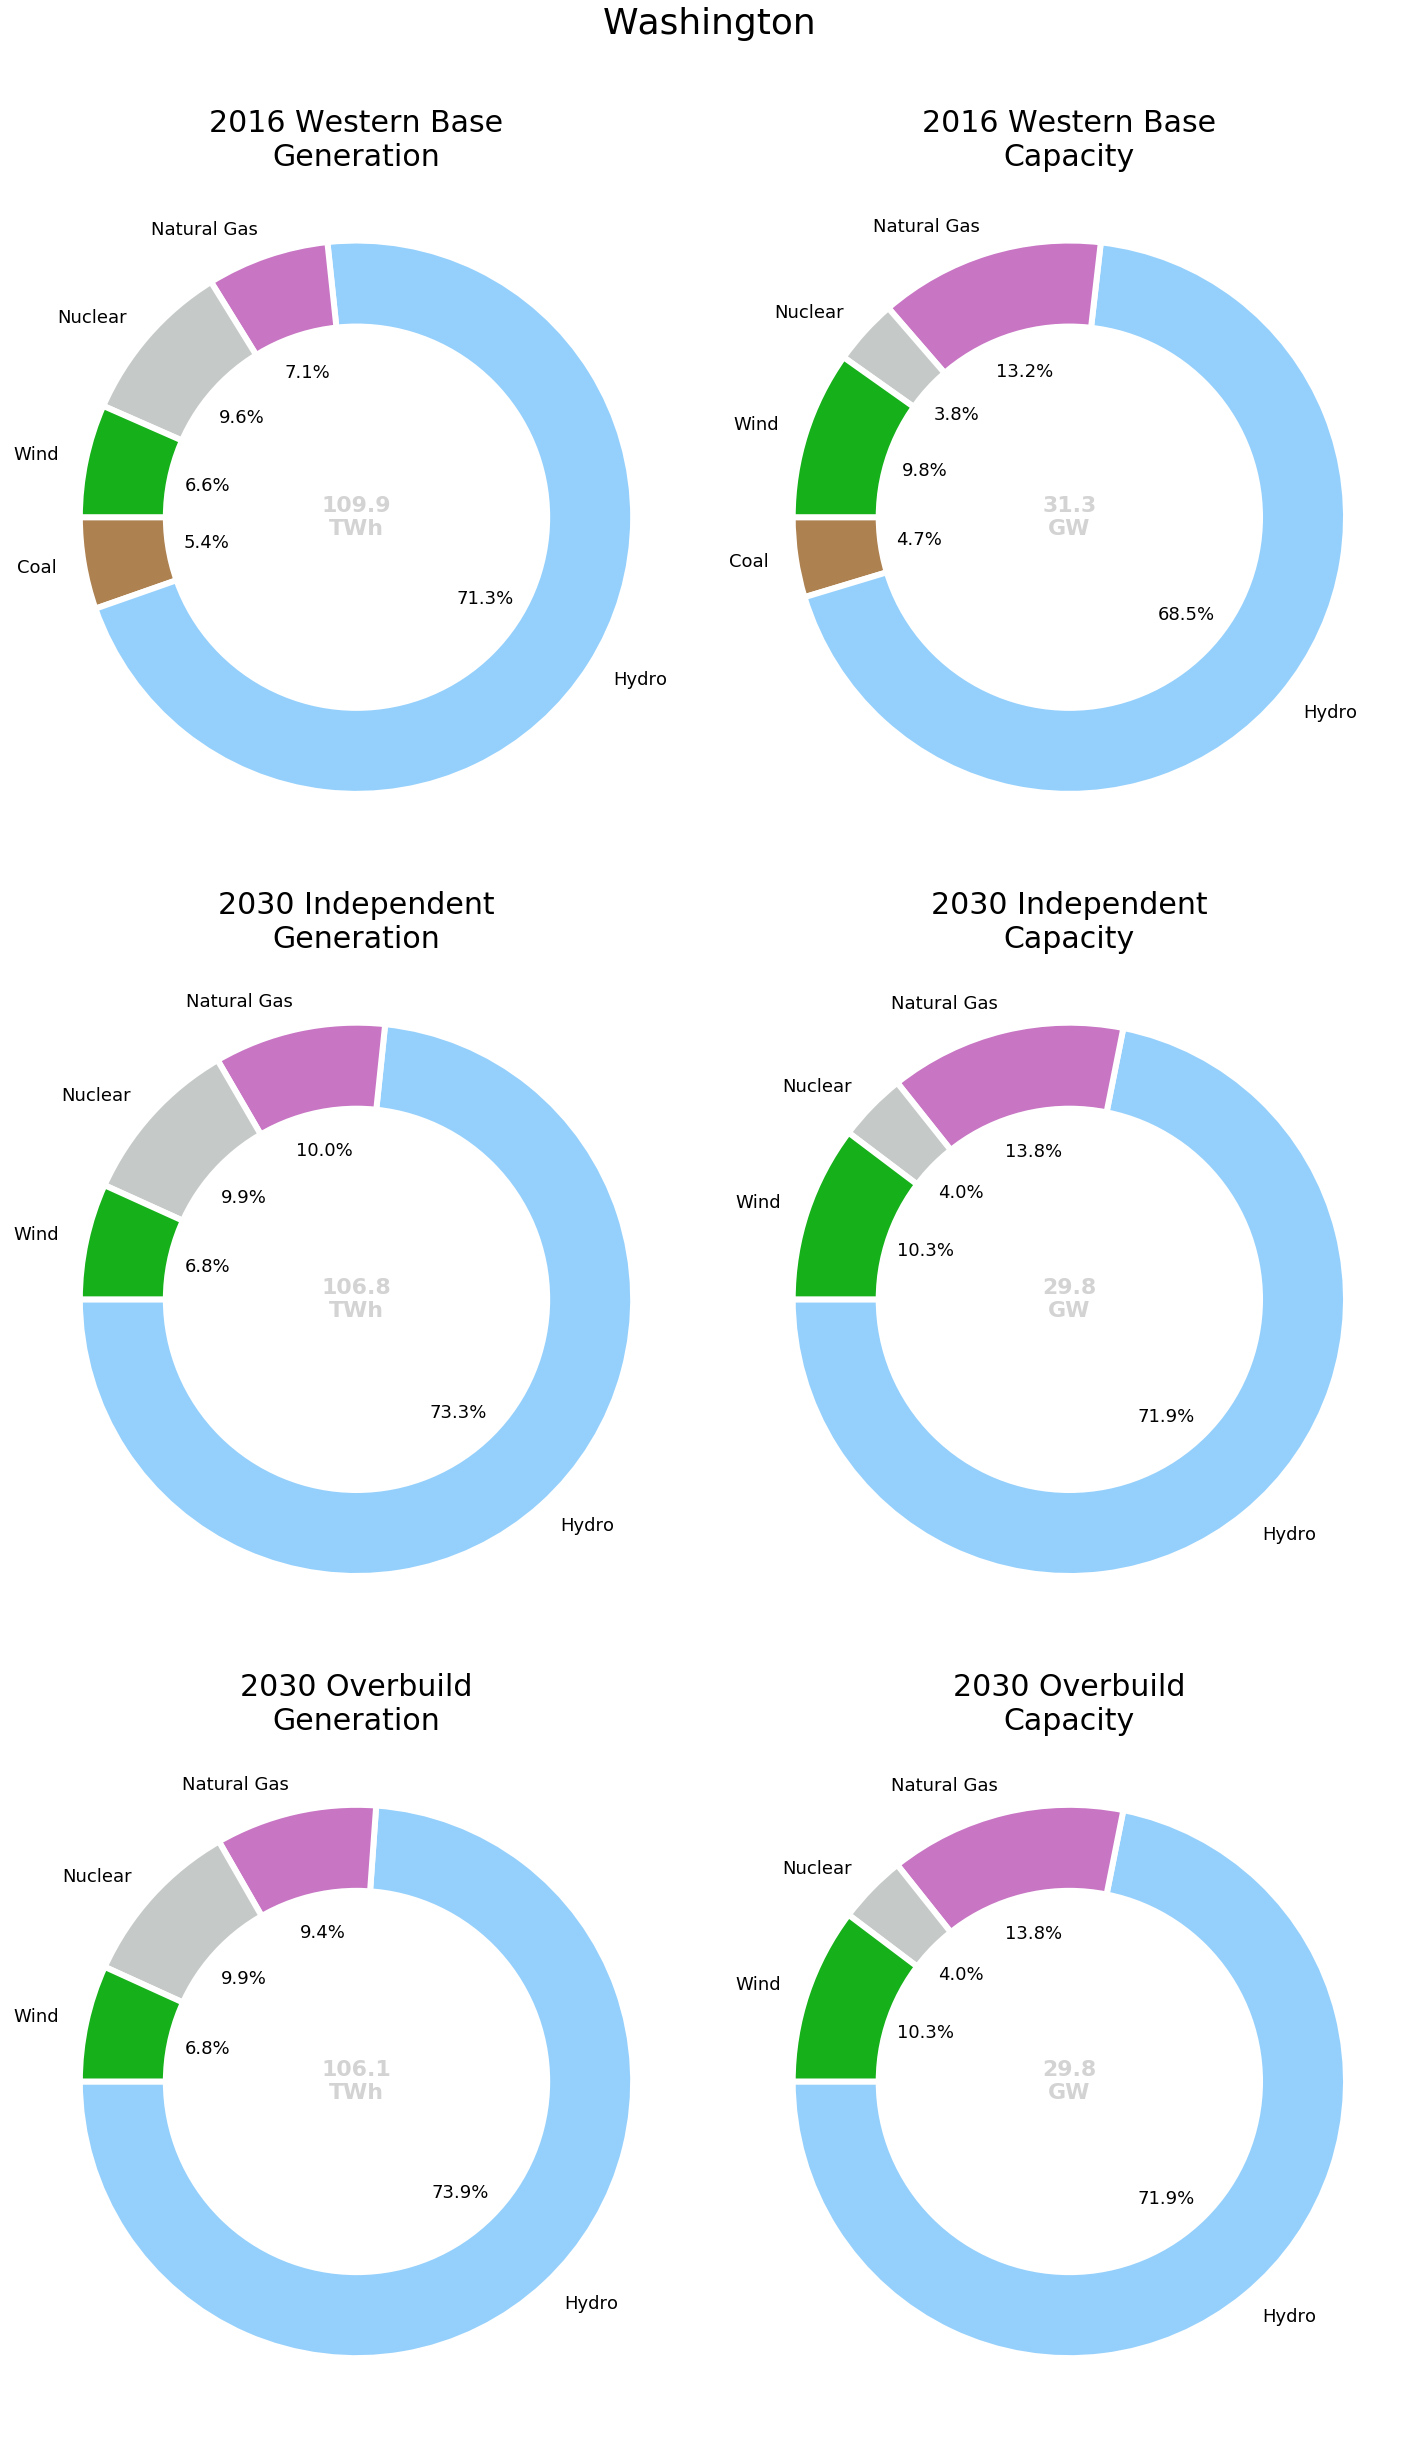

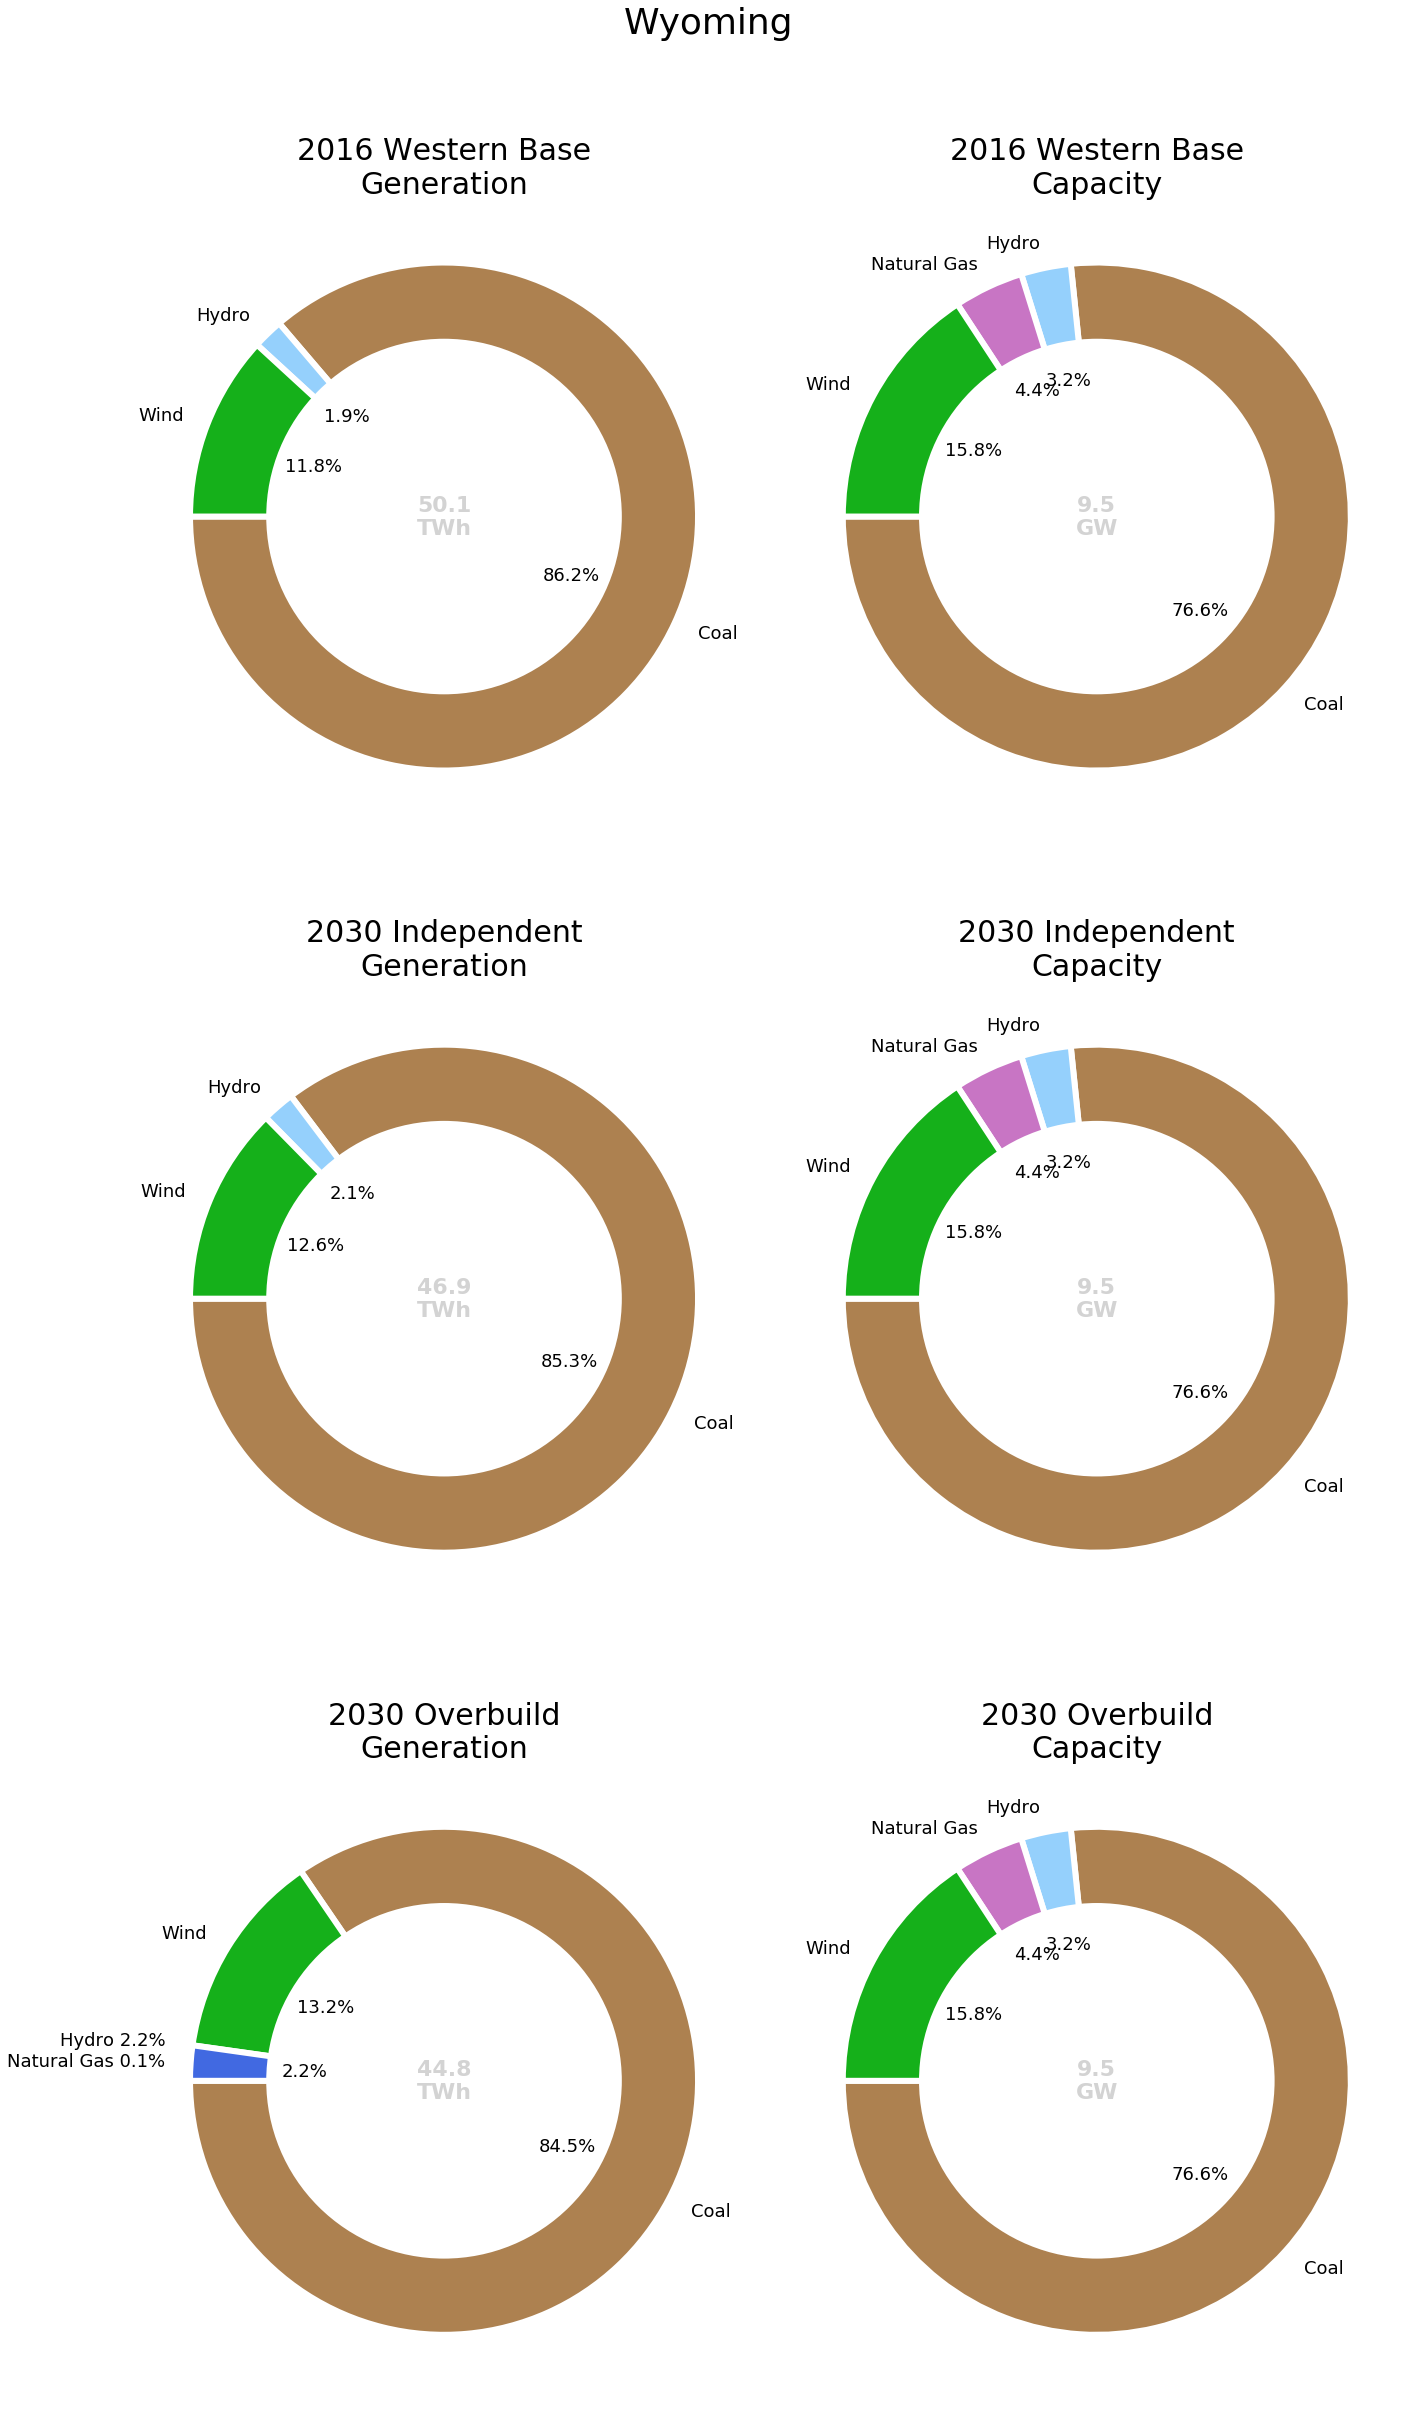

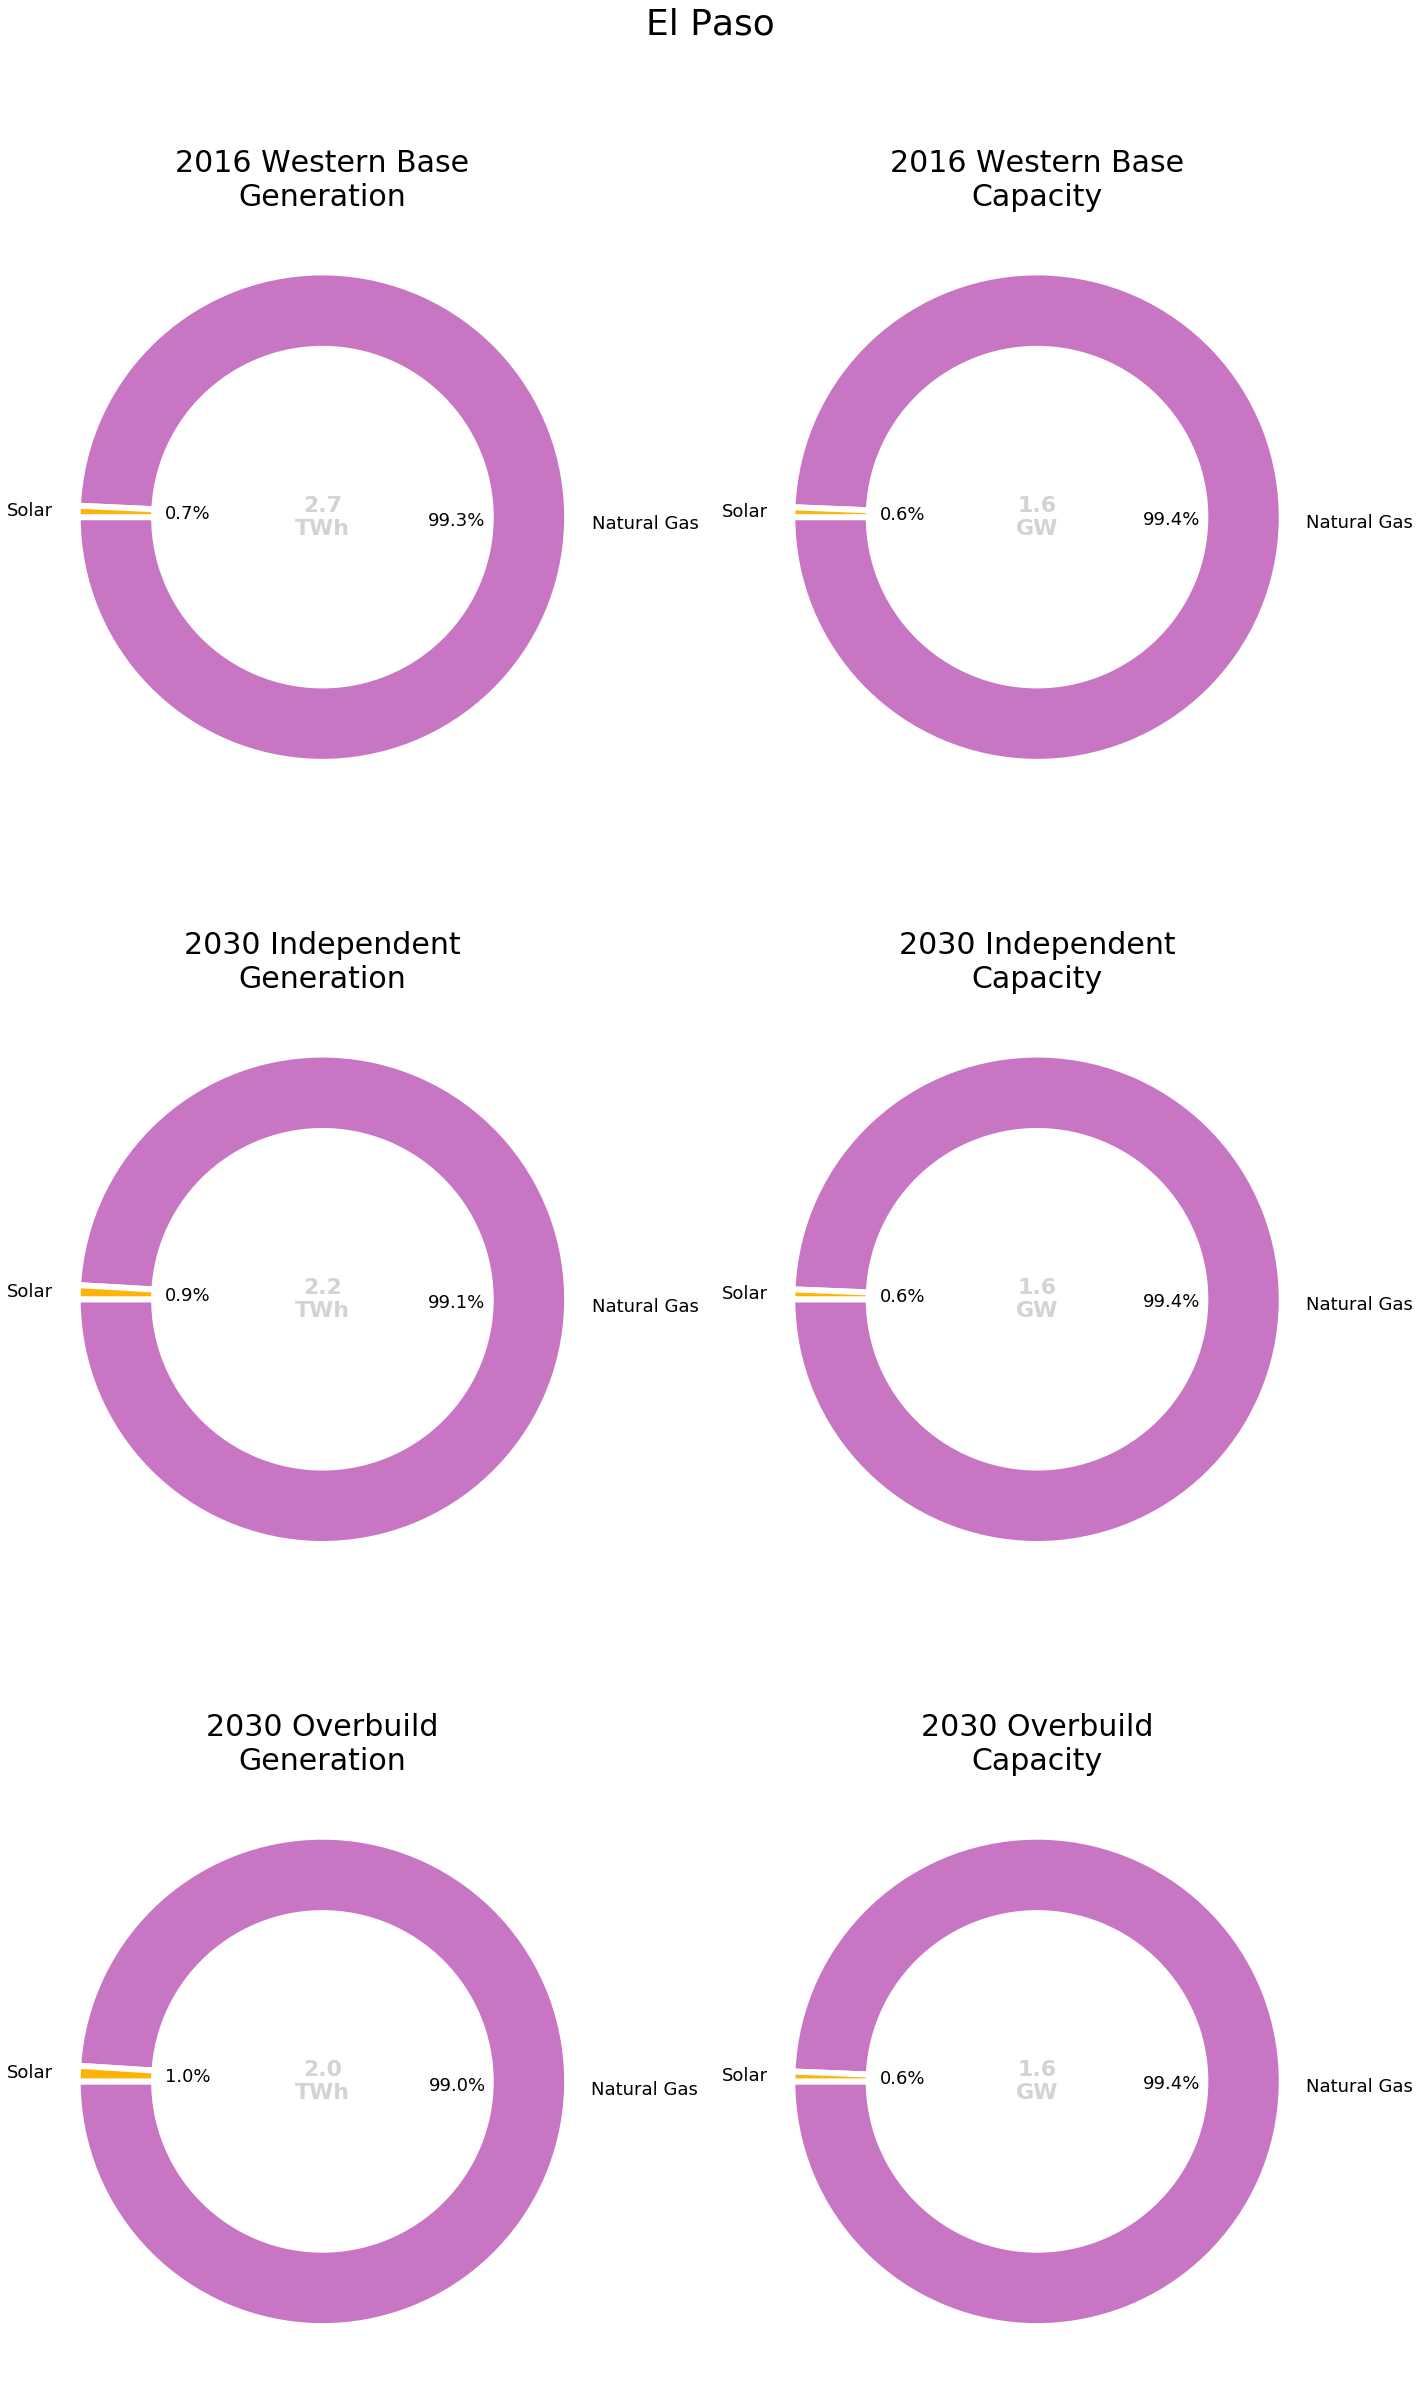

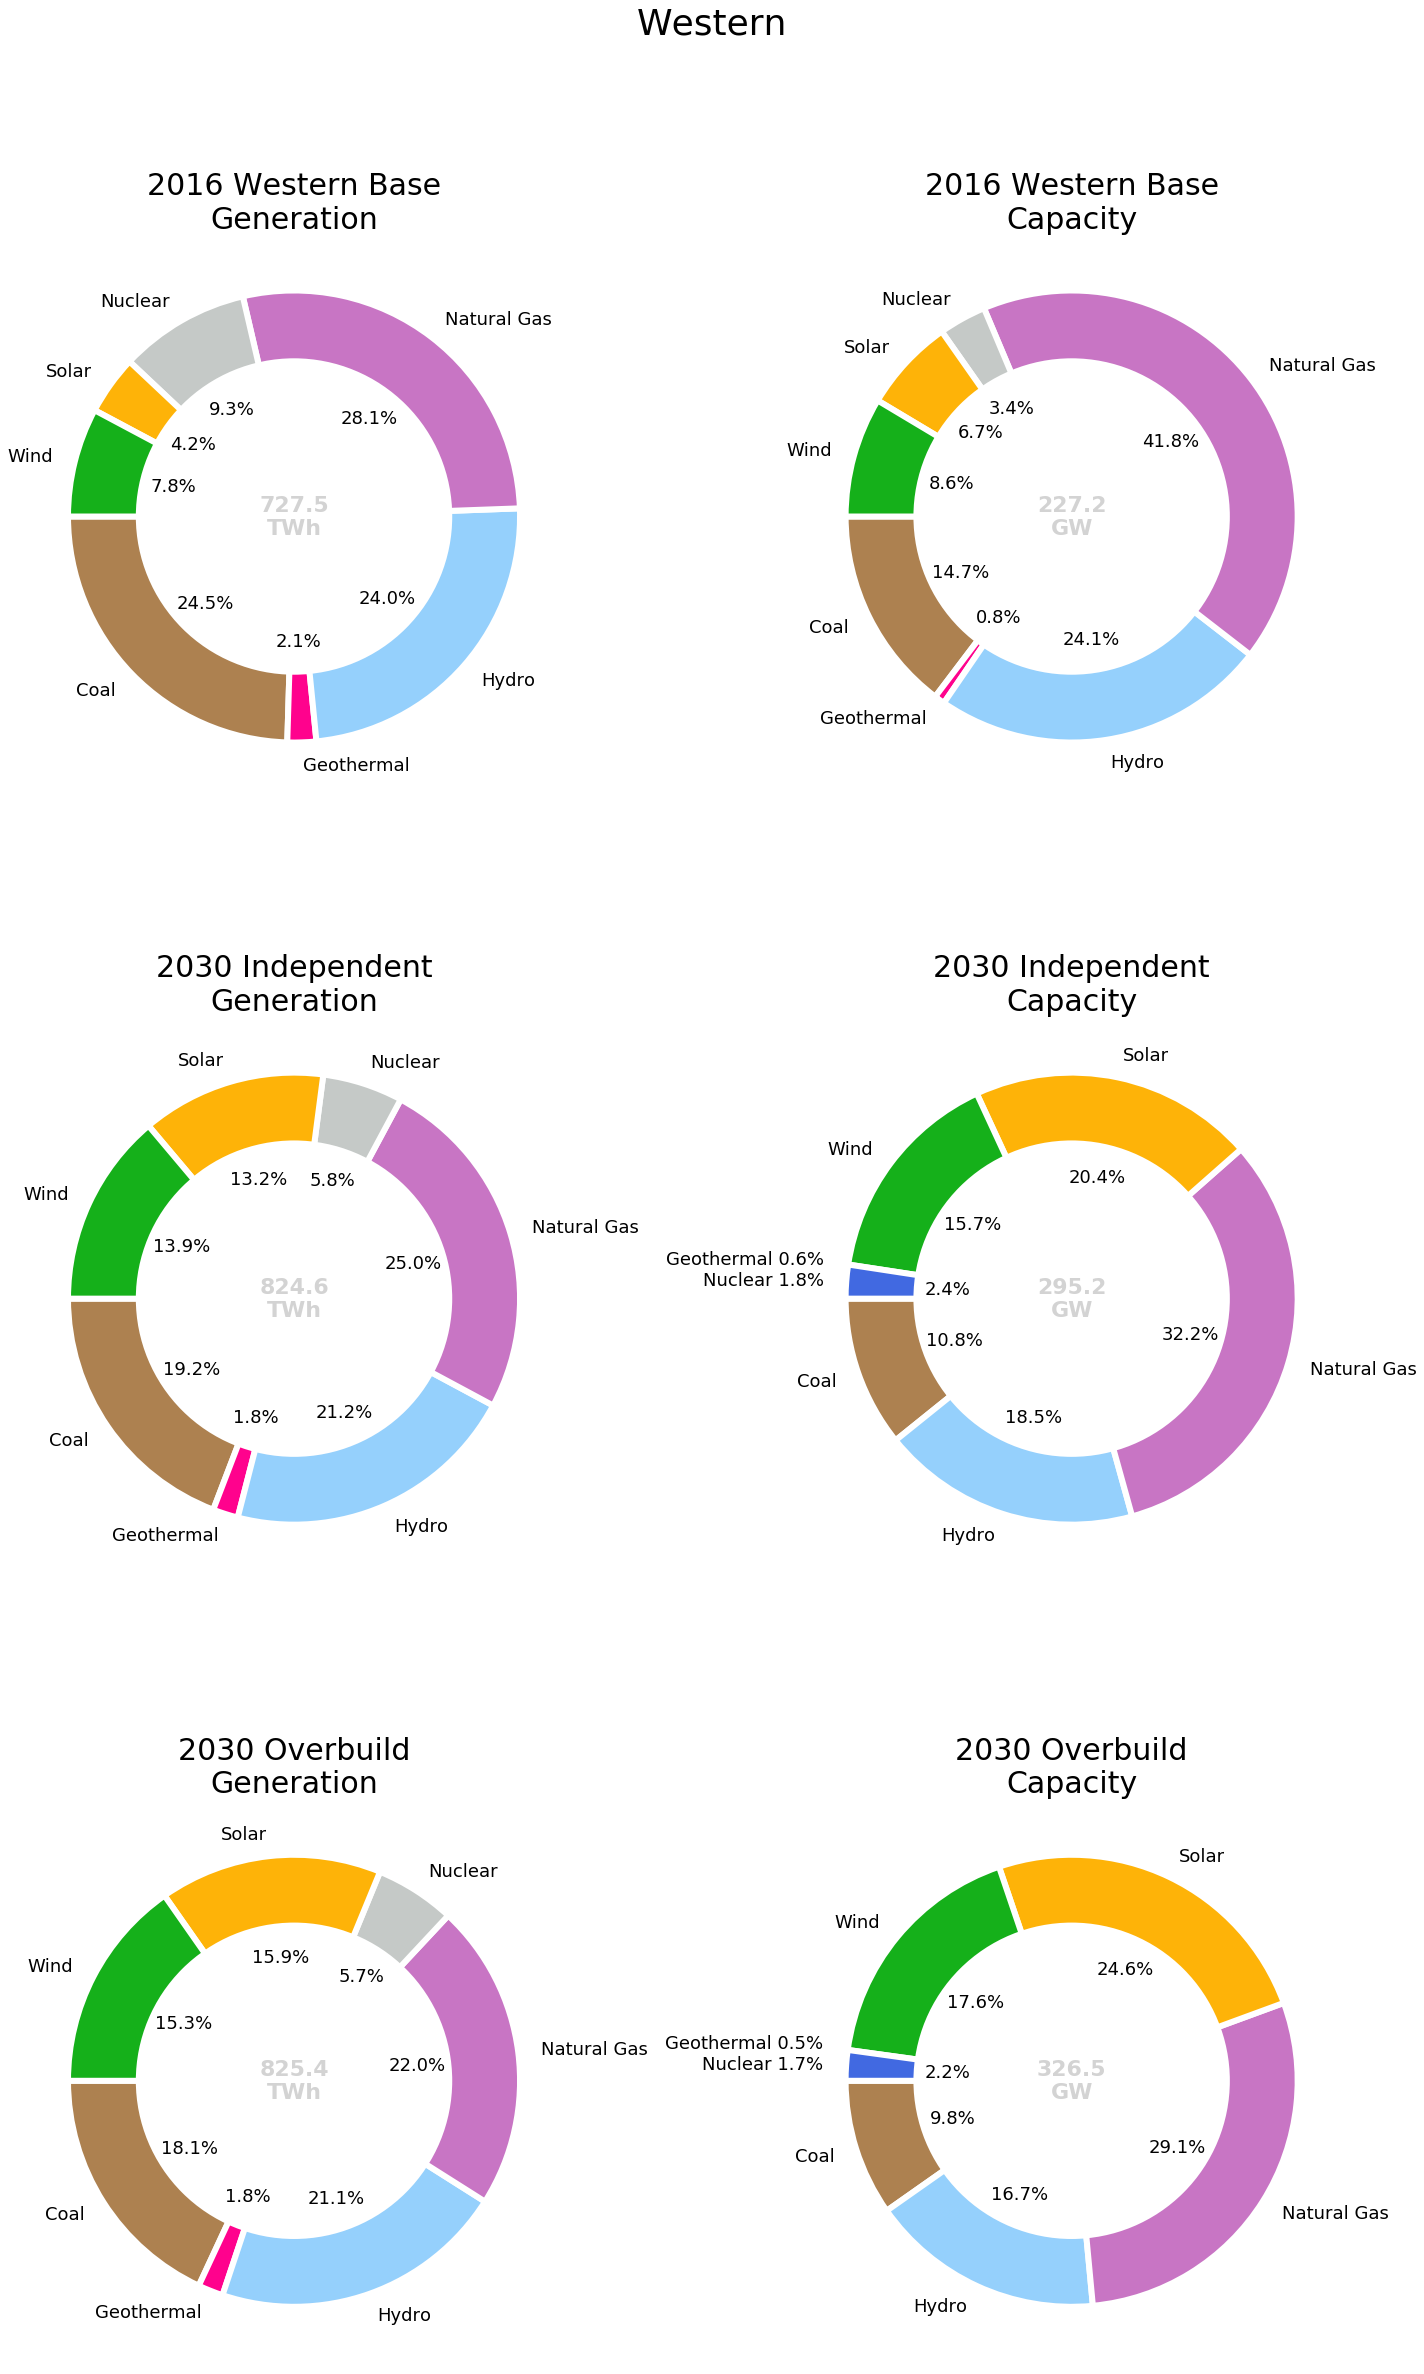

In [10]:
# With plot pie you can optionally set min_percentage to combine small pie pieces into an Other category
# Other is the dark blue wedge!
f = io.StringIO()
with redirect_stdout(f):
    plot_pie('Western',
             time,
             ['87', '91','103'],
             ['2016 Western Base', '2030 Independent', '2030 Overbuild'],
             min_percentage=2.5)


# Shortfall stacked bar plot

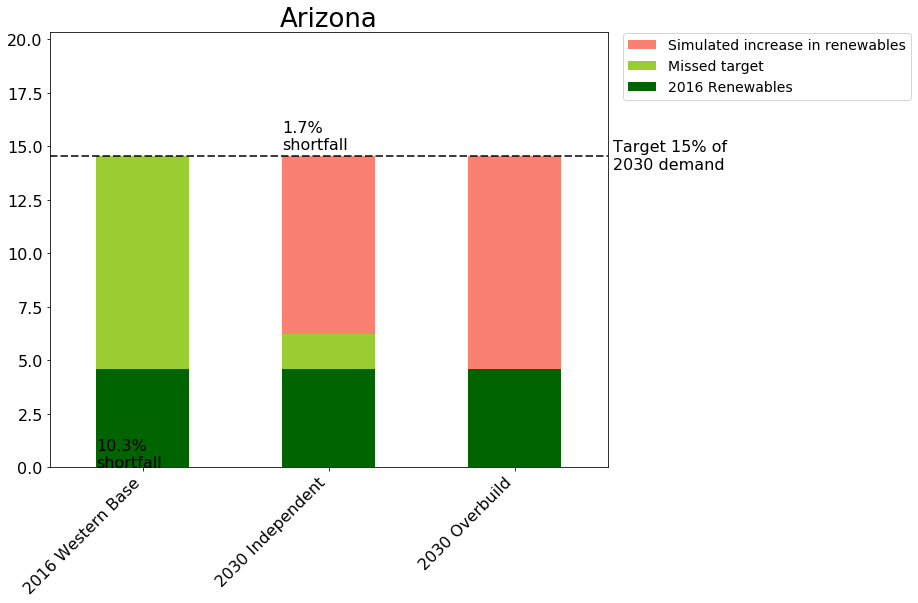

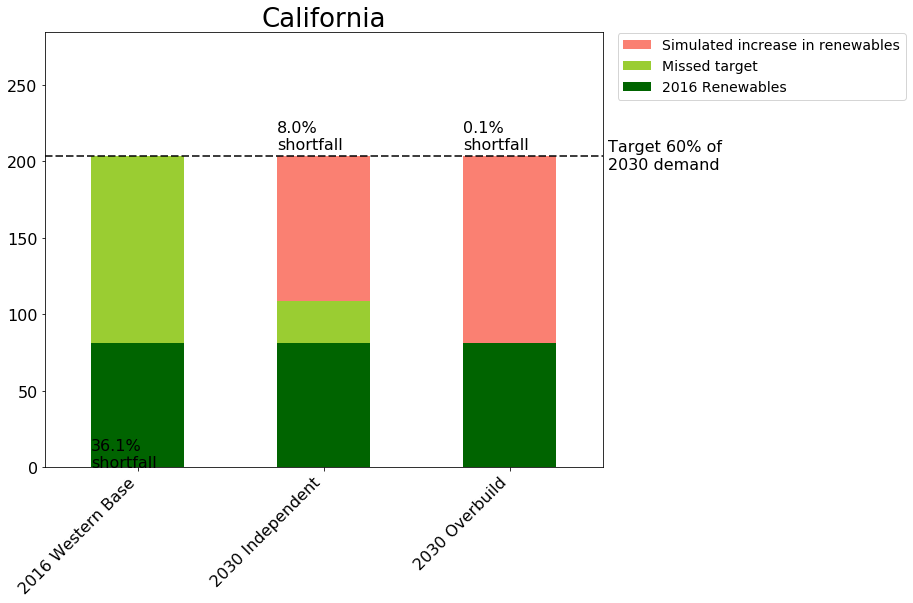

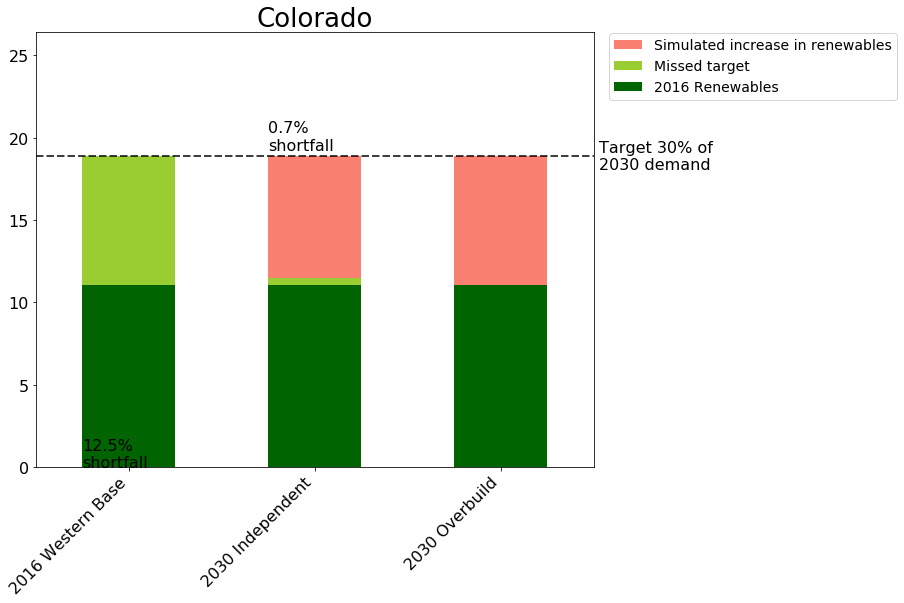

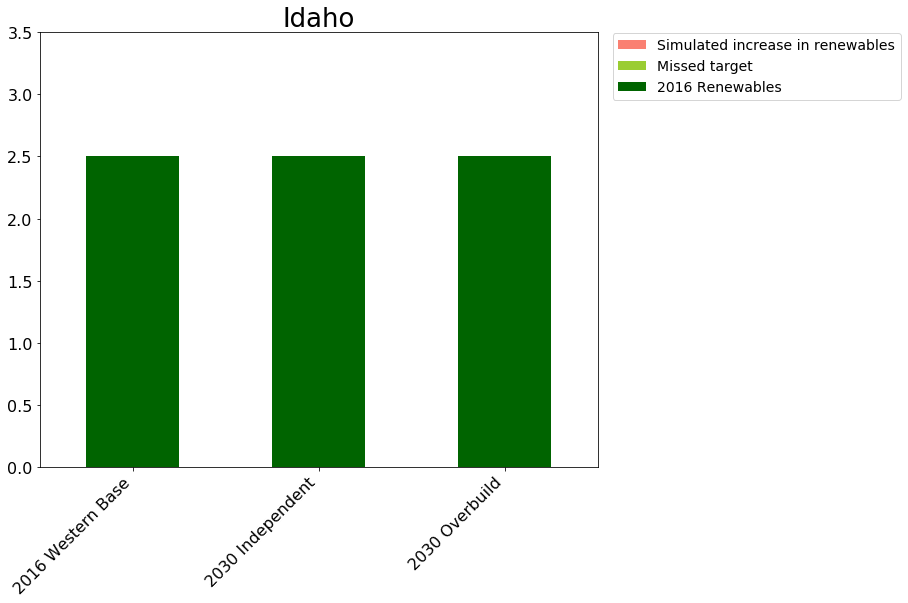

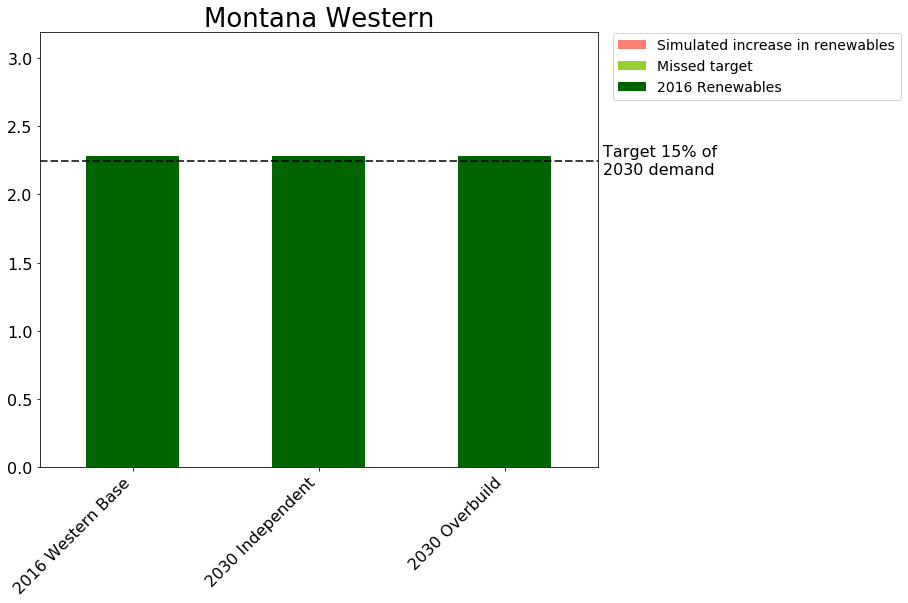

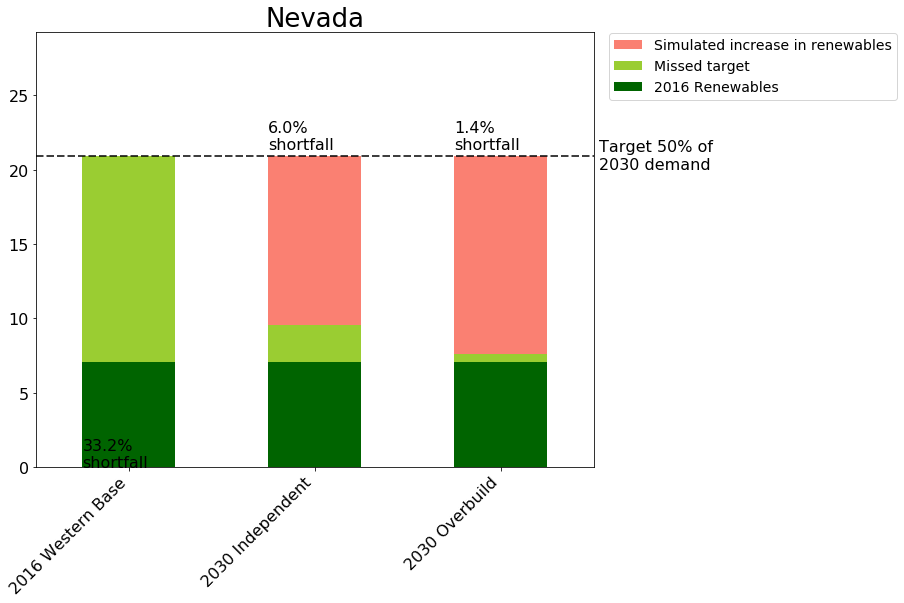

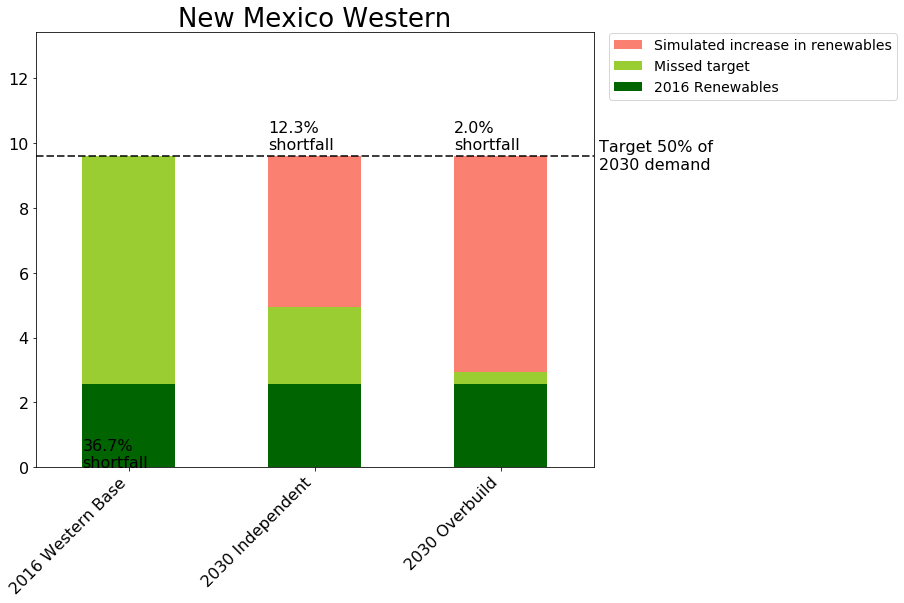

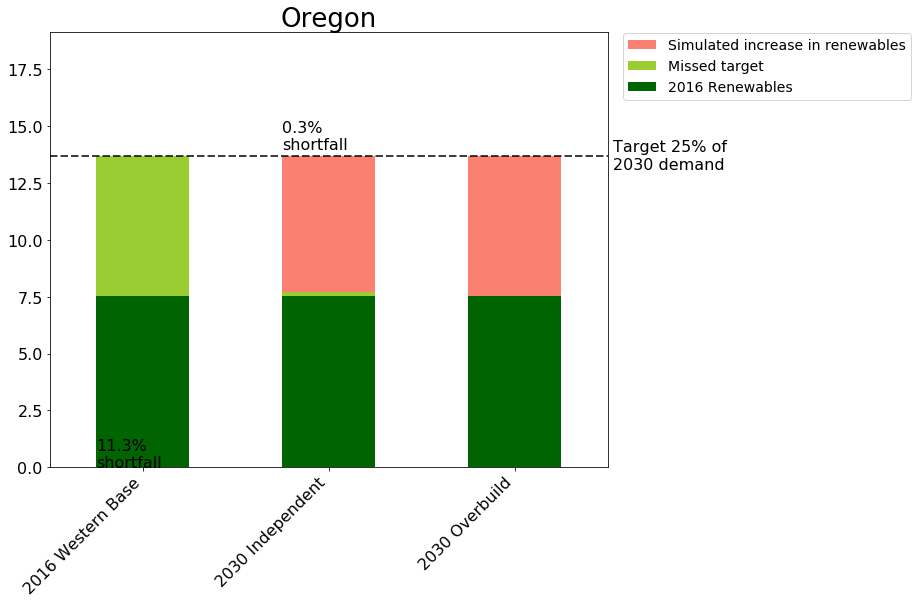

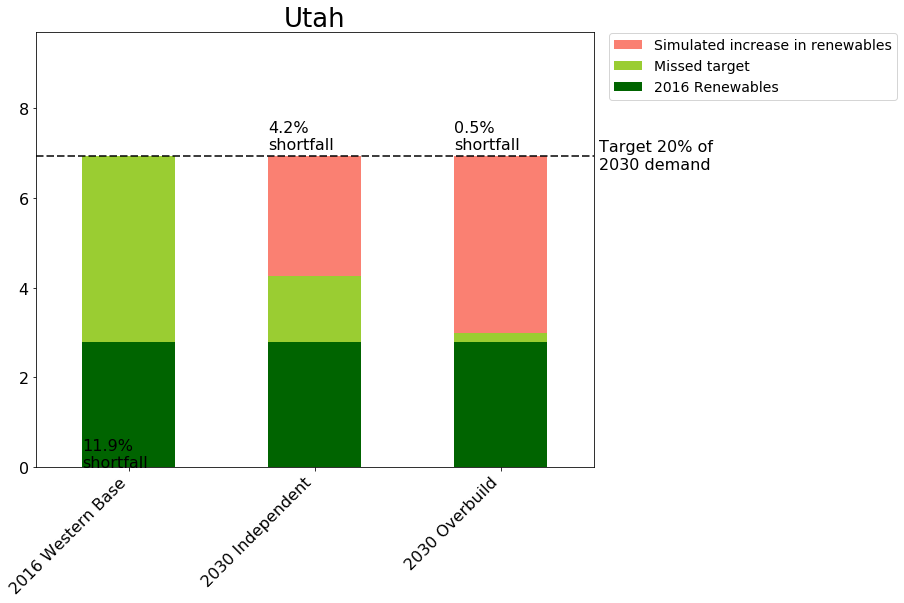

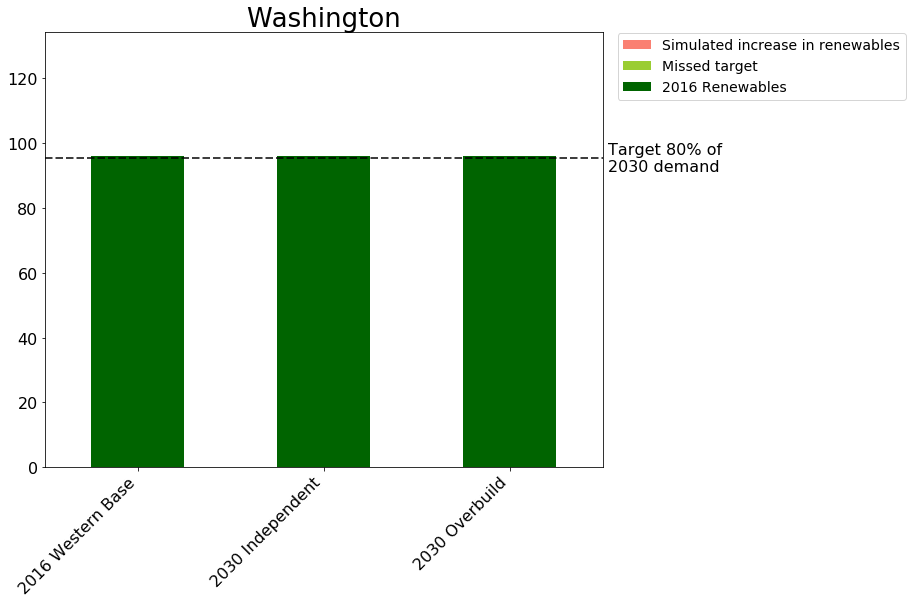

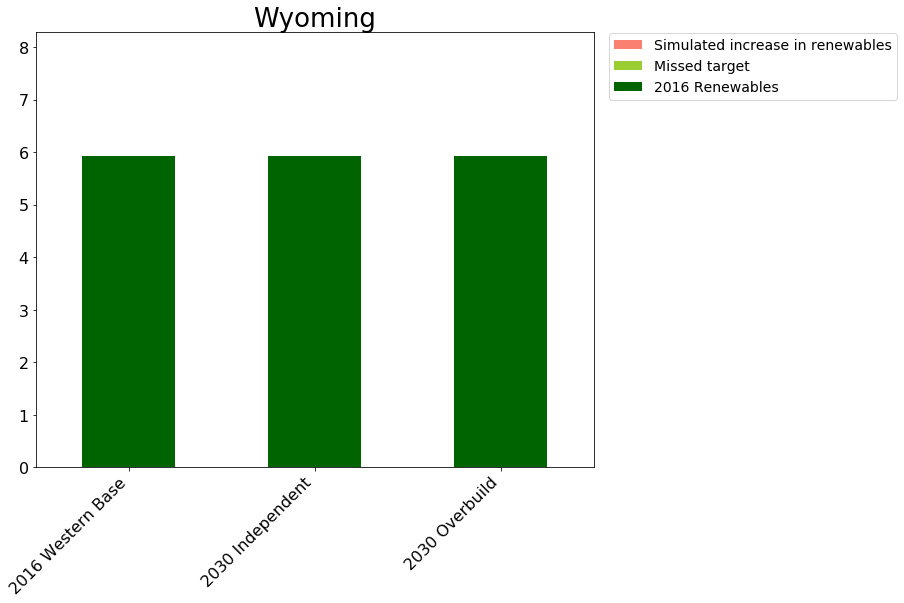

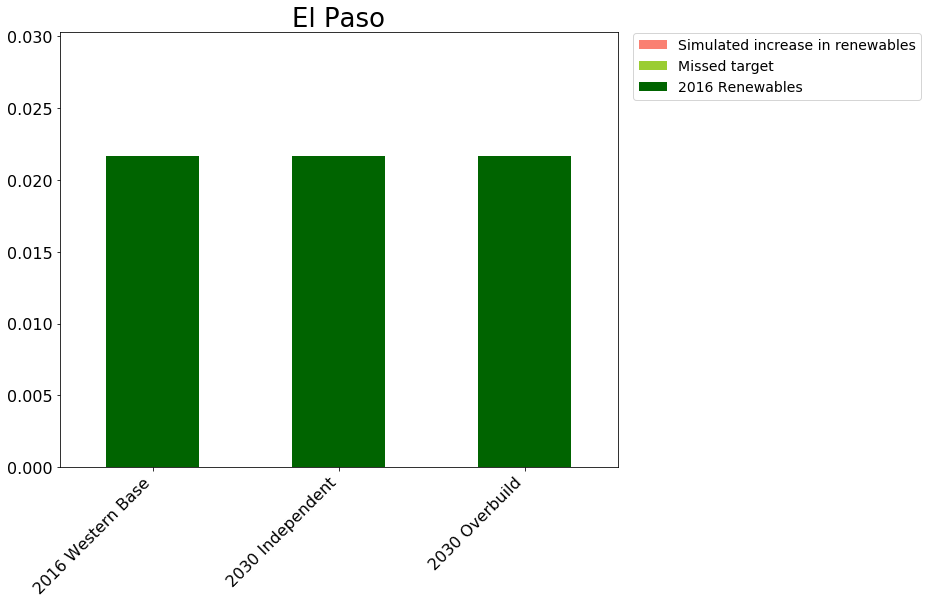

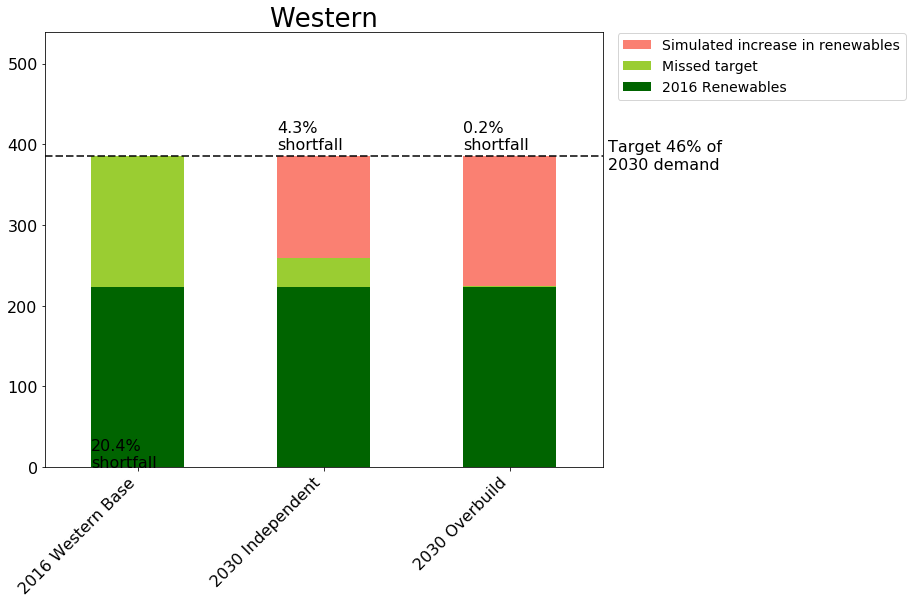

In [11]:
# Plot a basic shortfall chart
f = io.StringIO()
with redirect_stdout(f):
    plot_shortfall('Western',
                   time,
                   ['87', '91','103'], 
                   ['2016 Western Base', '2030 Independent', '2030 Overbuild'])

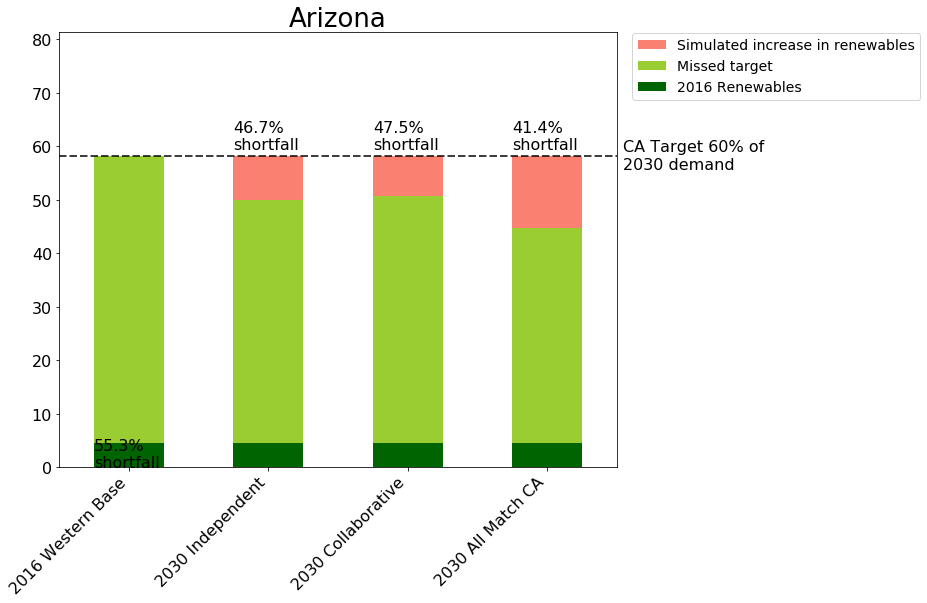

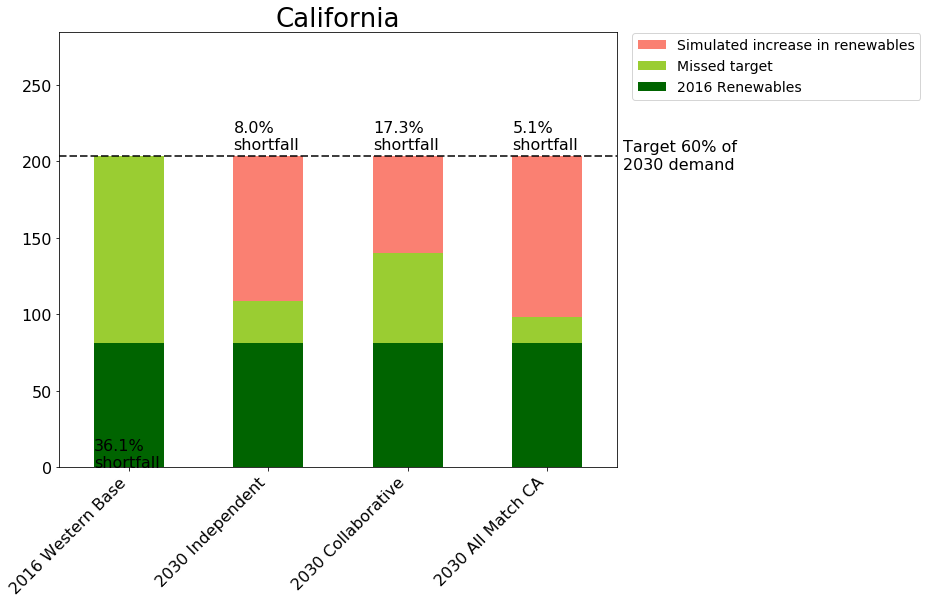

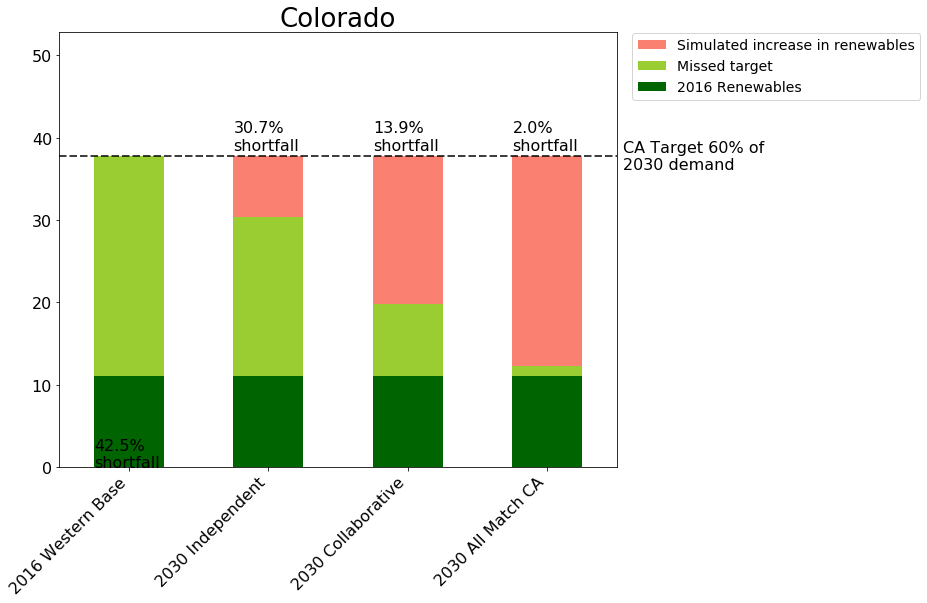

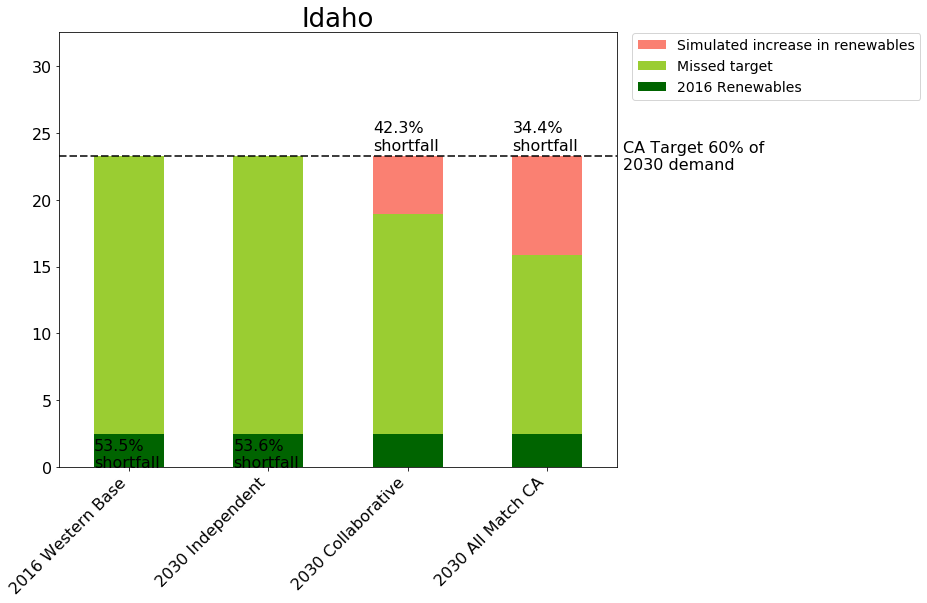

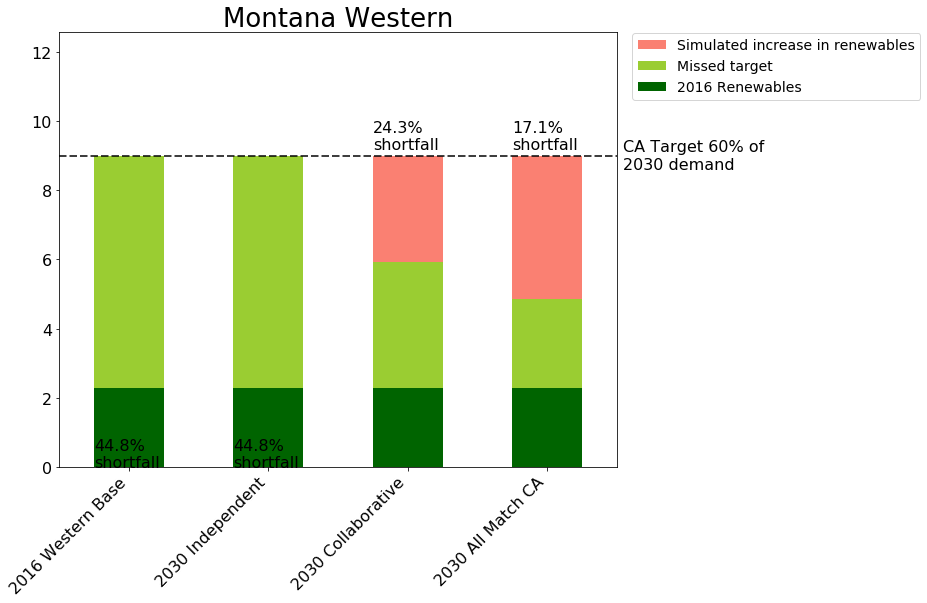

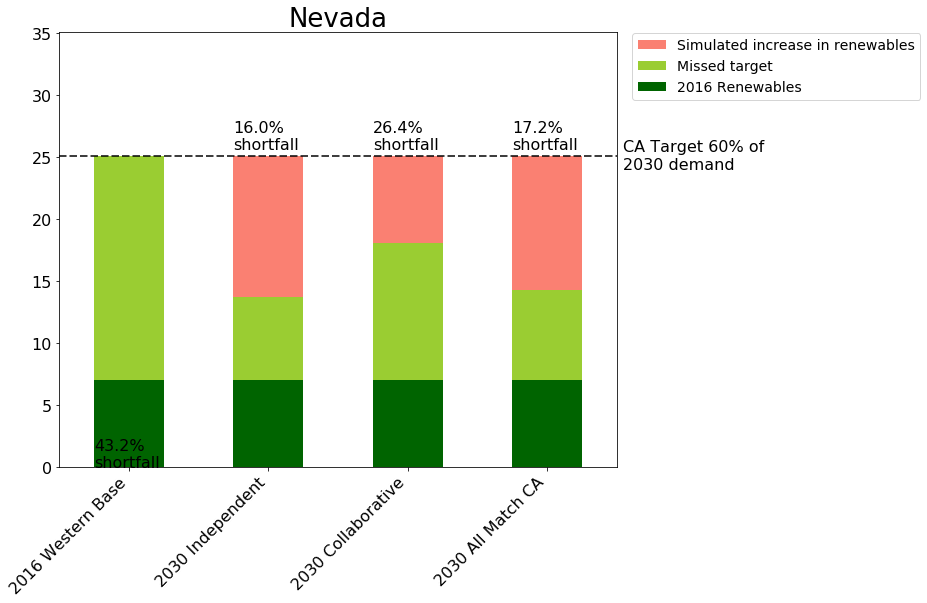

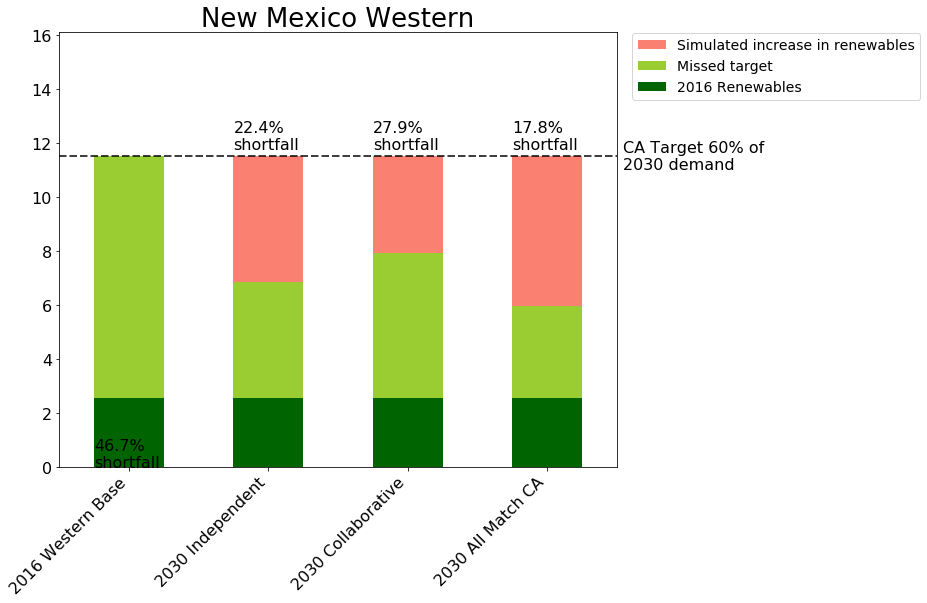

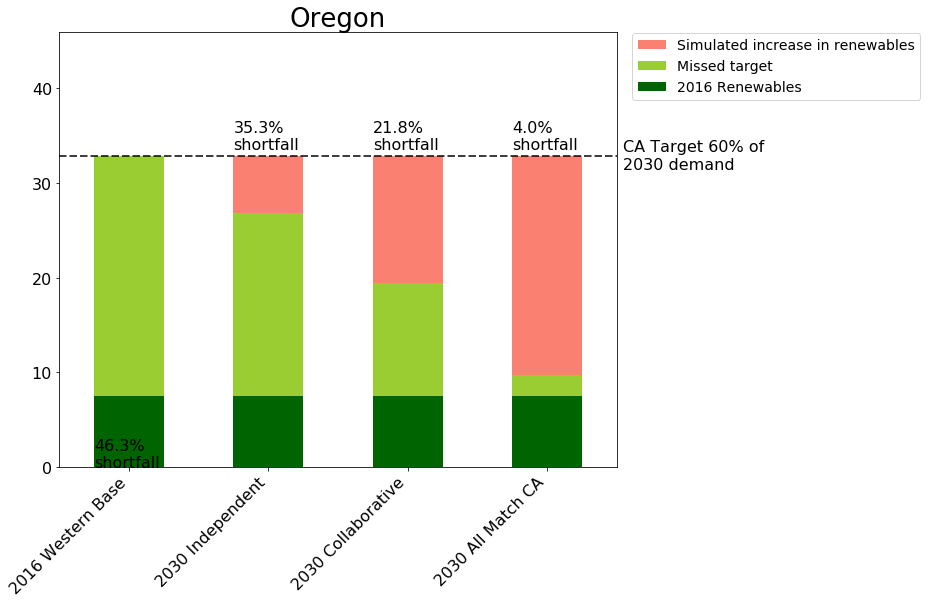

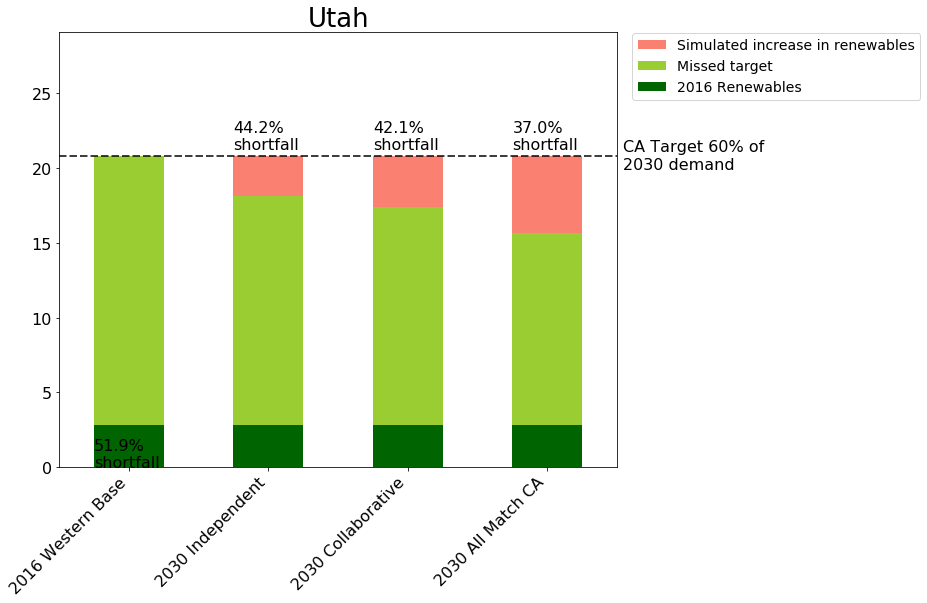

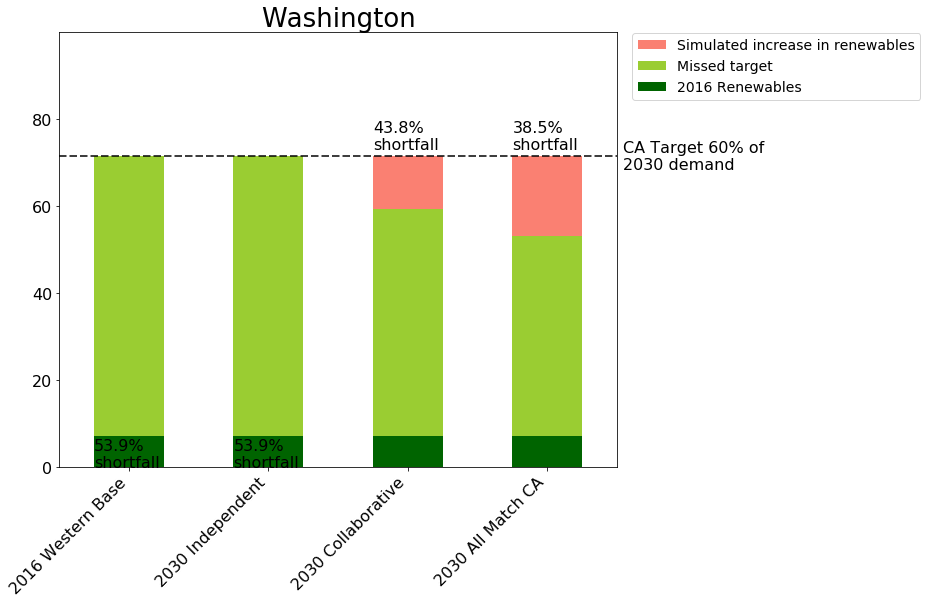

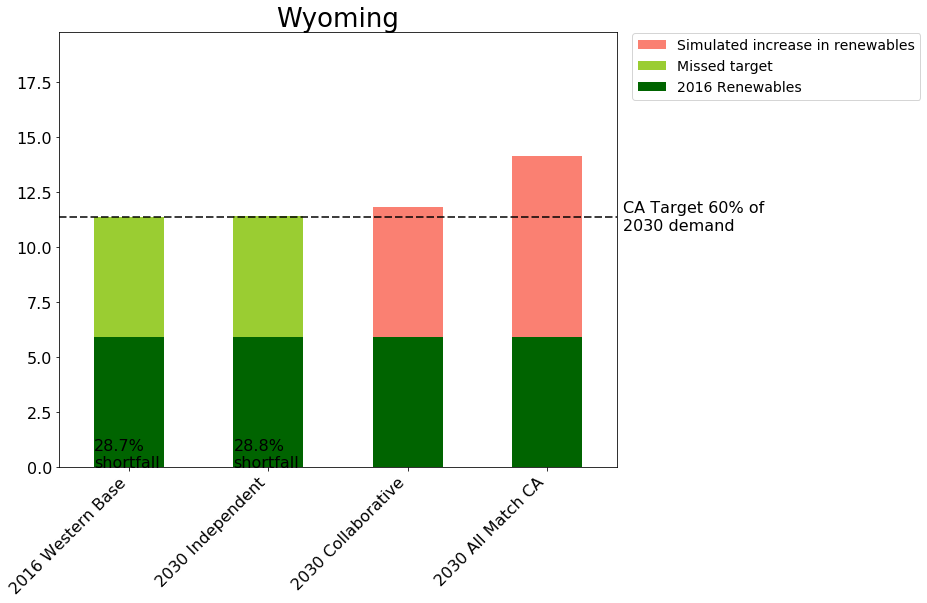

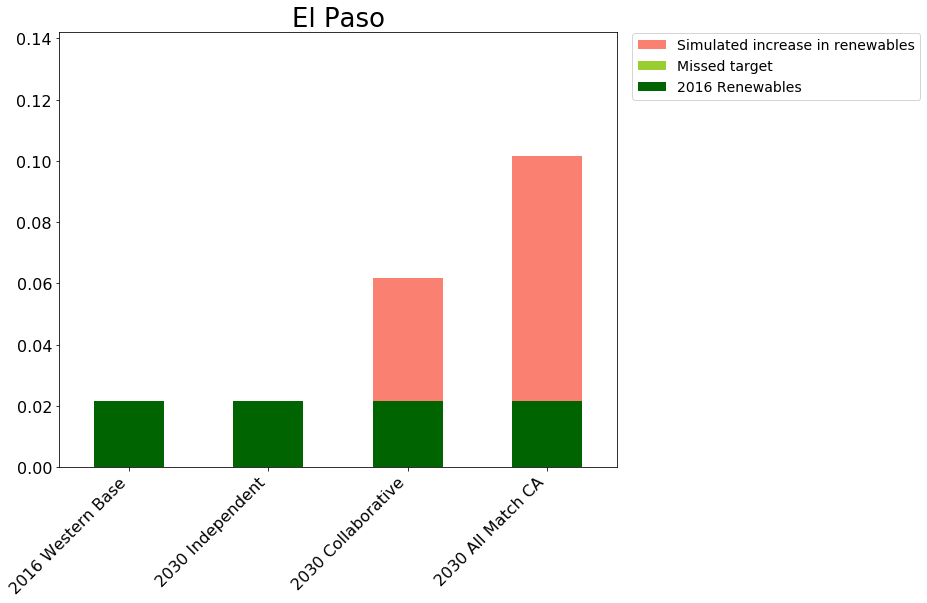

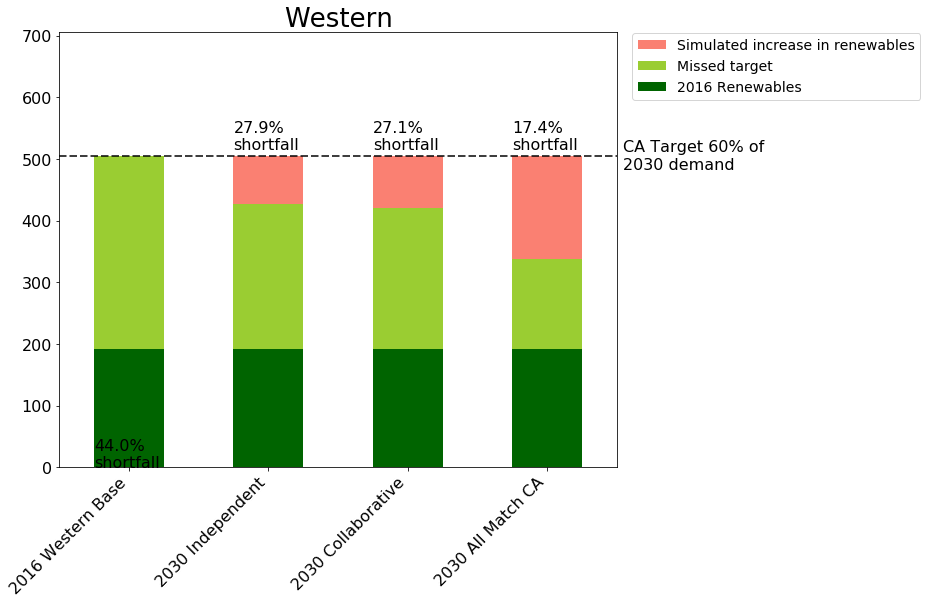

In [12]:
# Shortfall has a couple optional parameters

# is_match_CA (bool) calculates shortfall using special rules that apply 
# when all zones match California goals. Defaults to False

# has_collaborative_scenarios (list(string)) list of scenario ids where 
# all zones collaborate to meet RE goals
# This affects Western since states help each other with their shortfall

# You can also provide custom generation baselines, targets and demand (TWh)
# But most of the time you don't need to worry about that
f = io.StringIO()
with redirect_stdout(f):
    plot_shortfall('Western',
                   time,
                   ['87', '91', '93', '89'],
                   ['2016 Western Base', '2030 Independent', '2030 Collaborative', '2030 All Match CA'],
                   is_match_CA=True,has_collaborative_scenarios=['93'])